# Project Name: Bankruptcy Prediction

Submission Date: 23/04/2023

Submitted By: Vicky Tule

Batch: 22nd July 2022

## Problem Statement


The prediction of bankruptcy is a phenomenon of increasing interest in firms that stand to lose money because of unpaid debts. Since computers can store huge data sets pertaining to bankruptcy, making accurate predictions from them beforehand is becoming important. Company bankruptcy was defined based on the business regulations of the Netherlands (Financial Institution) in this project you will use various classification algorithms on the bankruptcy dataset to predict bankruptcies with satisfying accuracies long before the actual event.

## Goals & Objectives: 
This exercise aims to build a model, using historical data that will determine the prediction of bankruptcy.

## Import Necessary Packages

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')


## Data Collection

In [ ]:
Bank_DF=pd.read_csv('/content/_BANKRUPTCY PREDICTION .csv')  ##Import the dataset

## Data Overview

In [ ]:
## Shape and no. of rows and columns of dataset
R,C=Bank_DF.shape
print('Shape of Dataset:',Bank_DF.shape)
print()
print('No of rows in a Dataset:',R)
print()
print('No of Columns in a Dataset:',C)

Shape of Dataset: (6819, 95)

No of rows in a Dataset: 6819

No of Columns in a Dataset: 95


In [ ]:
## Basic Information about the dataset
Bank_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 1    ROA(A) before interest and % after tax                   6819 non-null   float64
 2    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 3    Operating Gross Margin                                   6819 non-null   float64
 4    Realized Sales Gross Margin                              6819 non-null   float64
 5    Operating Profit Rate                                    6819 non-null   float64
 6    Pre-tax net Interest Rate                                6819 non-null   float64
 7    After-tax net Interest Rate                              6819 non-null   float64
 8    Non-industry inco

Observation:

By seeing above information, we observe that we have total 6819 rows and 95 columns(93-Float Datatype & 2 Int Datatype).94 Independent Variables and 1 Dependent Variables.These 94 Independent Variables contain information related to financial ratios and various Financial Terms which would affect Companies Financial Performance. Also all data is present in all rows with 0 missig value in data.

In [ ]:
## Check for Duplicate Values
print("No of duplicated values:",Bank_DF.duplicated().sum())

No of duplicated values: 0


Observation:
No Duplicate data is present in these dataset

In [ ]:
## Descriptive Statistics about the data
Bank_DF.describe()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000
mean,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,0.047578,0.032263
std,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,0.012679,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.050014,0.176710
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,0.781567,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,0.024477,0.000000
50%,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,0.781635,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,0.033798,0.000000
75%,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,0.781735,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,0.052838,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Observations:
1. Mean and Median of most of columns are statistically same.
2. All columns are having numerical data, so no need for Encoding of data
3. Some Outliers may present in the data, as there is significant difference between max value and 75% value of the data columns

In [ ]:
Bank_DF.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490,1


## Data Preprocessing & EDA

In [ ]:
## Split the data into x and y
x=Bank_DF.drop(['Bankrupt'],axis=1)
y=Bank_DF['Bankrupt']

In [ ]:
x.shape

(6819, 94)

In [ ]:
y.shape

(6819,)

##1. Corelation Check

In [ ]:
CorMat=round(Bank_DF.corr(),2)
CorMat.style.background_gradient(sns.light_palette('red', as_cmap=True))

Observations:
1. ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax & ROA(B) before interest and depreciation after tax are highly corelated with Corelation Coefficient greater than 0.9
2.Operating Gross Margin & Realized Gross Margin are perfectly positive Corelation with Coefficient value of 1.
3. Pre-tax net interest rate, After-tax net interest rate, Continous Interest rate & Operating rate are showing strong positive corelation with Corelation Coefficient greater than 0.9
4. Net Income to Total Assets,ROA(C) before interest and depreciation before interest, ROA(A) before interest and % after tax & ROA(B) before interest and depreciation after tax are having strong positive corelation with Corelation Coefficient greater than 0.85
4. Rest other parameters are not showing much corelation with them
5. As we can see some of the columns having corelation coefficient greater than 0.8. To avoid multicollinearity problem while model building i am dropping columns which having corelation coefficient greater than 0.85


In [ ]:
#Dropping correlated data

Upper = CorMat.where(np.triu(np.ones(CorMat.shape),k=1).astype(np.bool)) #upper triangle of the correlation matrix

dropped_cols = set()
for feature in Upper.columns:
    if any(Upper[feature] > 0.85): #more than 0.85 corr. coeficient -> dropped
        dropped_cols.add(feature)

print("We have dropped %d columns" %len(dropped_cols))
print()

print("Dropped Columns")
print(dropped_cols)
print()

print('*********************************************************************************'*20)

x1= x.drop(dropped_cols,axis=1)
x1.head()

We have dropped 21 columns

Dropped Columns
{' Per Share Net profit before tax (Yuan �', ' Net Income to Total Assets', ' After-tax net Interest Rate', ' Operating Profit Per Share (Yuan �', ' Liability to Equity', ' Operating Funds to Liability', ' ROA(B) before interest and depreciation after tax', ' Operating profit/Paid-in capital', ' Realized Sales Gross Margin', ' Gross Profit to Sales', ' Current Liabilities/Equity', ' Cash Flow to Sales', ' Regular Net Profit Growth Rate', ' Current Liability to Equity', ' Net Value Per Share (A)', ' Continuous interest rate (after tax)', ' Pre-tax net Interest Rate', ' Net Value Per Share (C)', ' Current Liability to Liability', ' Net profit before tax/Paid-in capital', ' ROA(A) before interest and % after tax'}

******************************************************************************************************************************************************************************************************************************************

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.601457,0.998969,0.302646,1.256970e-04,0.0,0.458143,0.000725,0.0,0.147950,...,0.520382,0.312905,0.118250,0,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469
1,0.464291,0.610235,0.998946,0.303556,2.897850e-04,0.0,0.461867,0.000647,0.0,0.182251,...,0.567101,0.314163,0.047775,0,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794
2,0.426071,0.601450,0.998857,0.302035,2.361300e-04,25500000.0,0.458521,0.000790,0.0,0.177911,...,0.538491,0.314515,0.025346,0,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474
3,0.399844,0.583541,0.998700,0.303350,1.078890e-04,0.0,0.465705,0.000449,0.0,0.154187,...,0.604105,0.302382,0.067250,0,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982
4,0.465022,0.598783,0.998973,0.303475,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,...,0.578469,0.311567,0.047725,0,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490


##2.  Distribution of the data for various numeric columns

<Figure size 640x480 with 0 Axes>

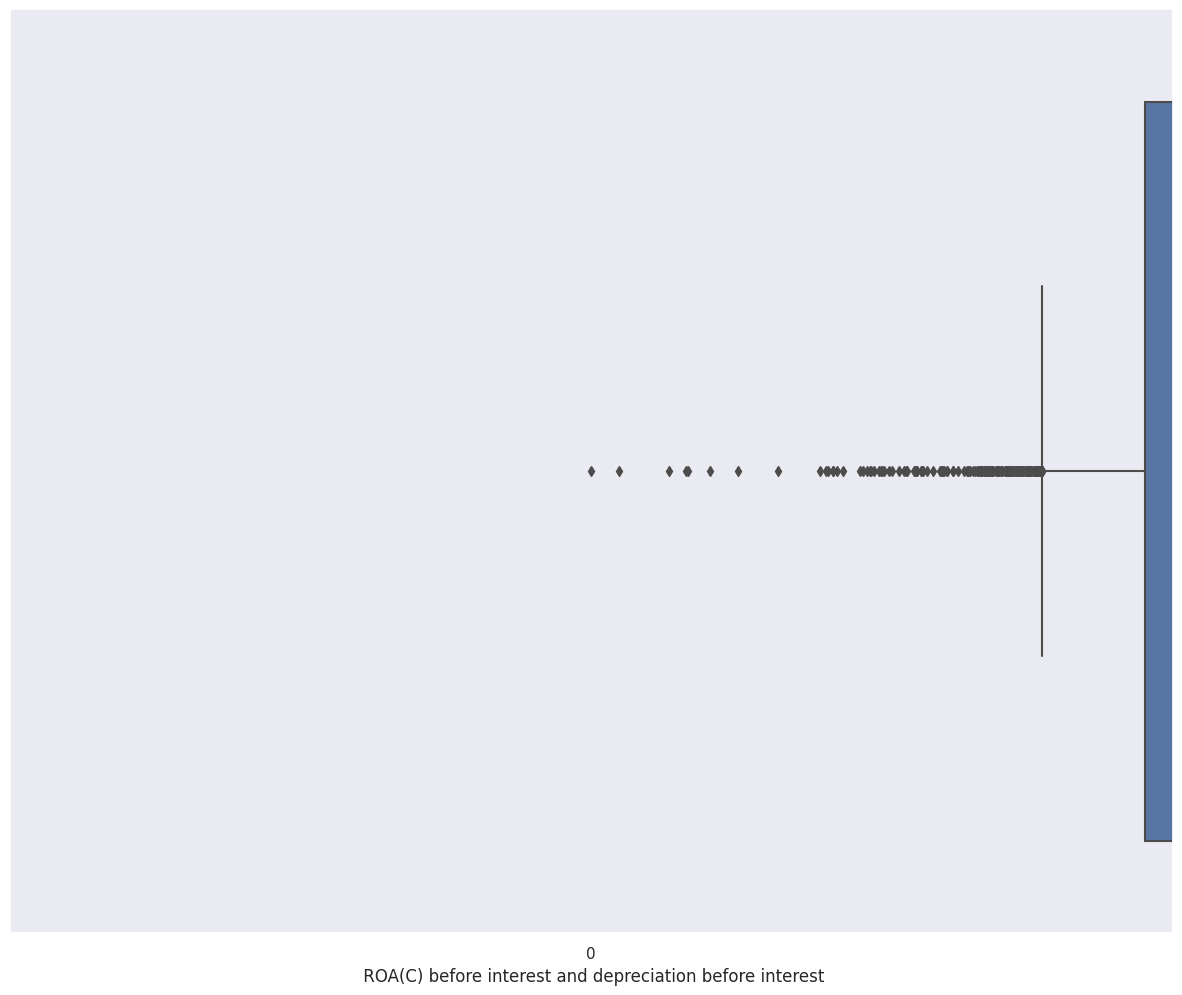

<Figure size 640x480 with 0 Axes>

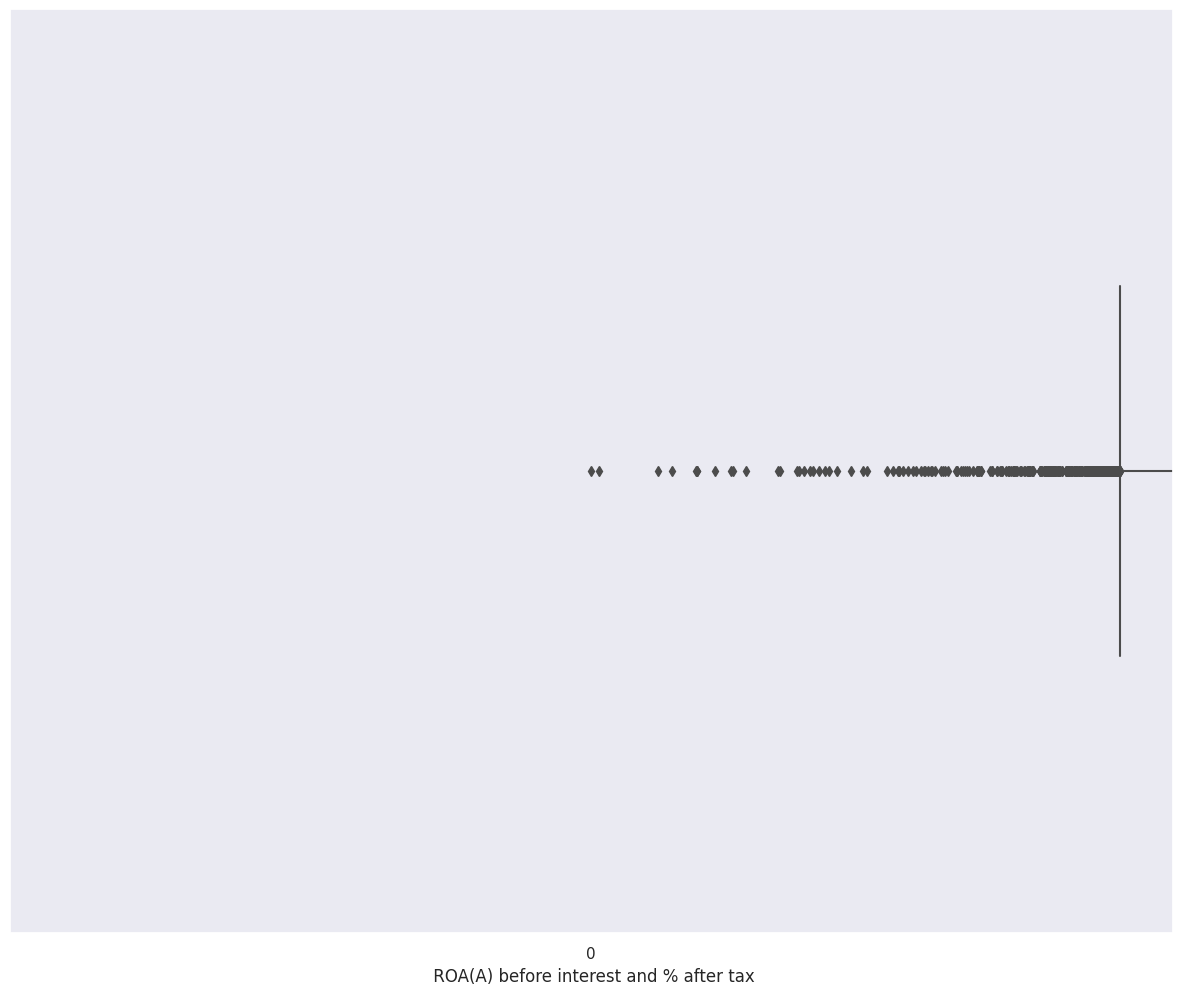

<Figure size 640x480 with 0 Axes>

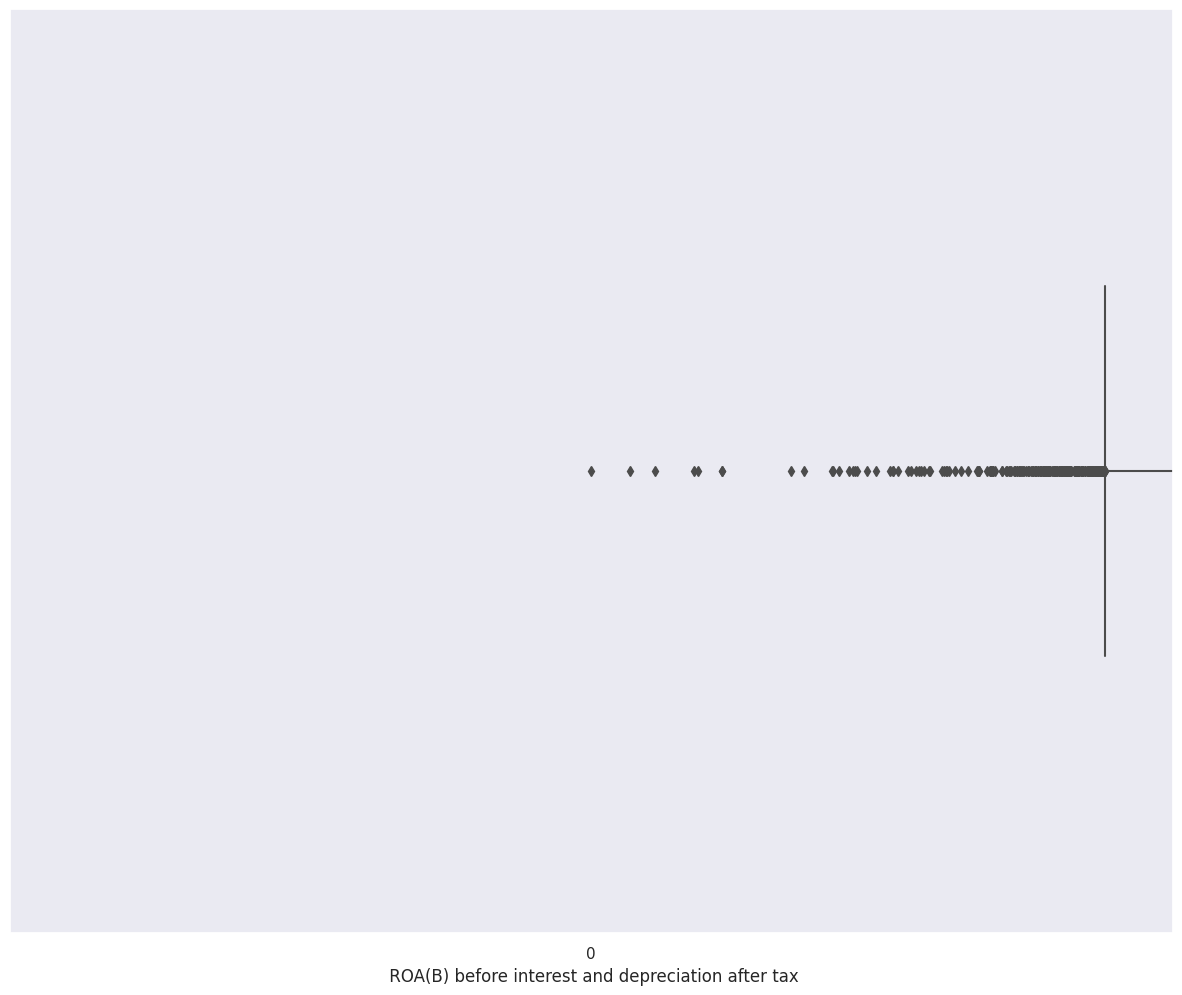

<Figure size 640x480 with 0 Axes>

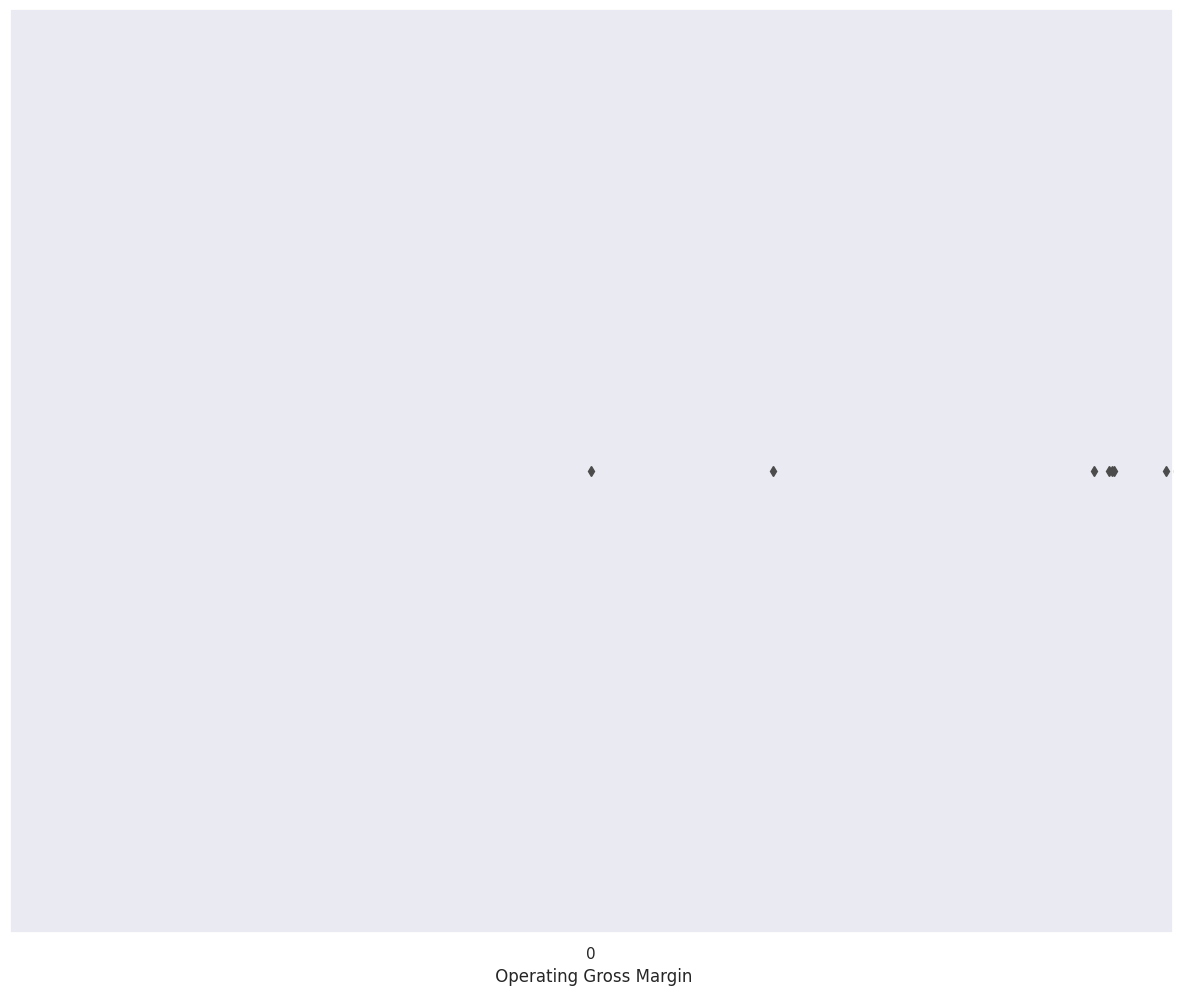

<Figure size 640x480 with 0 Axes>

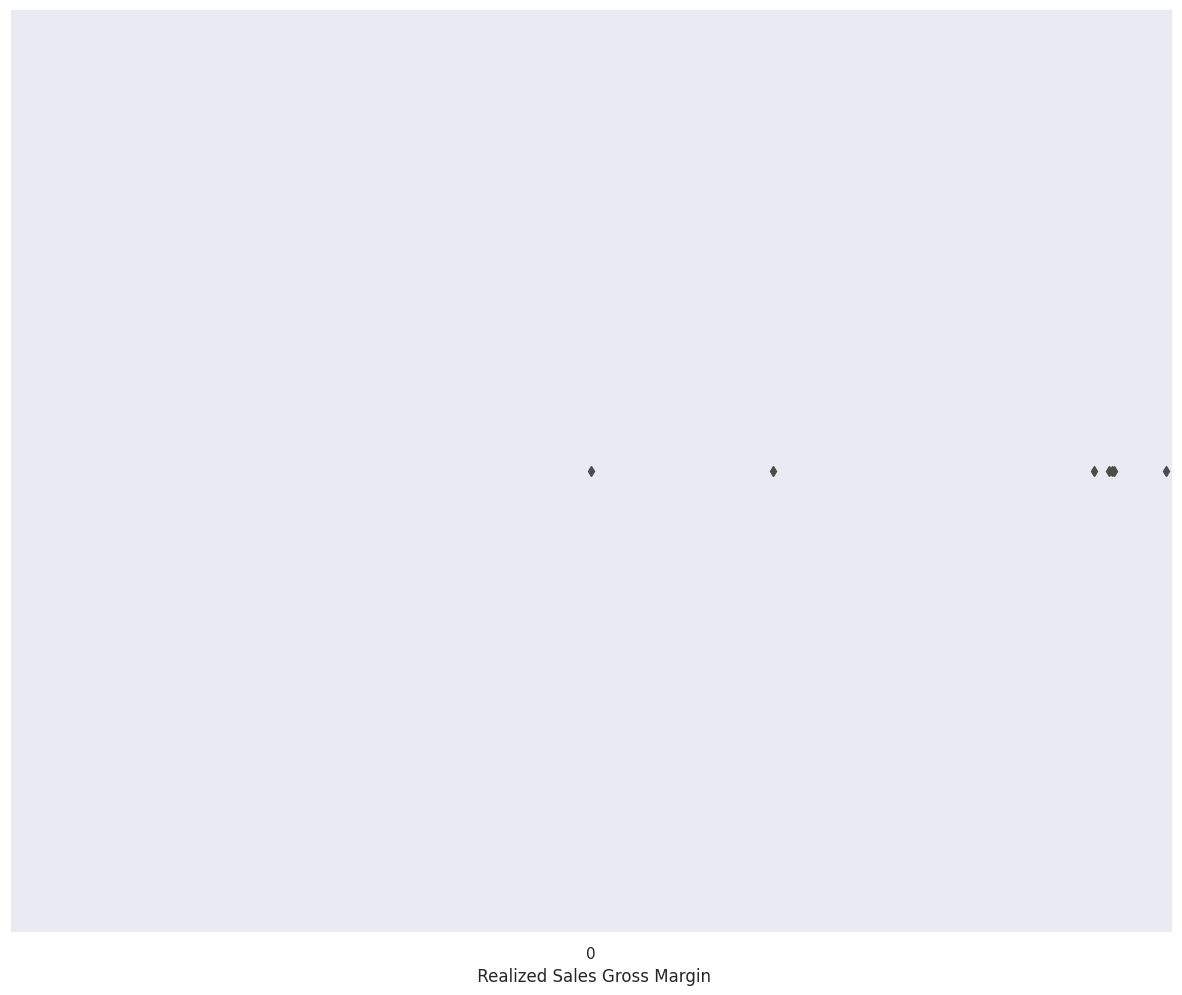

<Figure size 640x480 with 0 Axes>

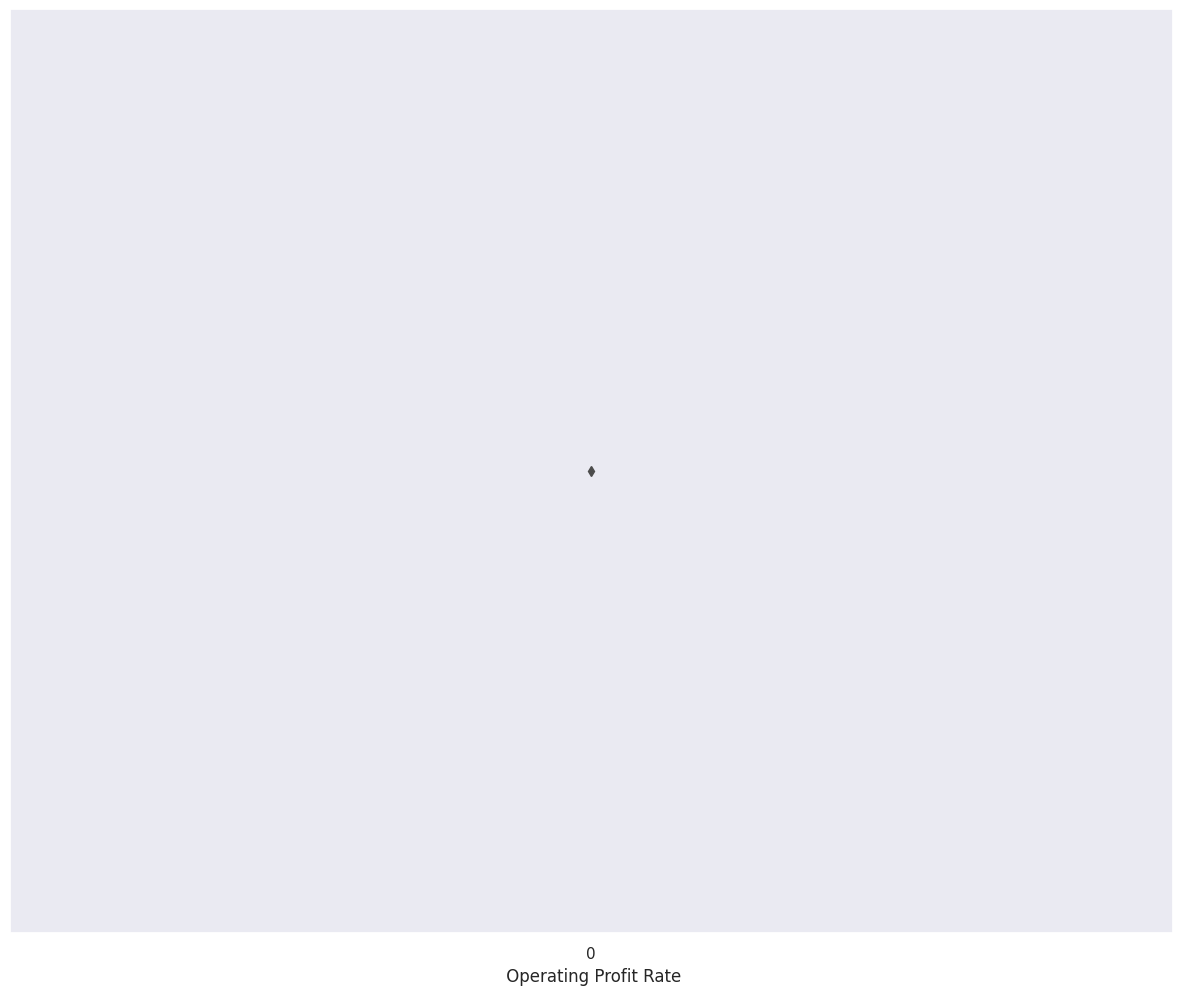

<Figure size 640x480 with 0 Axes>

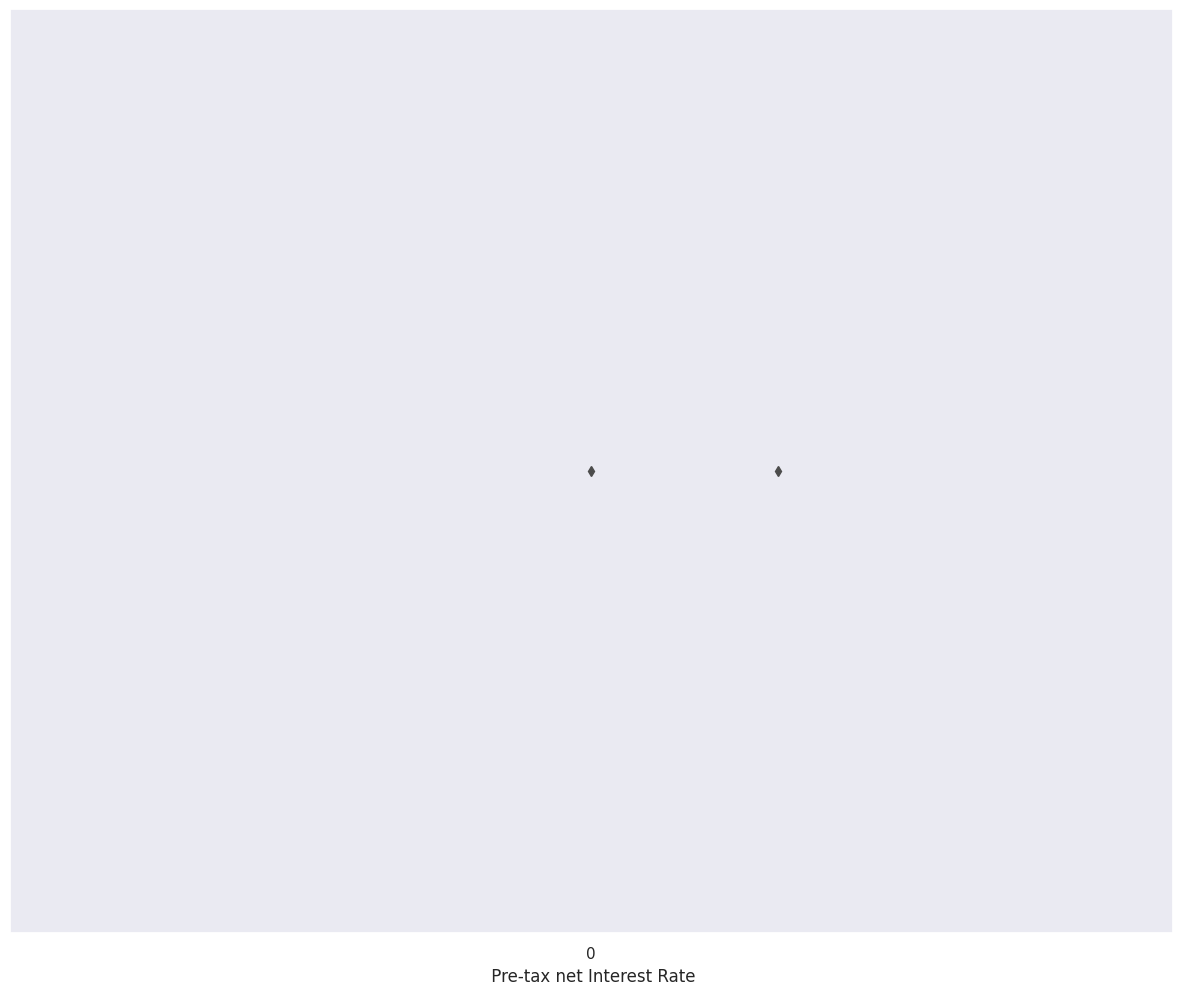

<Figure size 640x480 with 0 Axes>

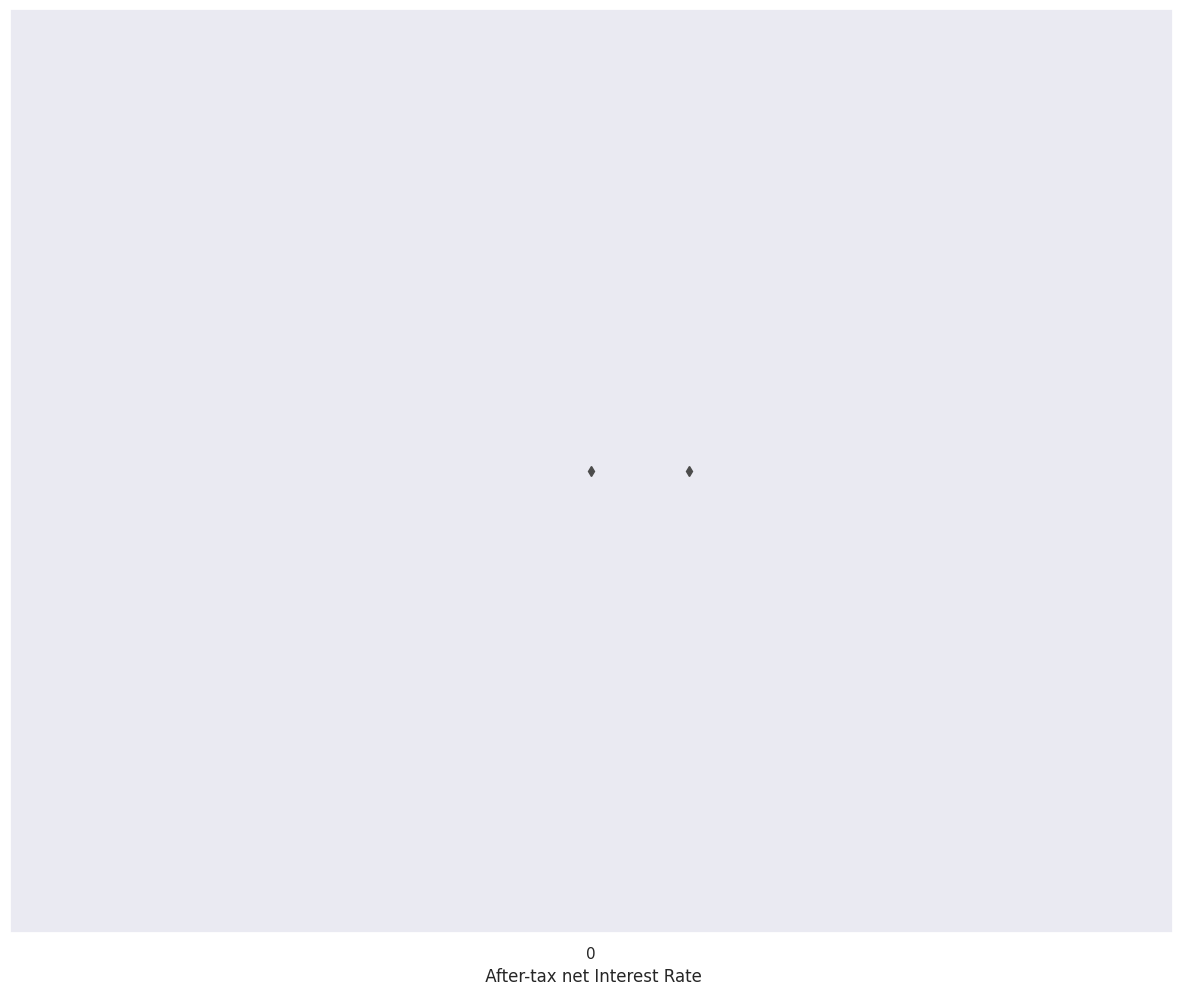

<Figure size 640x480 with 0 Axes>

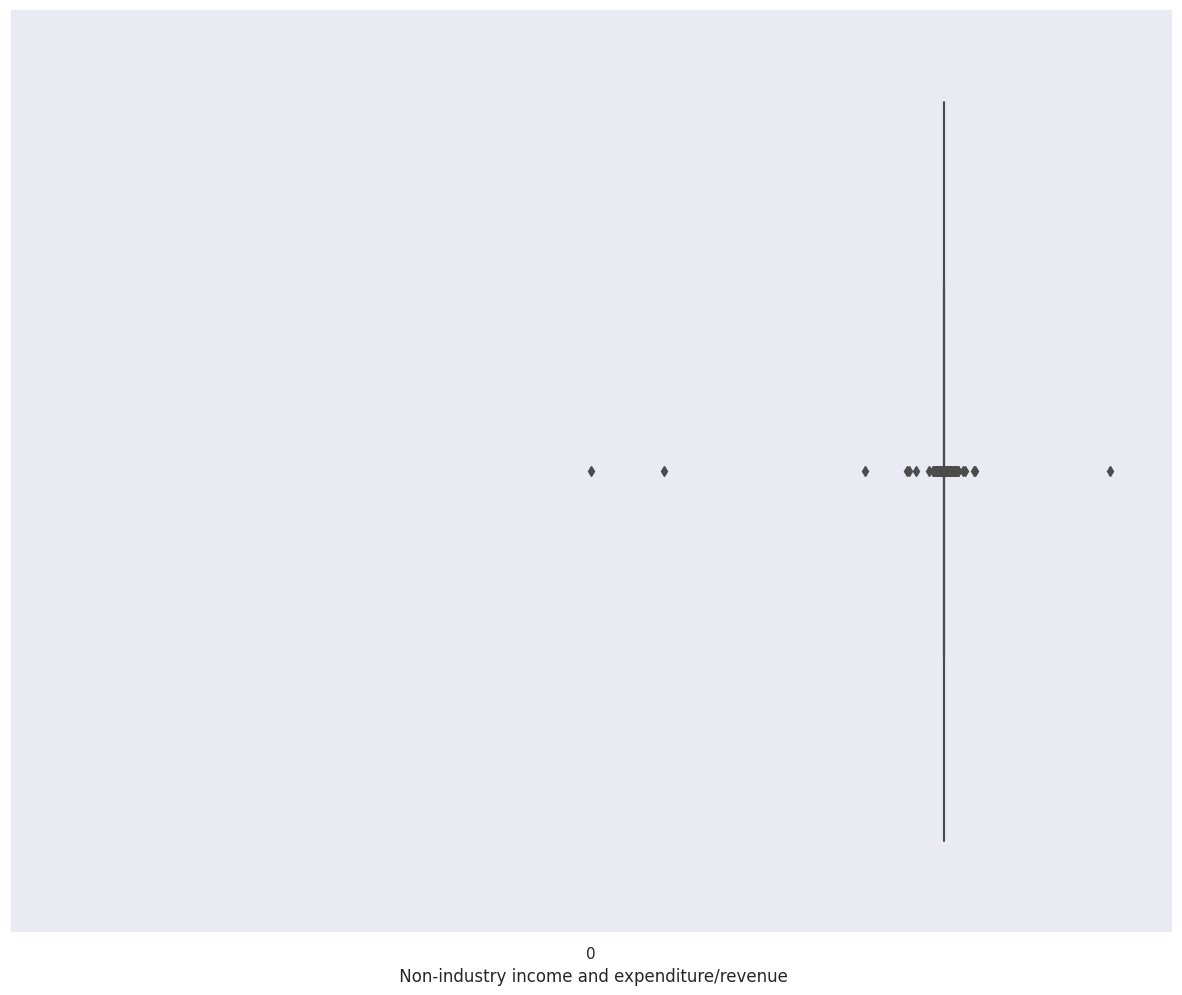

<Figure size 640x480 with 0 Axes>

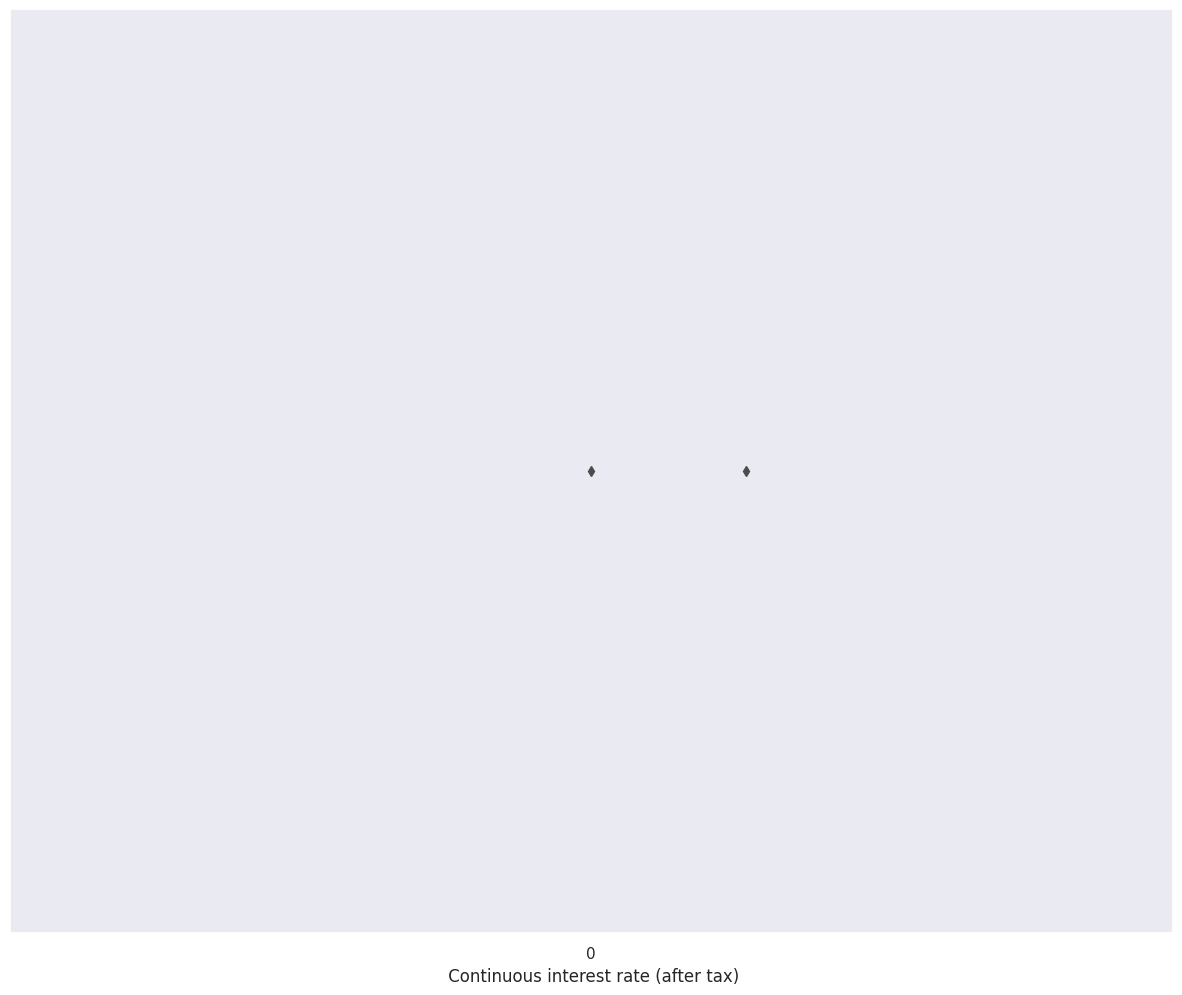

<Figure size 640x480 with 0 Axes>

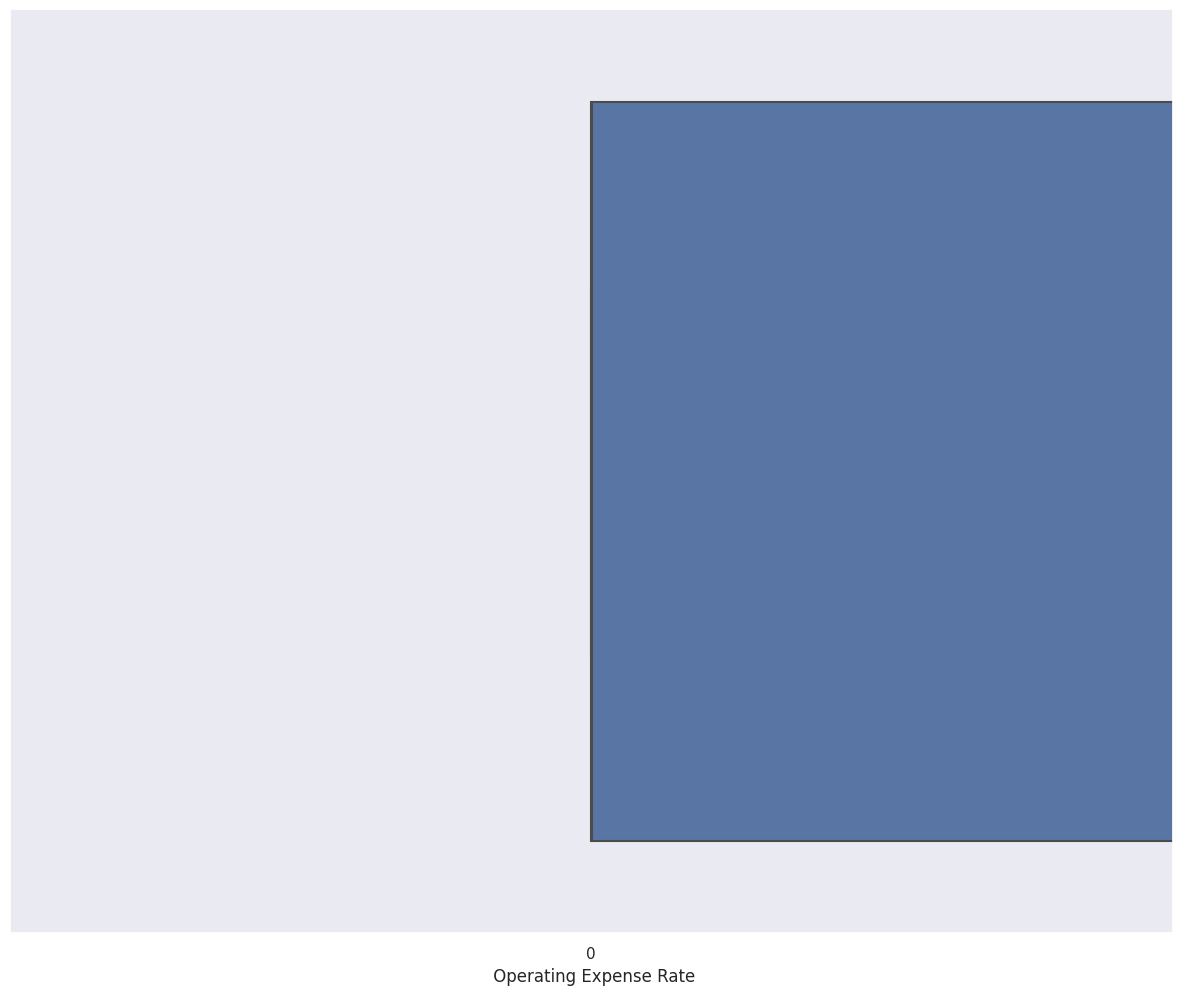

<Figure size 640x480 with 0 Axes>

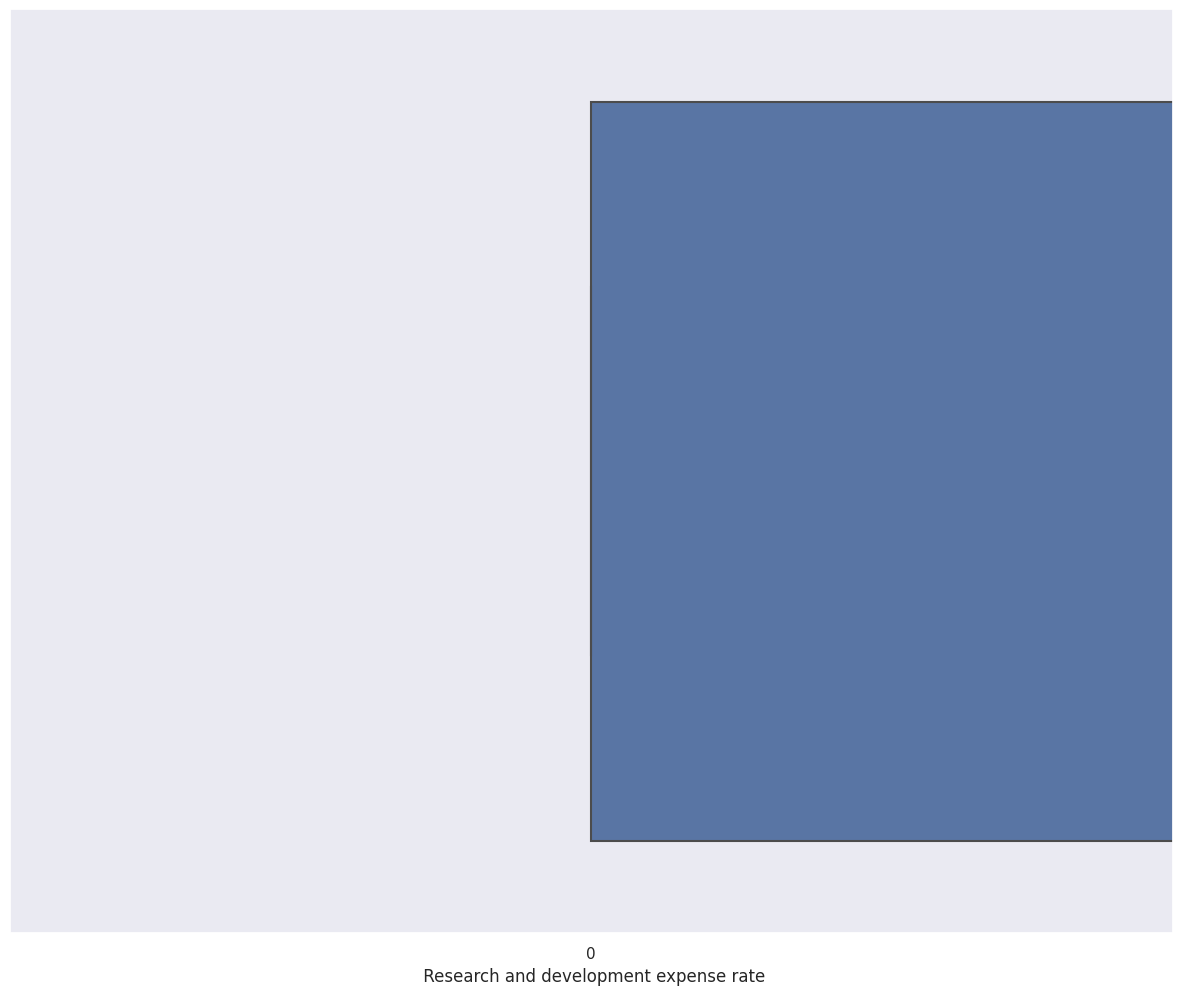

<Figure size 640x480 with 0 Axes>

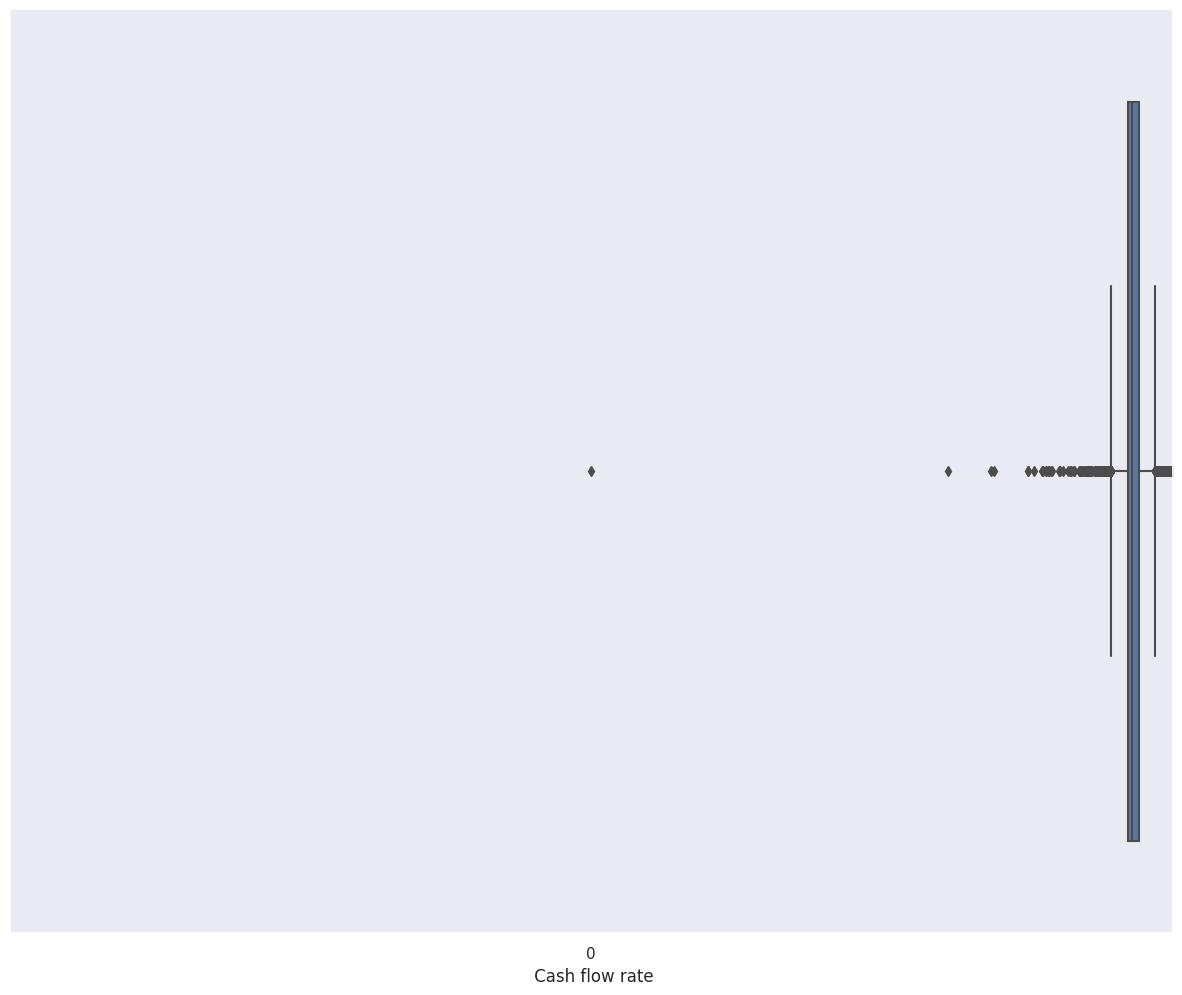

<Figure size 640x480 with 0 Axes>

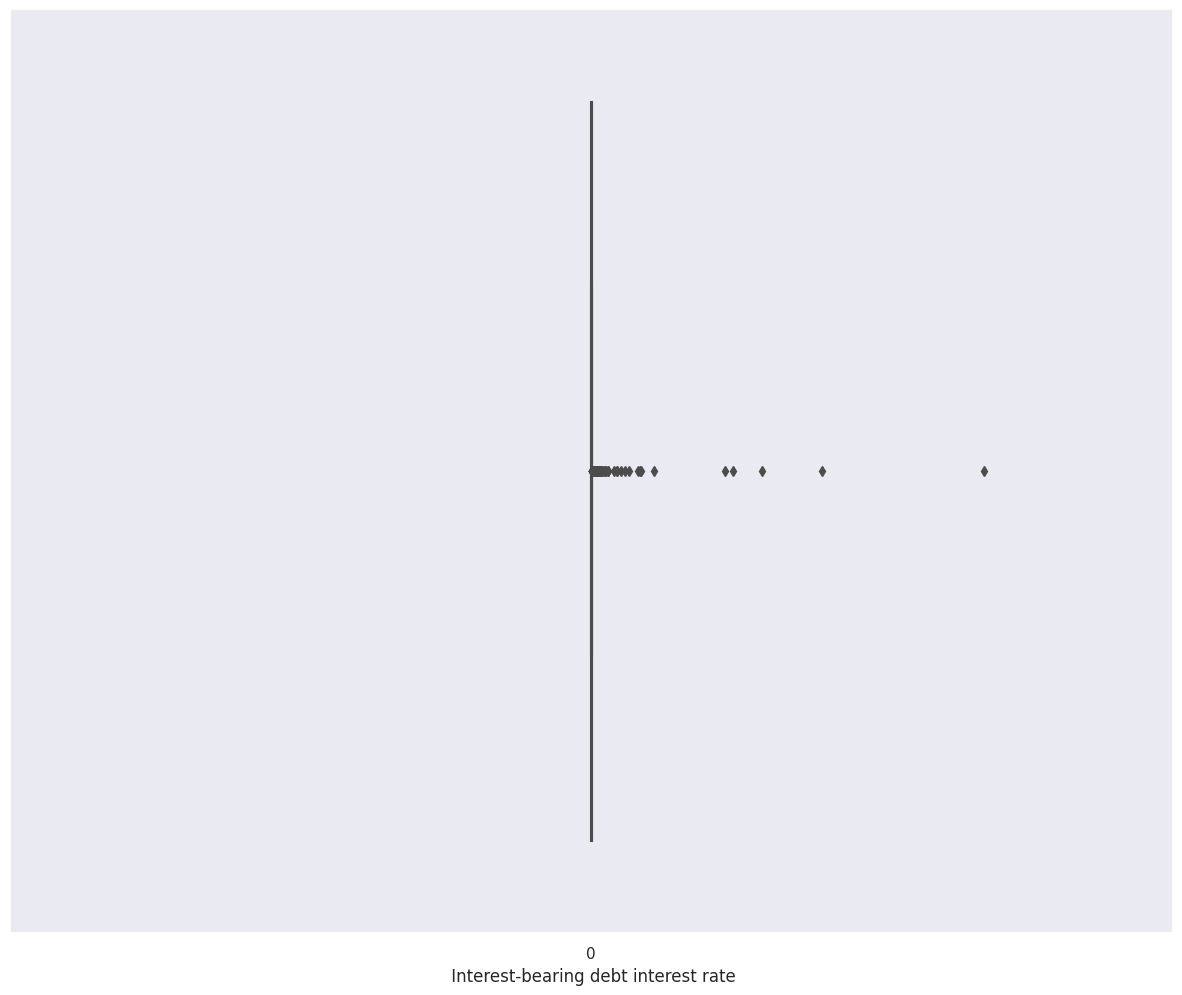

<Figure size 640x480 with 0 Axes>

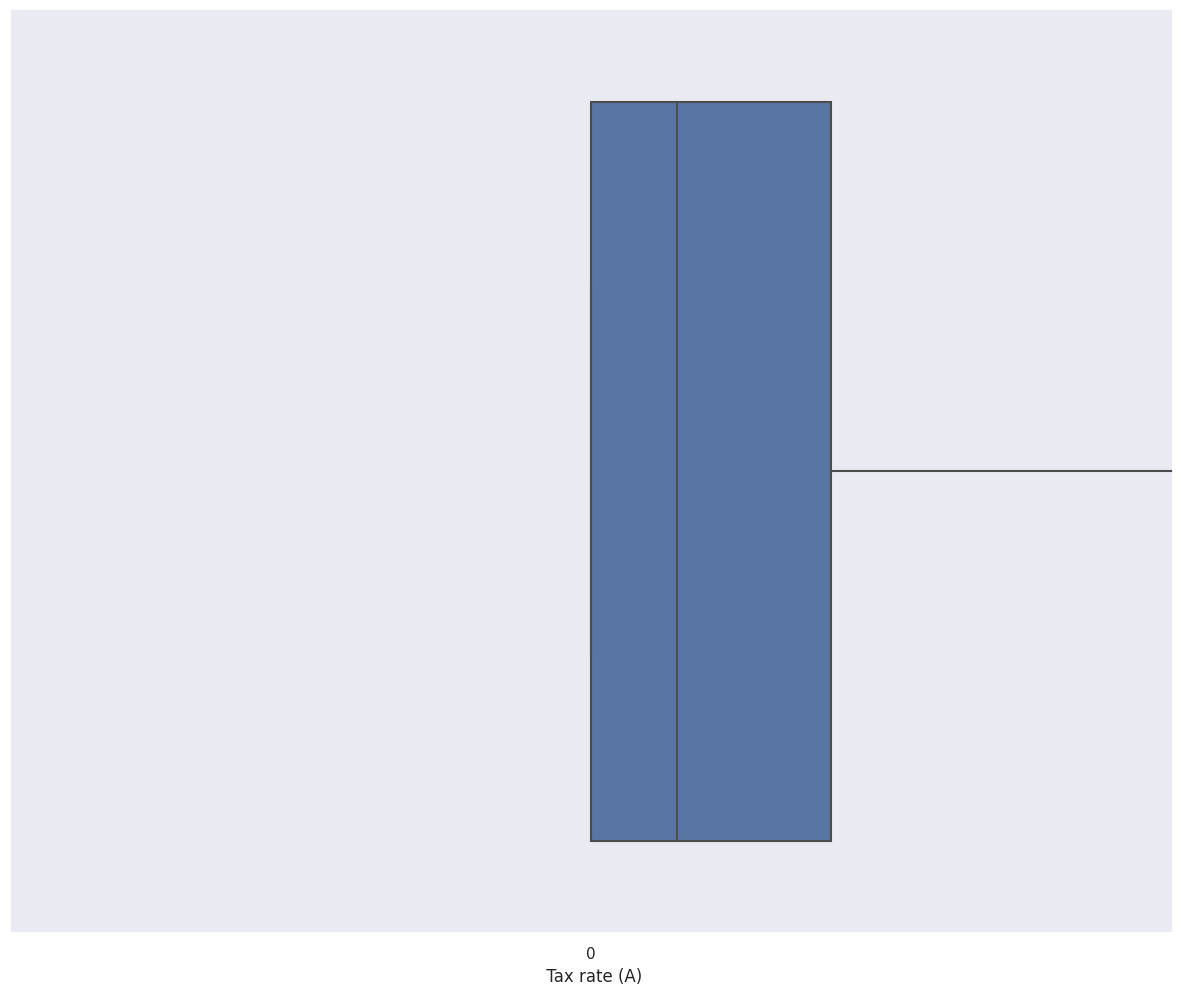

<Figure size 640x480 with 0 Axes>

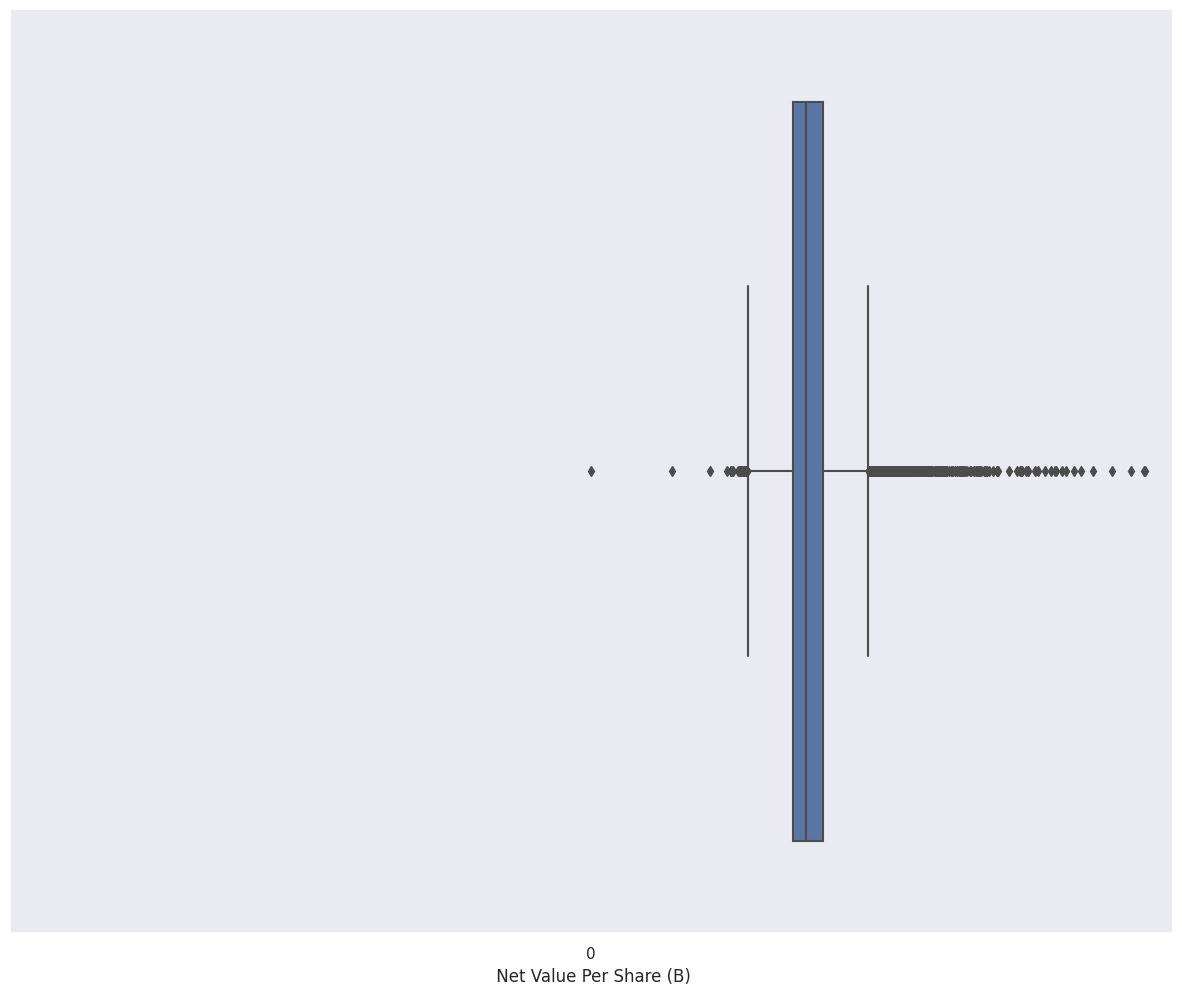

<Figure size 640x480 with 0 Axes>

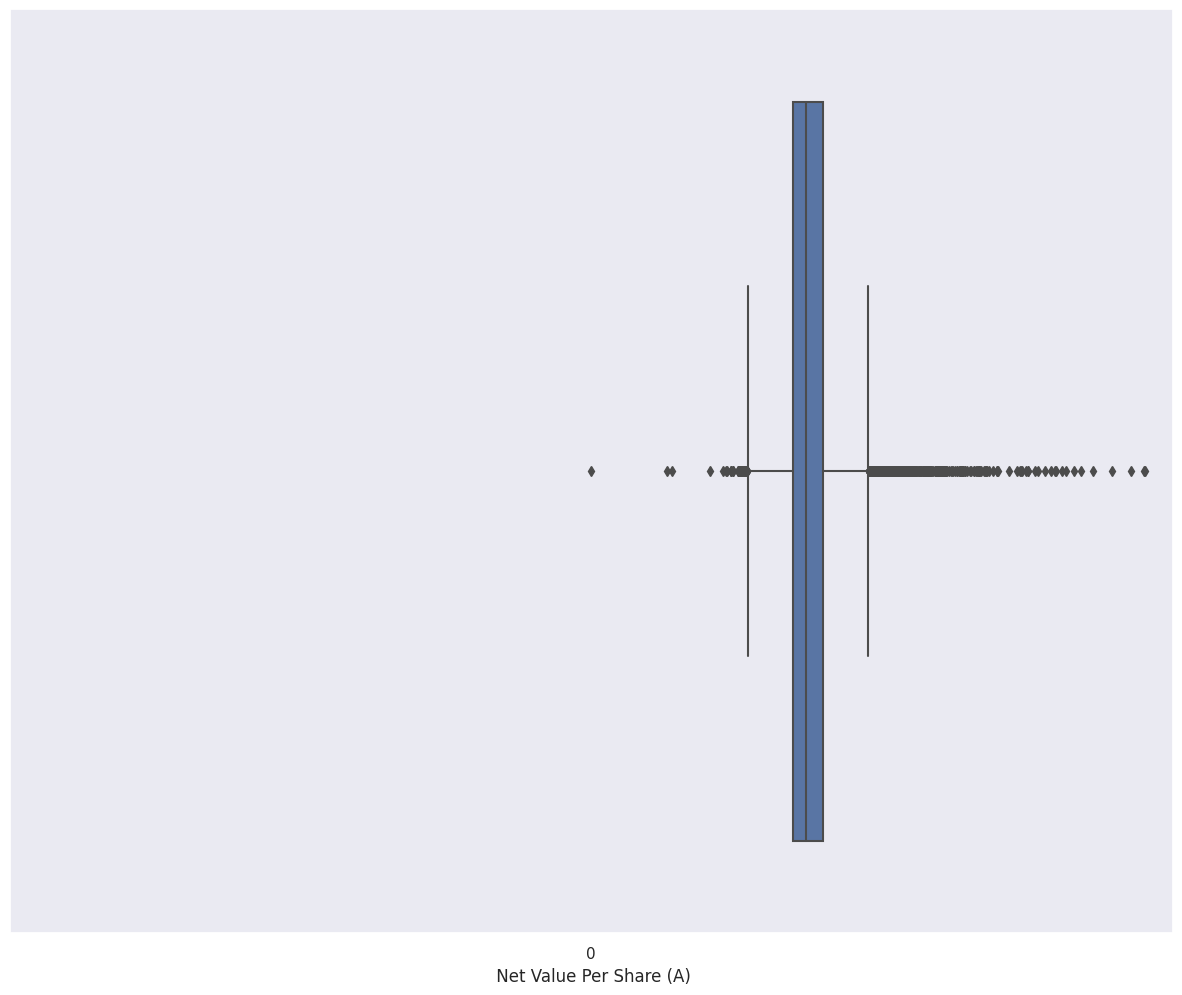

<Figure size 640x480 with 0 Axes>

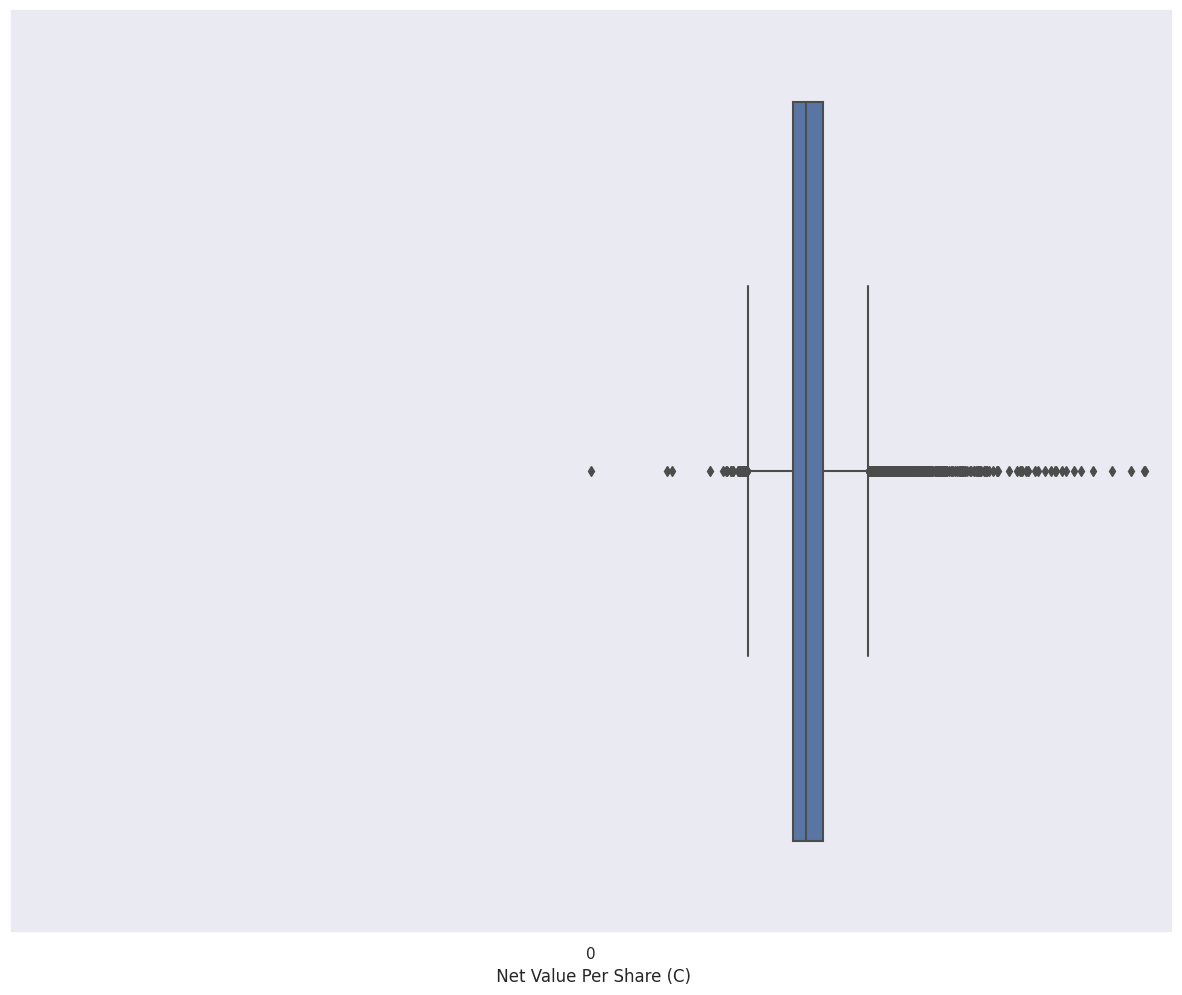

<Figure size 640x480 with 0 Axes>

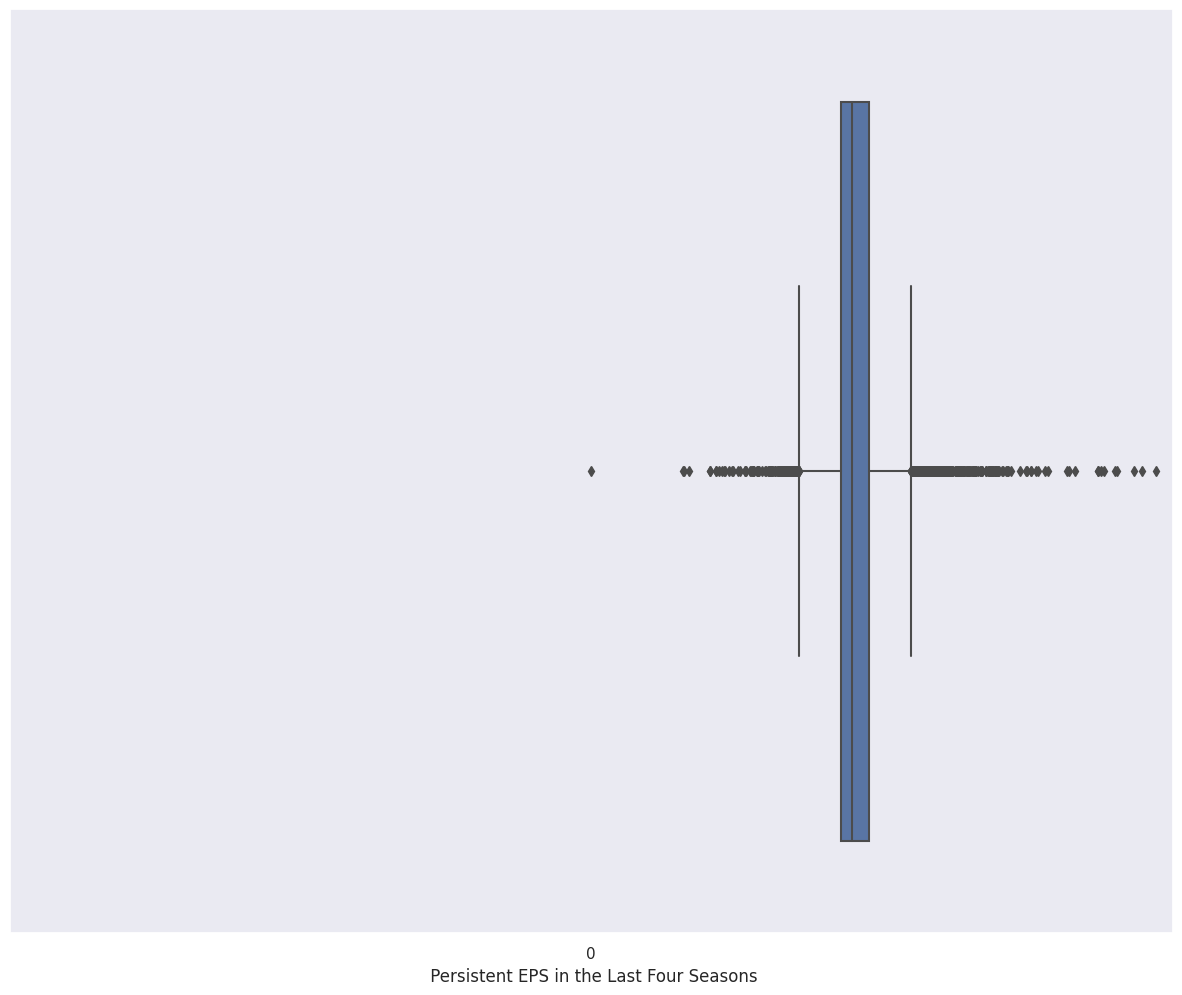

<Figure size 640x480 with 0 Axes>

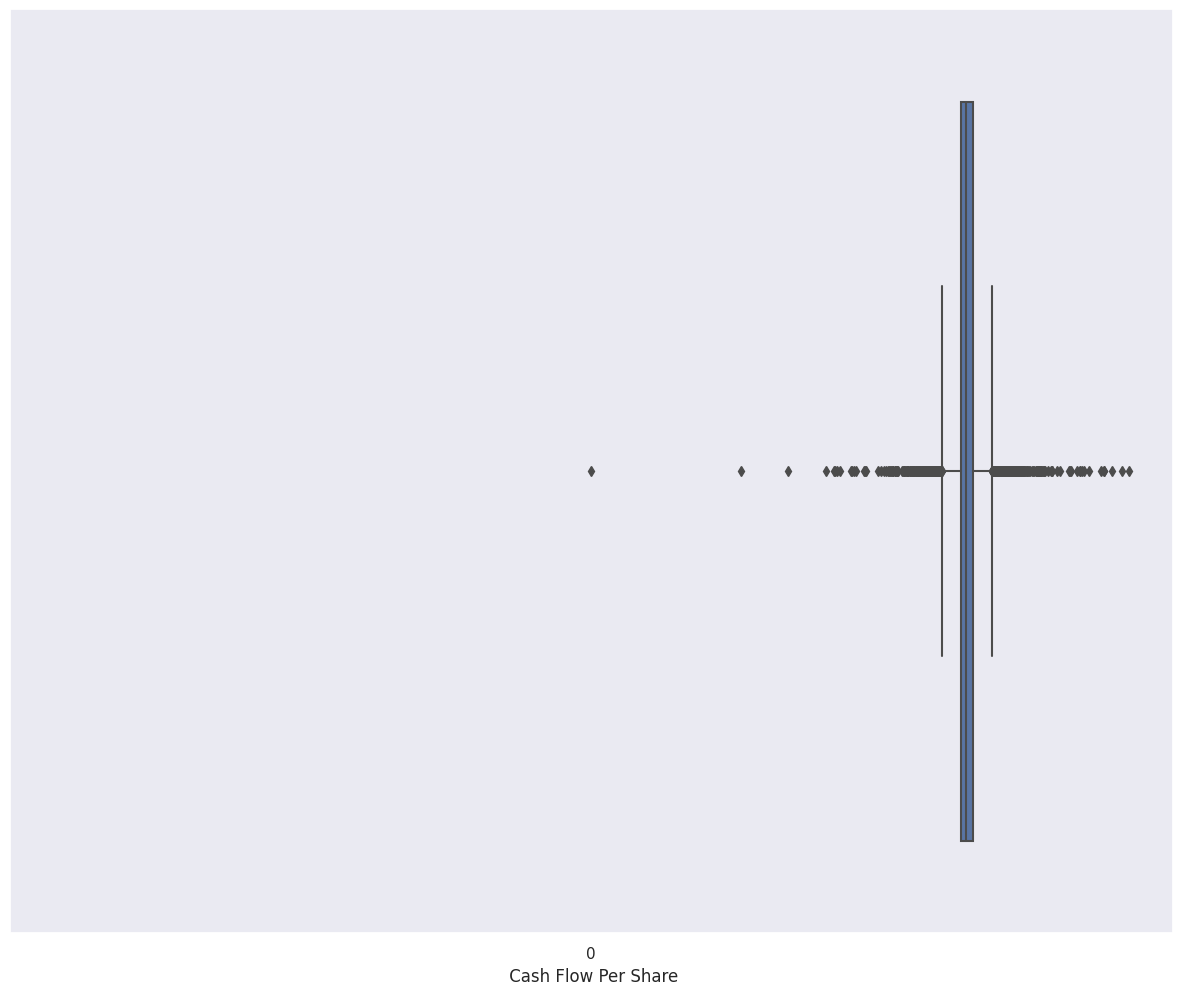

<Figure size 640x480 with 0 Axes>

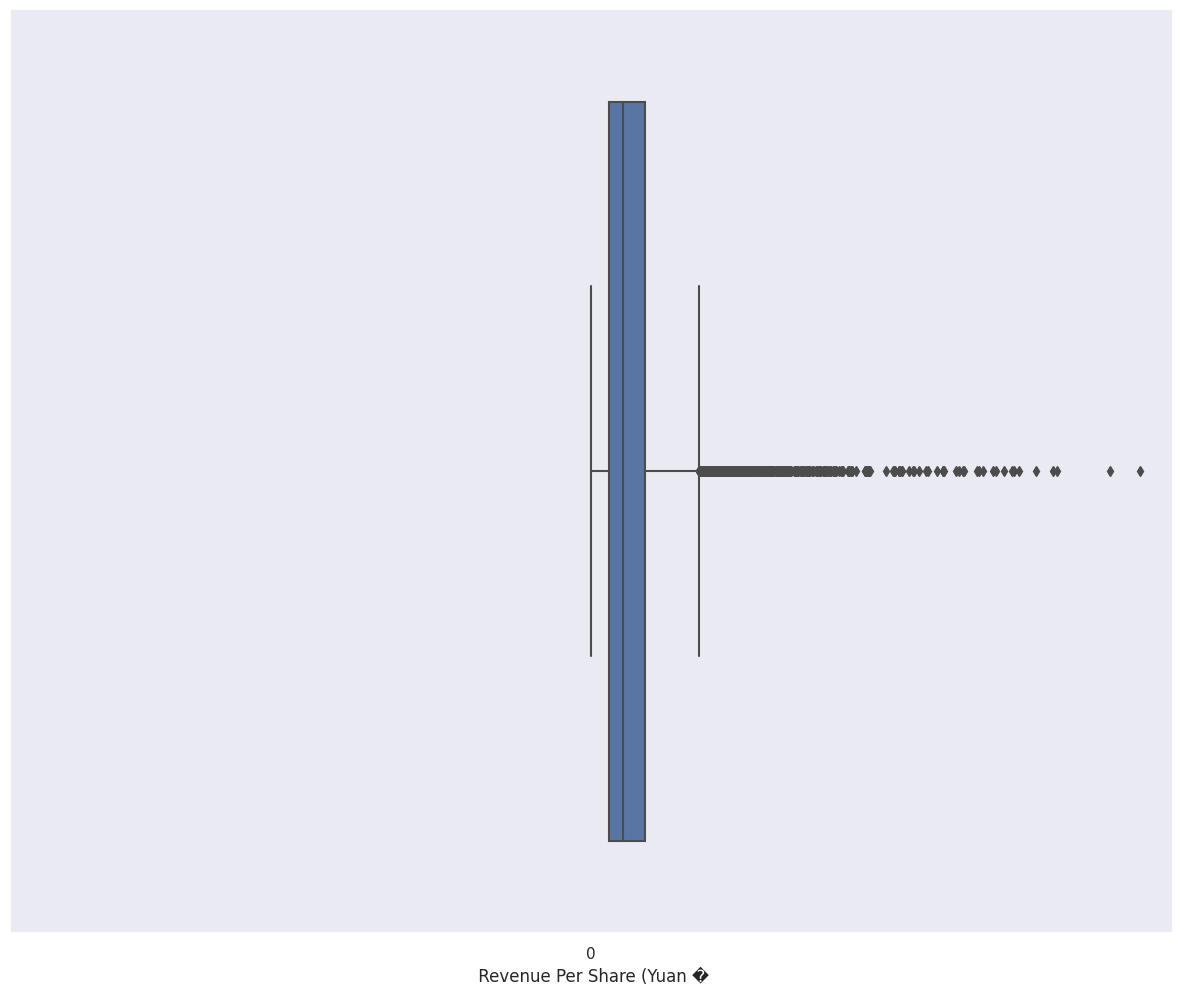

<Figure size 640x480 with 0 Axes>

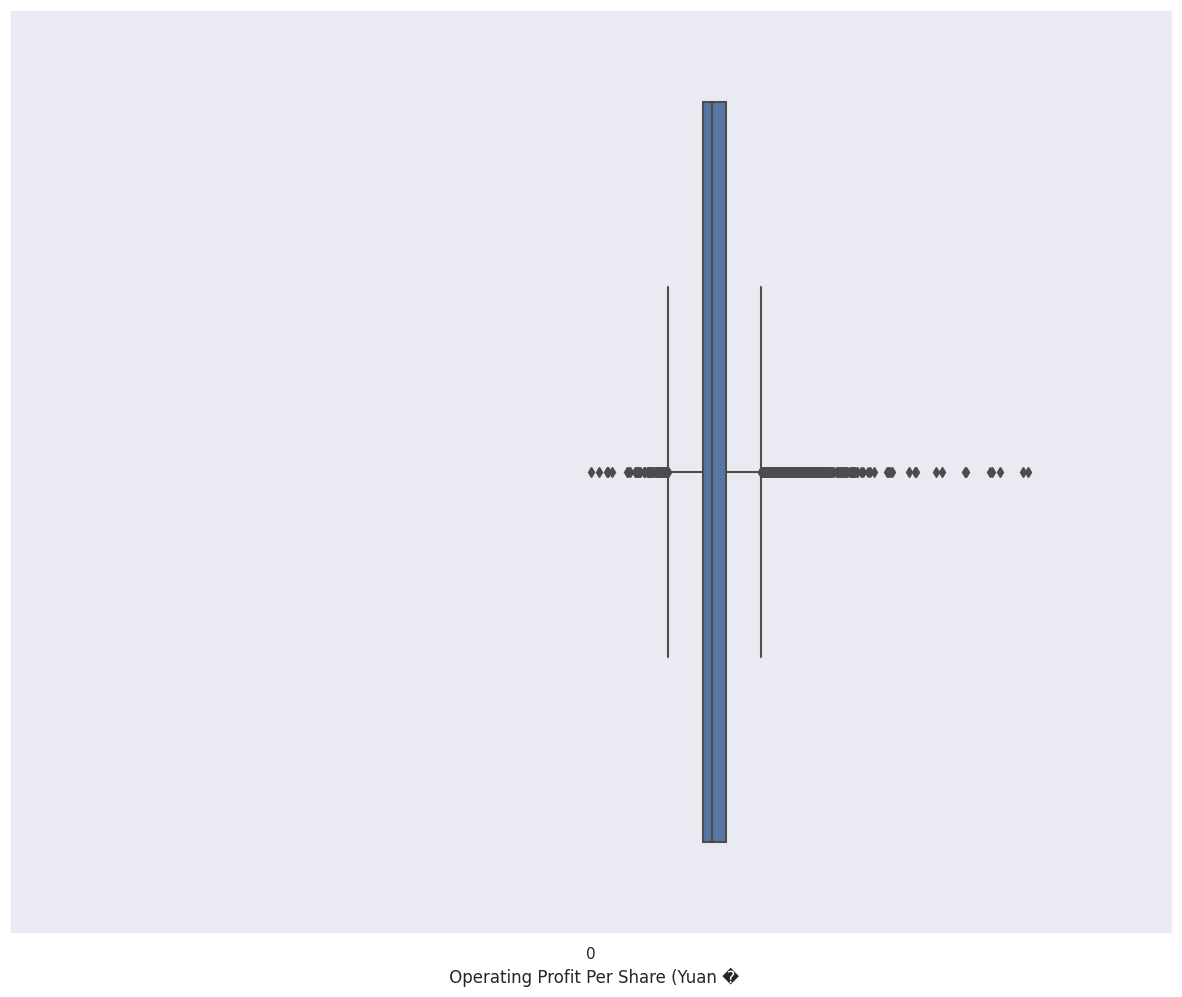

<Figure size 640x480 with 0 Axes>

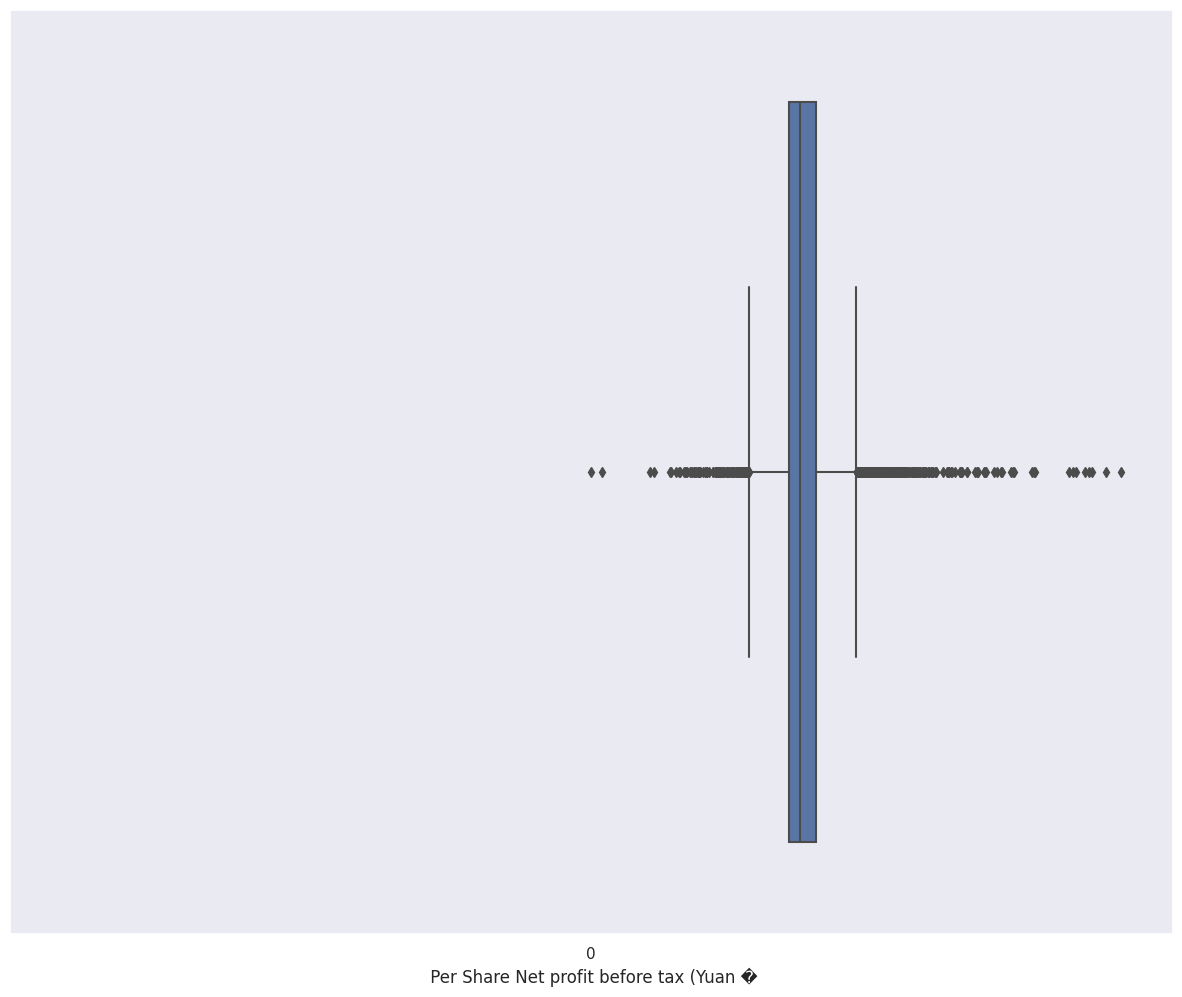

<Figure size 640x480 with 0 Axes>

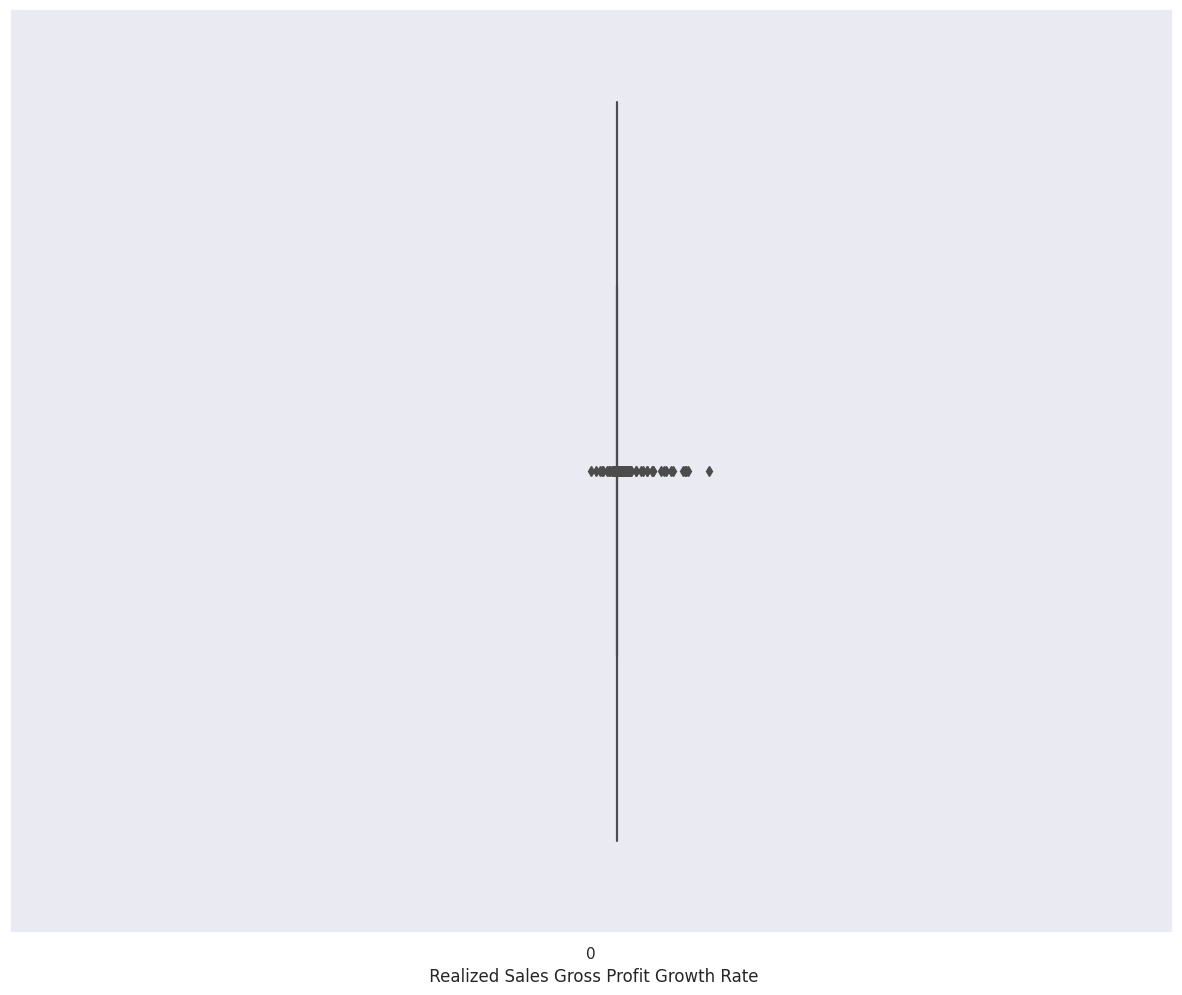

<Figure size 640x480 with 0 Axes>

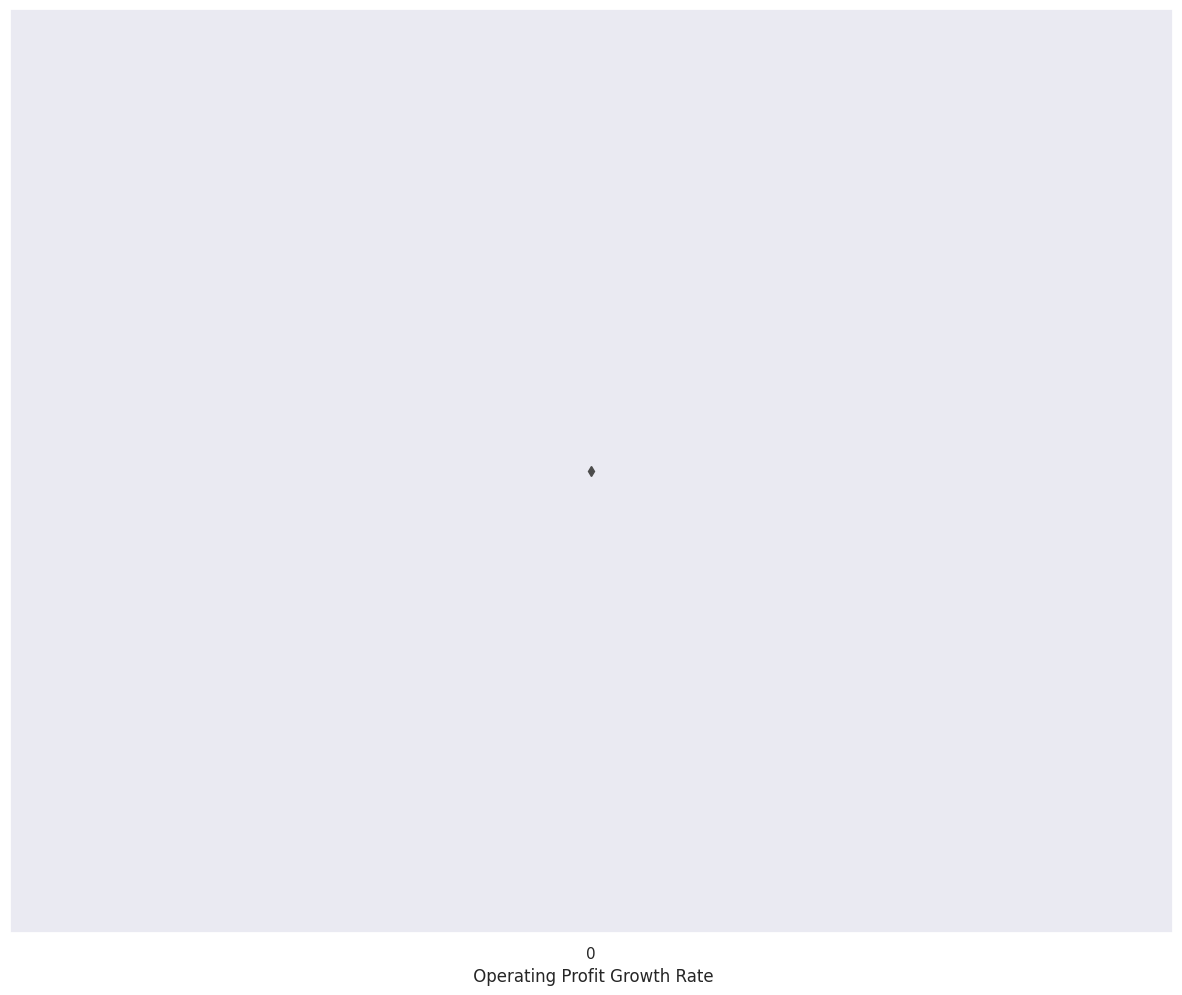

<Figure size 640x480 with 0 Axes>

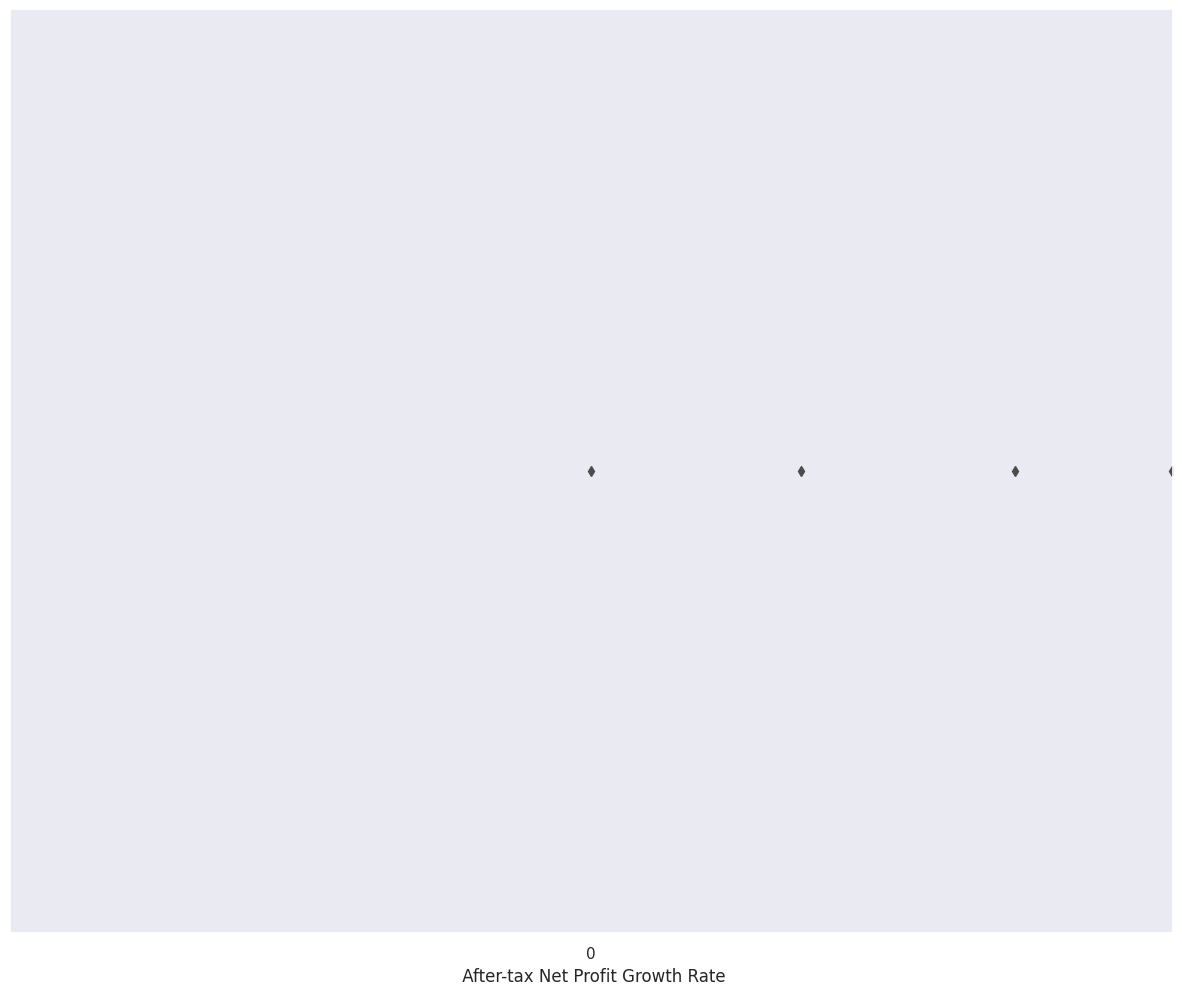

<Figure size 640x480 with 0 Axes>

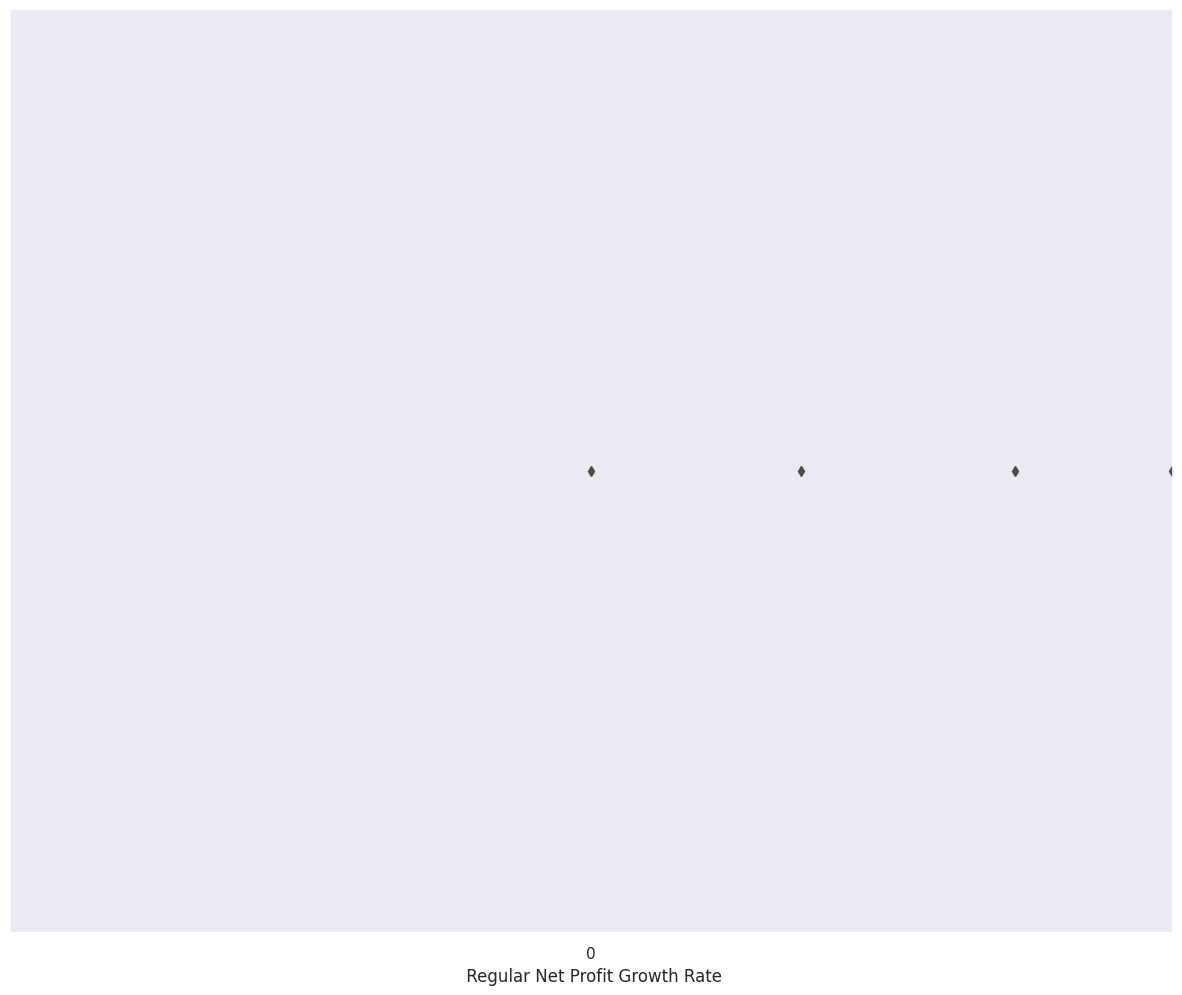

<Figure size 640x480 with 0 Axes>

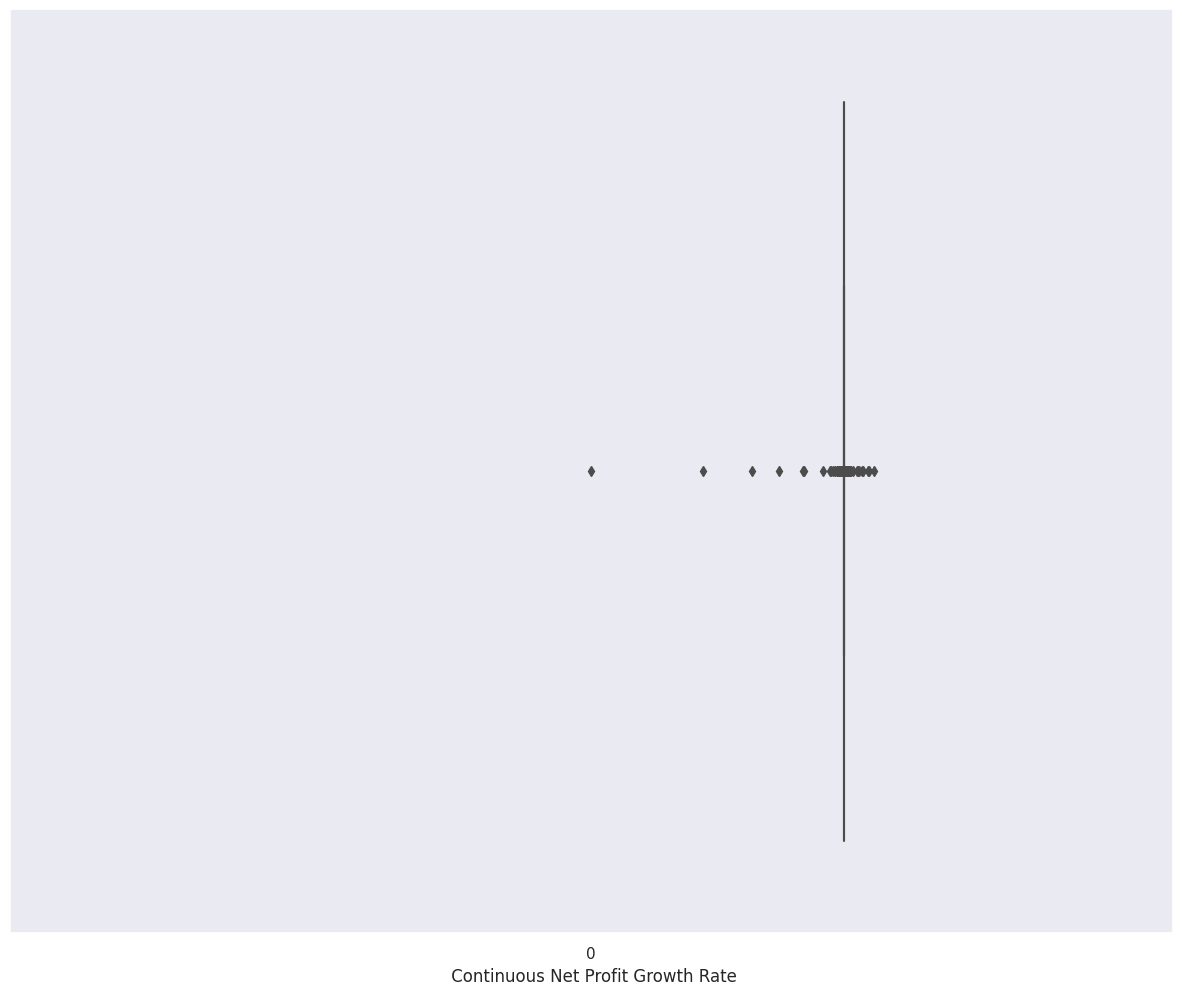

<Figure size 640x480 with 0 Axes>

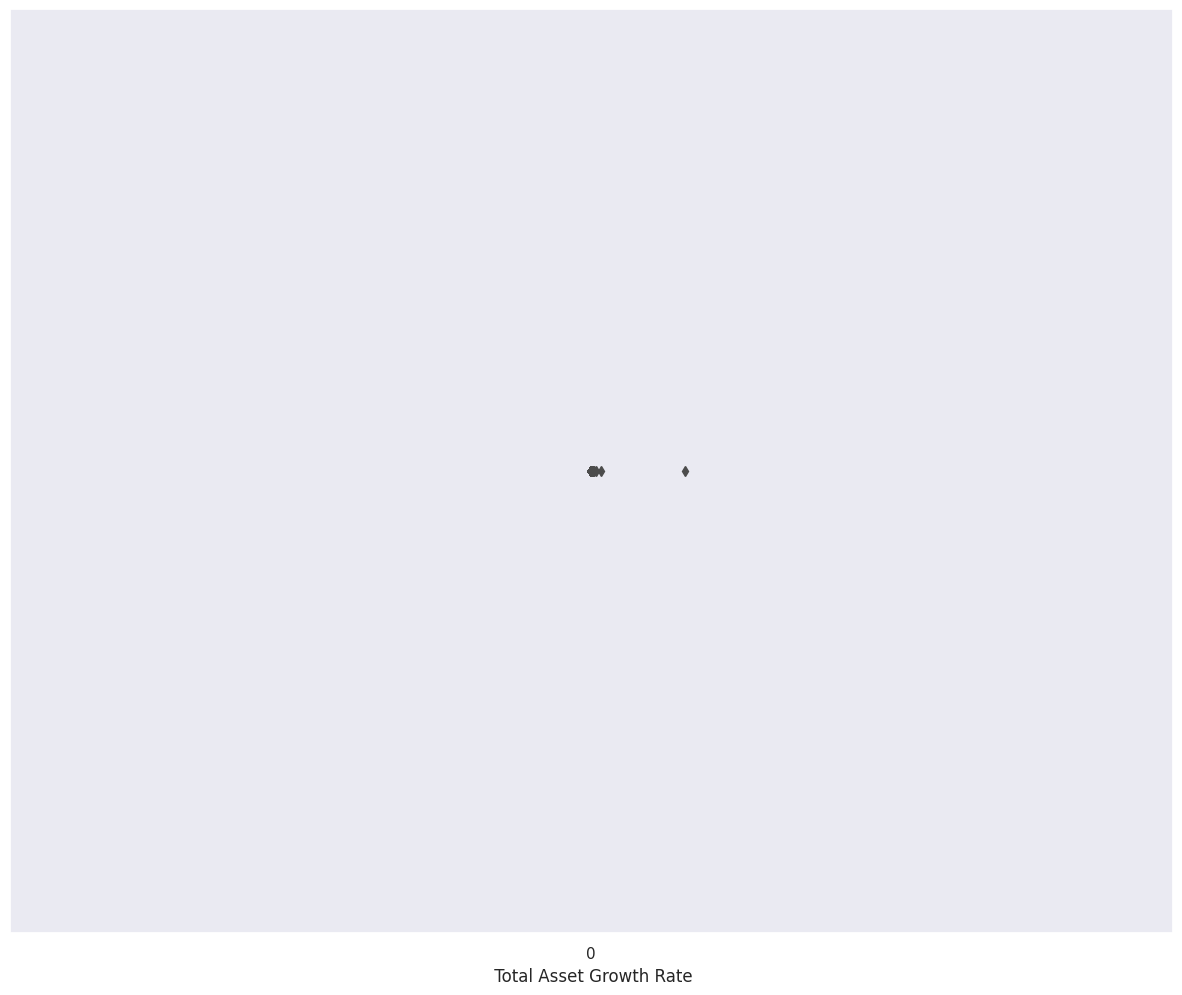

<Figure size 640x480 with 0 Axes>

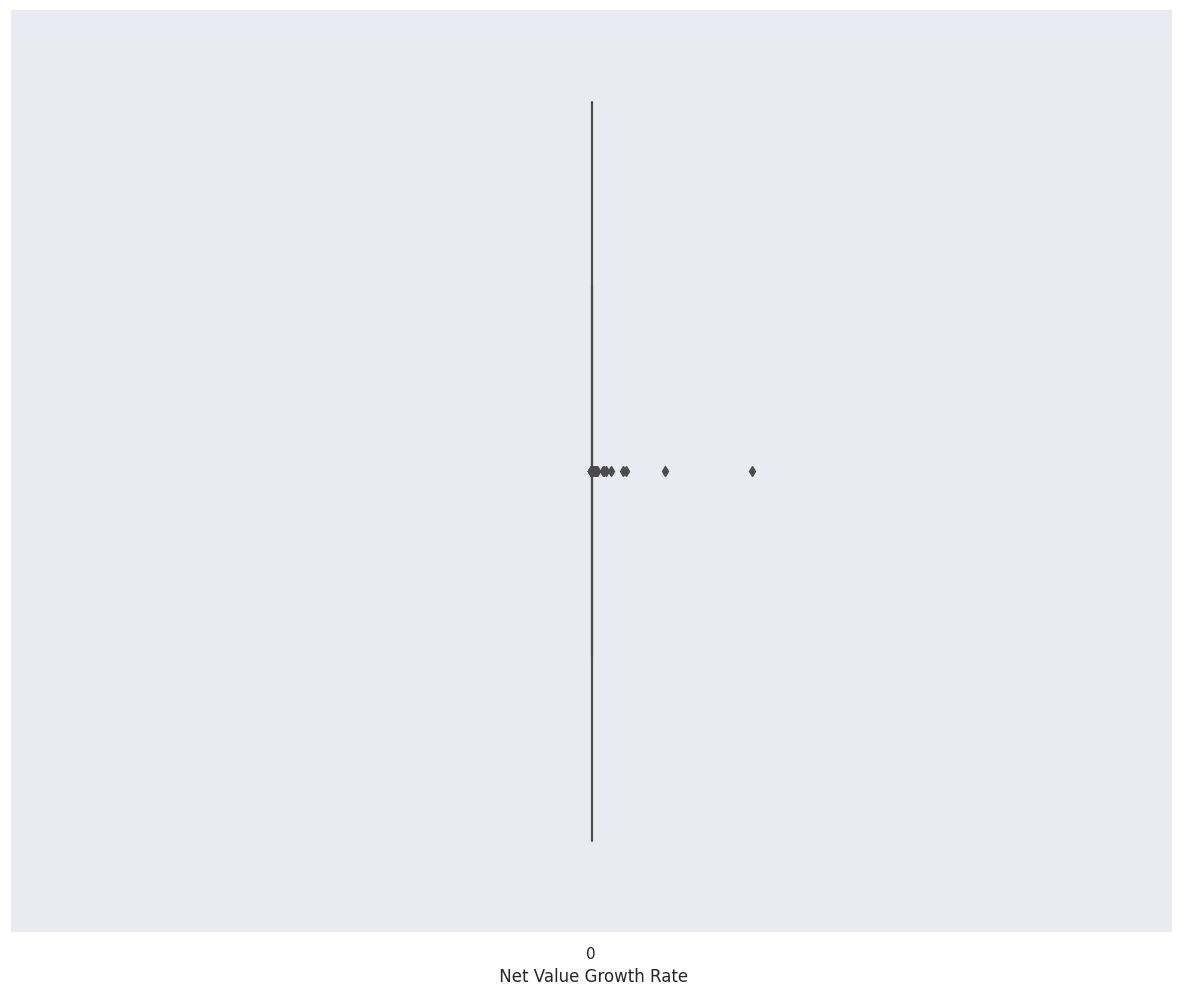

<Figure size 640x480 with 0 Axes>

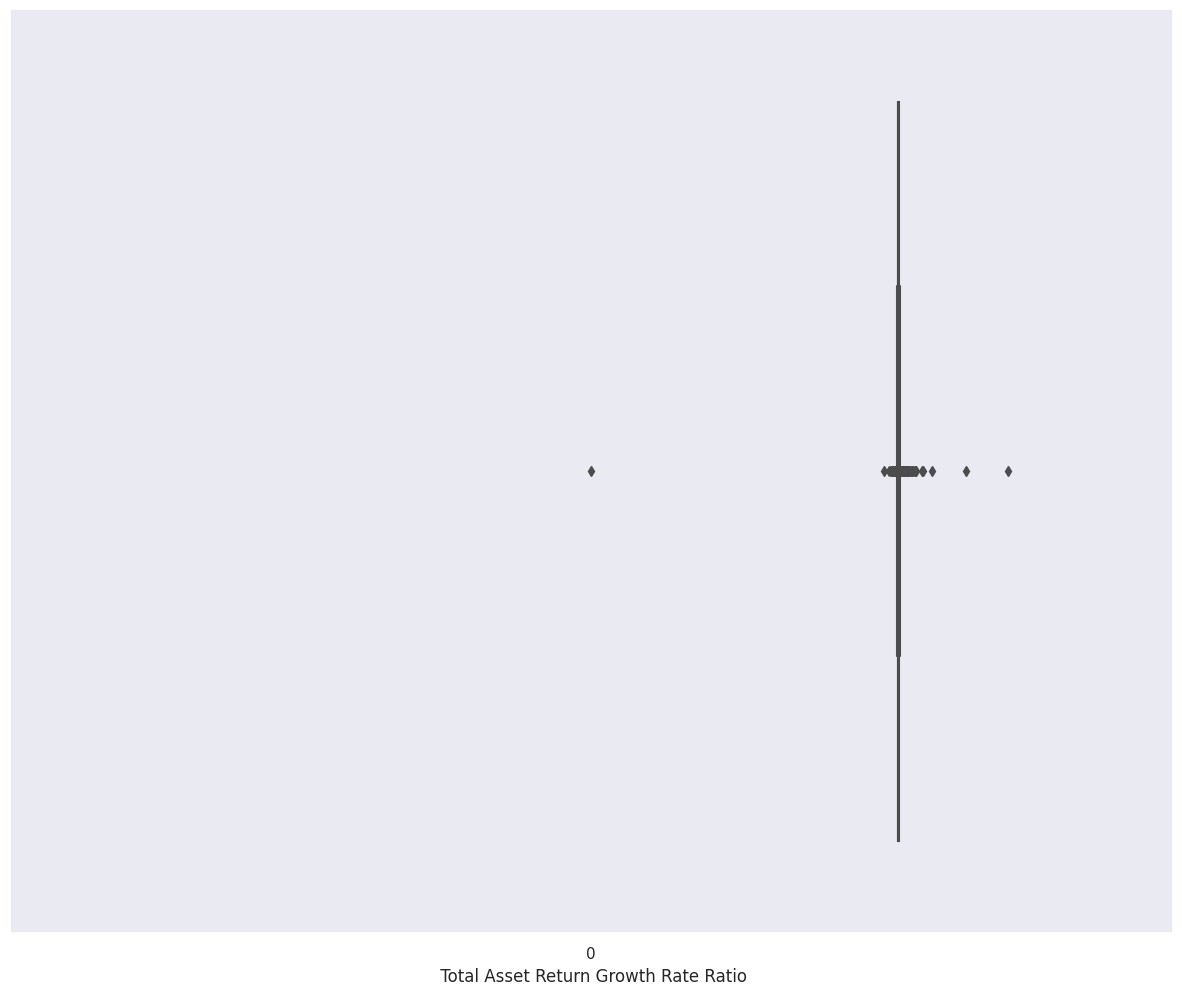

<Figure size 640x480 with 0 Axes>

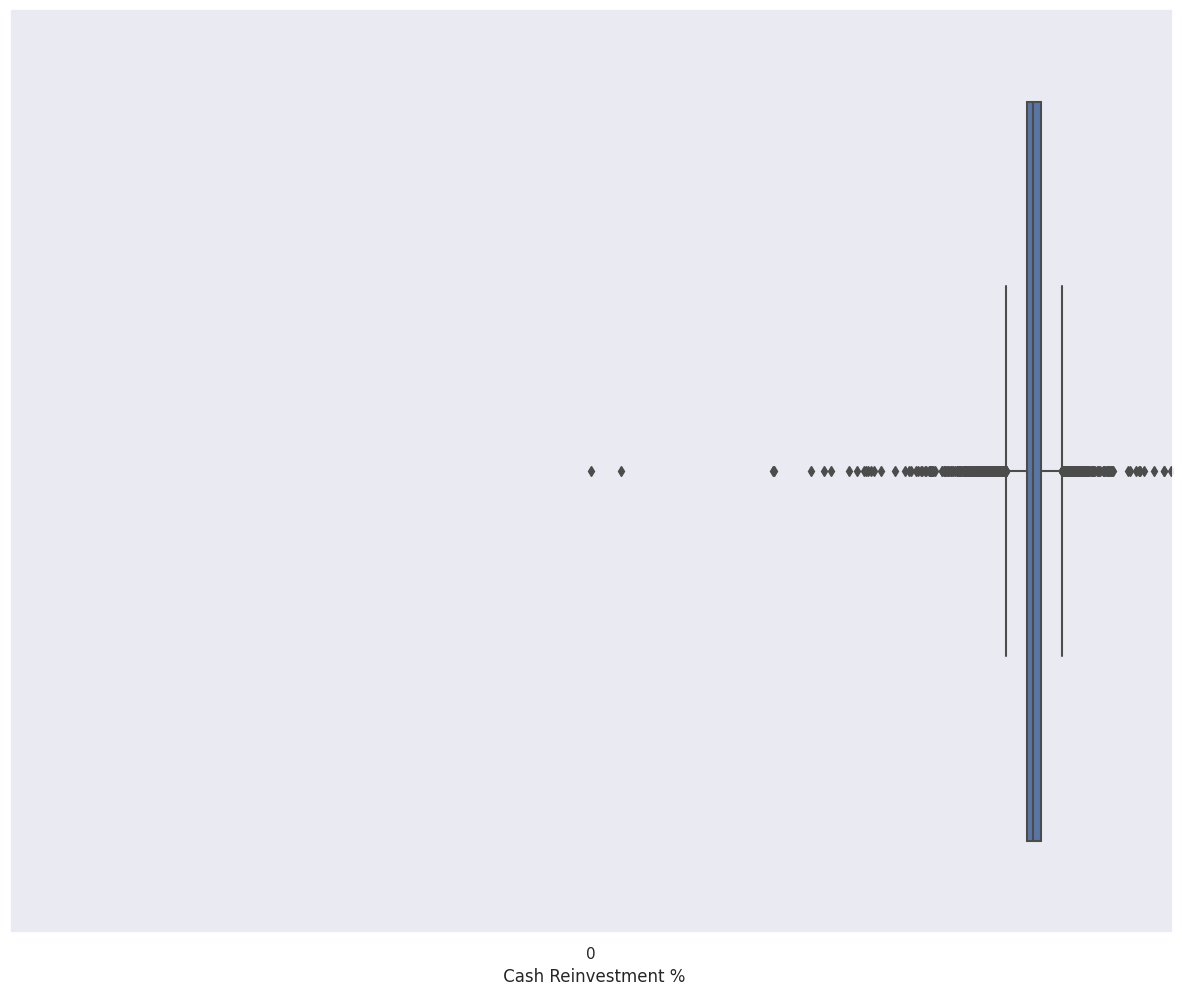

<Figure size 640x480 with 0 Axes>

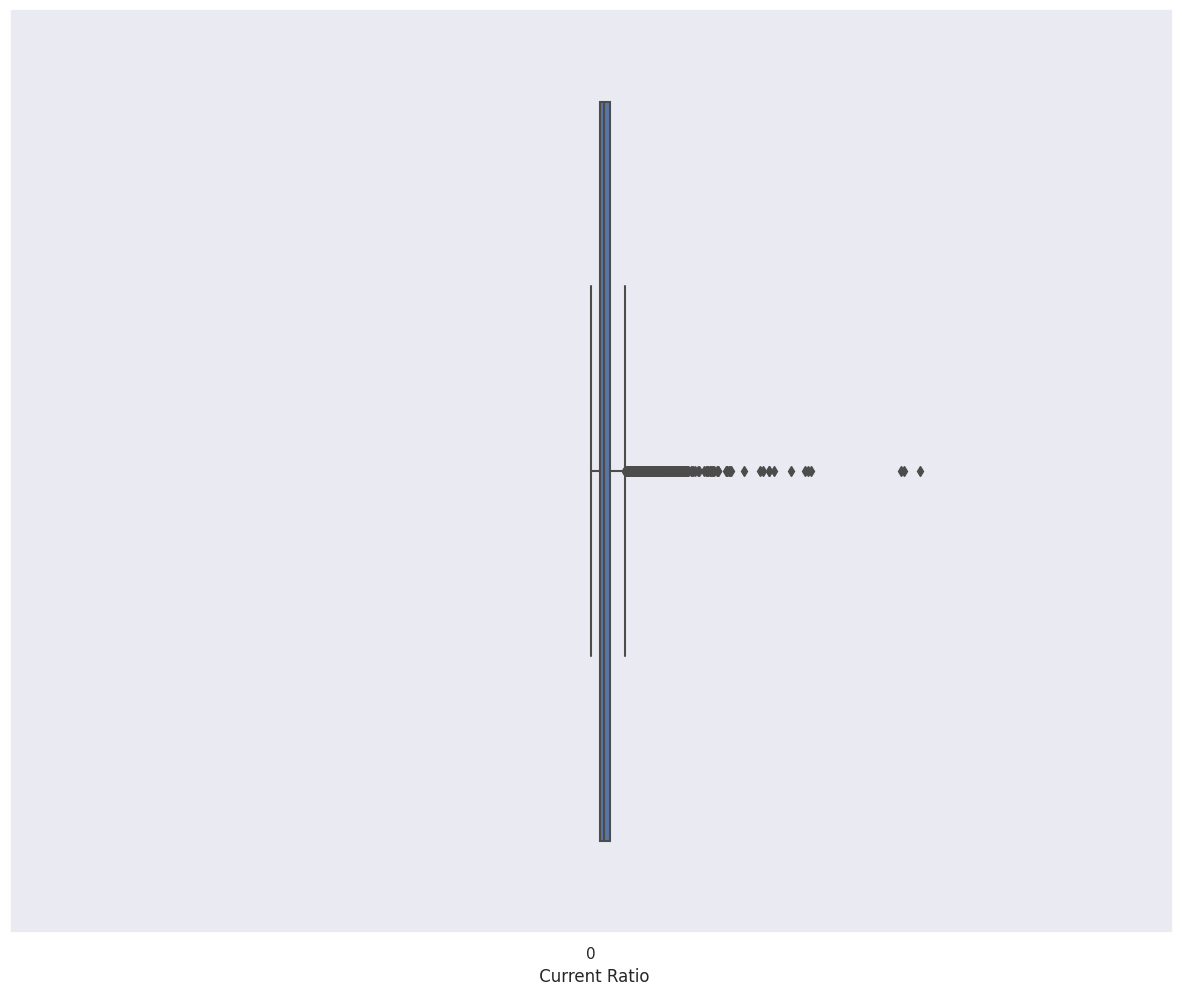

<Figure size 640x480 with 0 Axes>

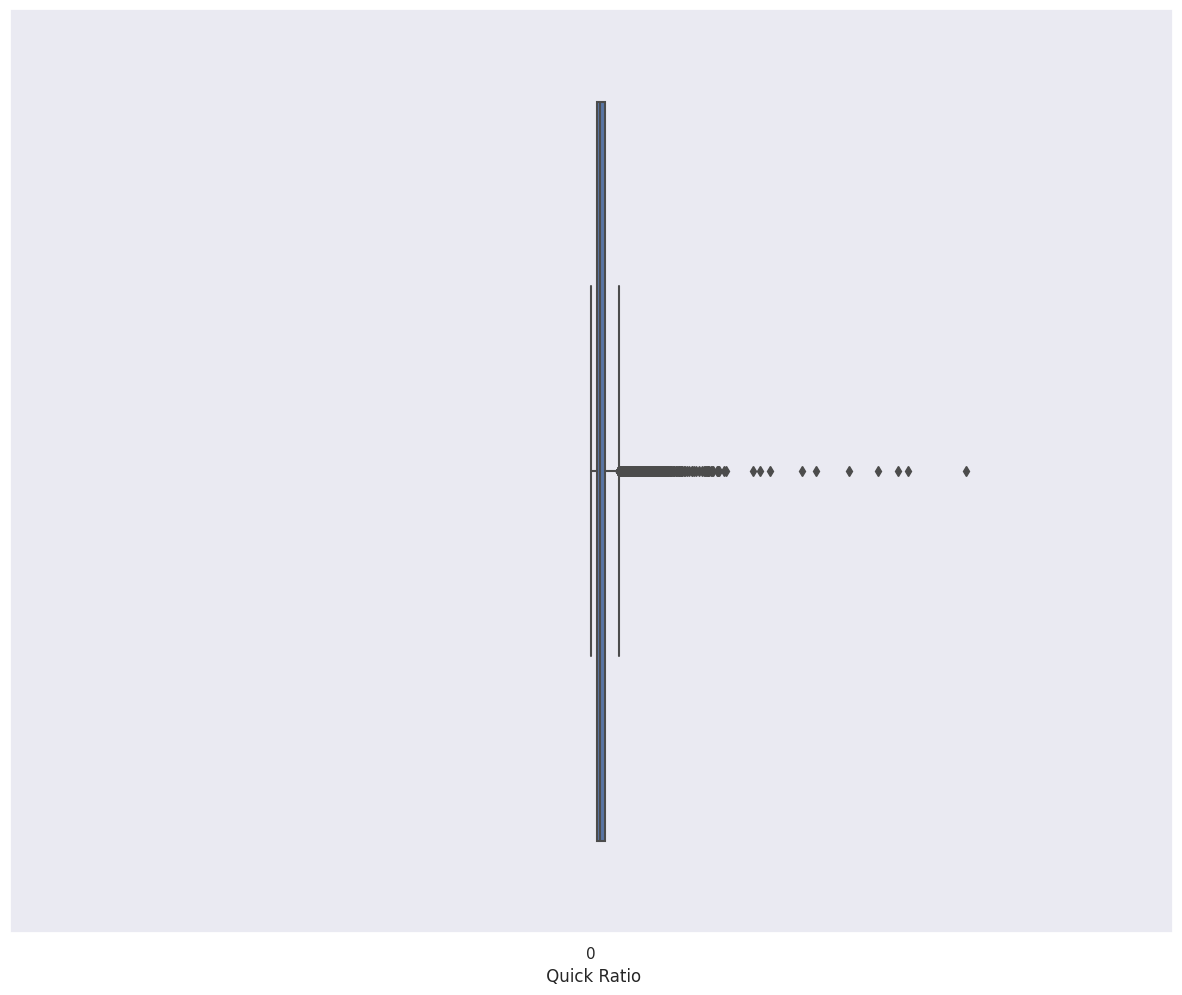

<Figure size 640x480 with 0 Axes>

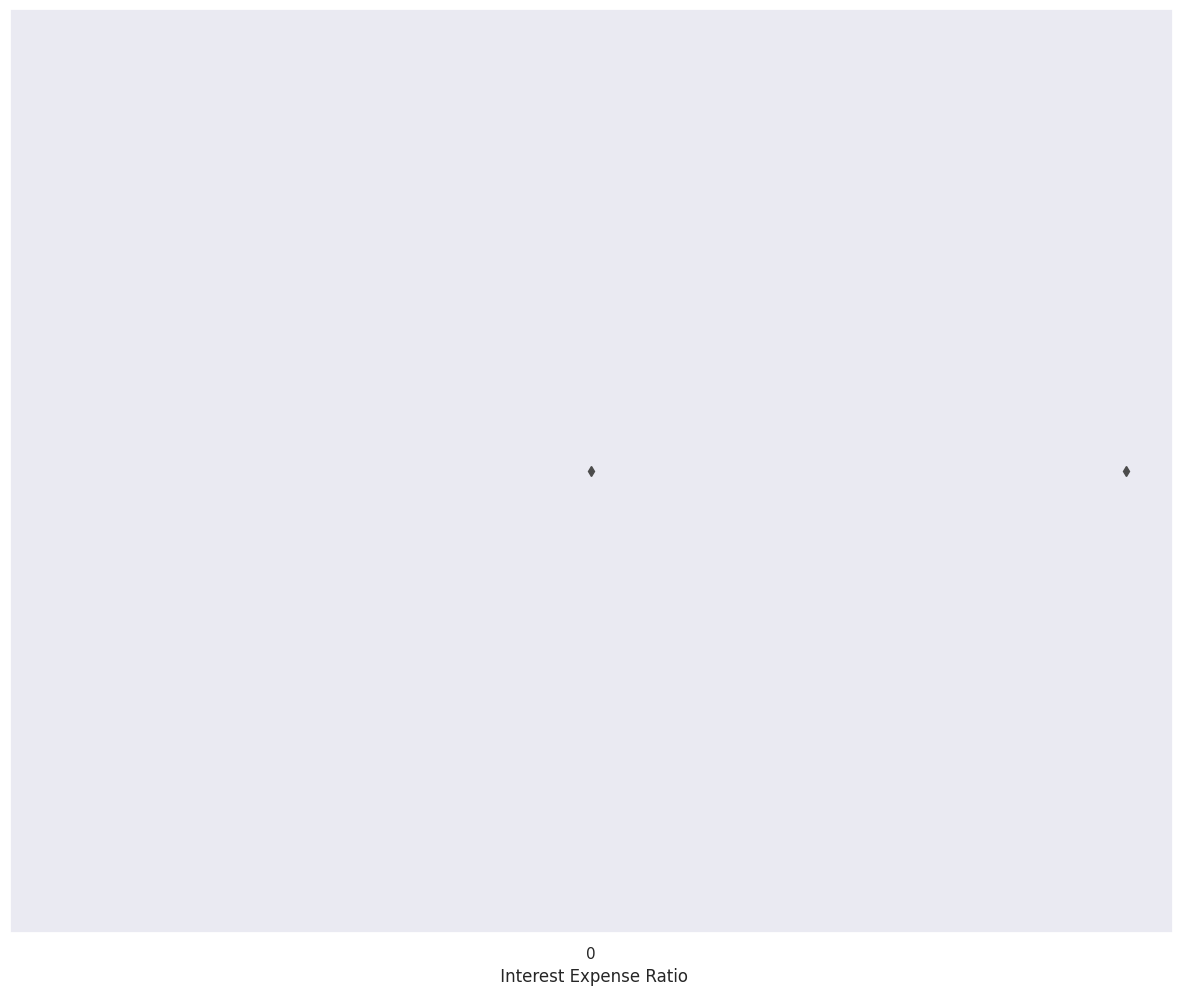

<Figure size 640x480 with 0 Axes>

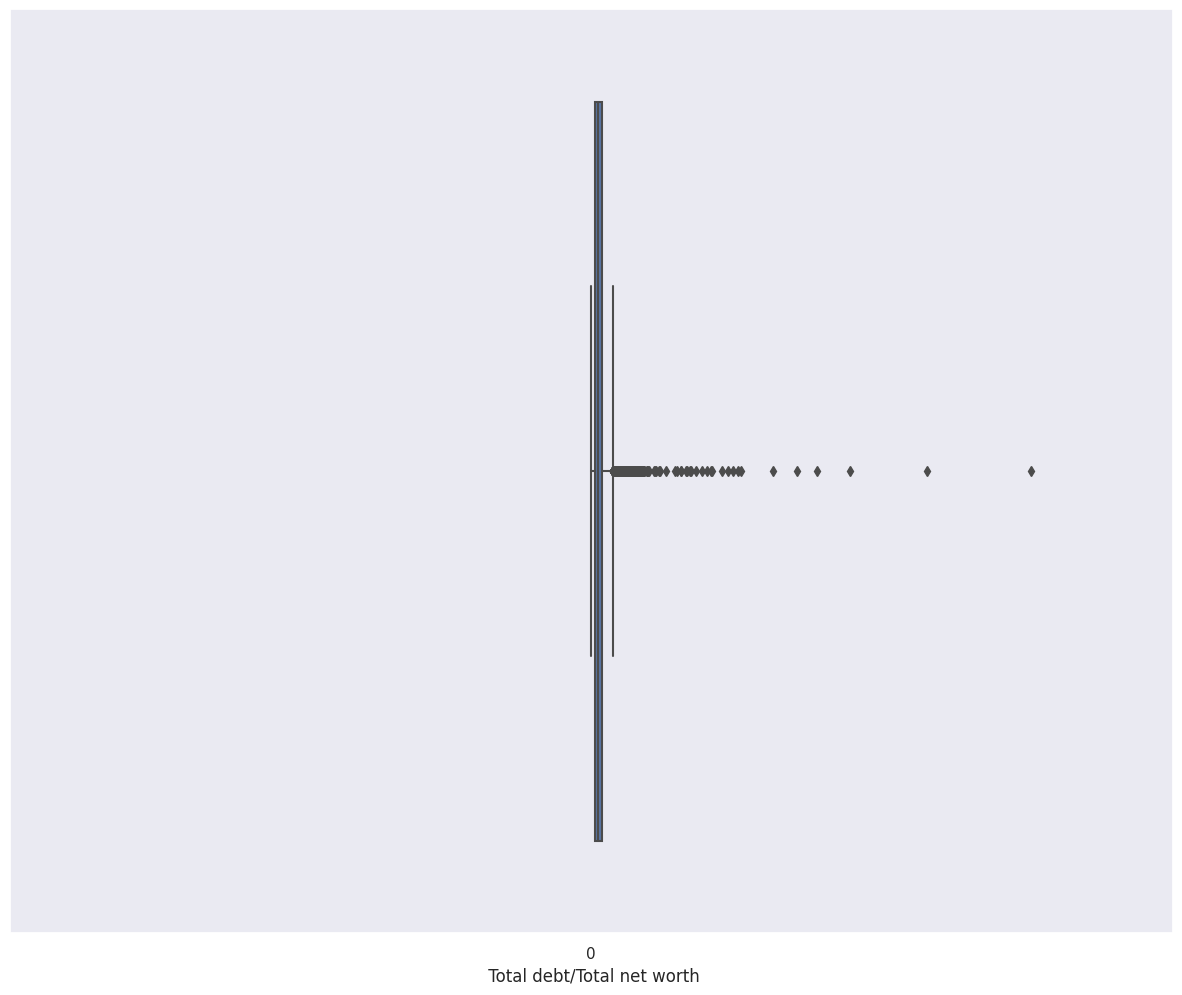

<Figure size 640x480 with 0 Axes>

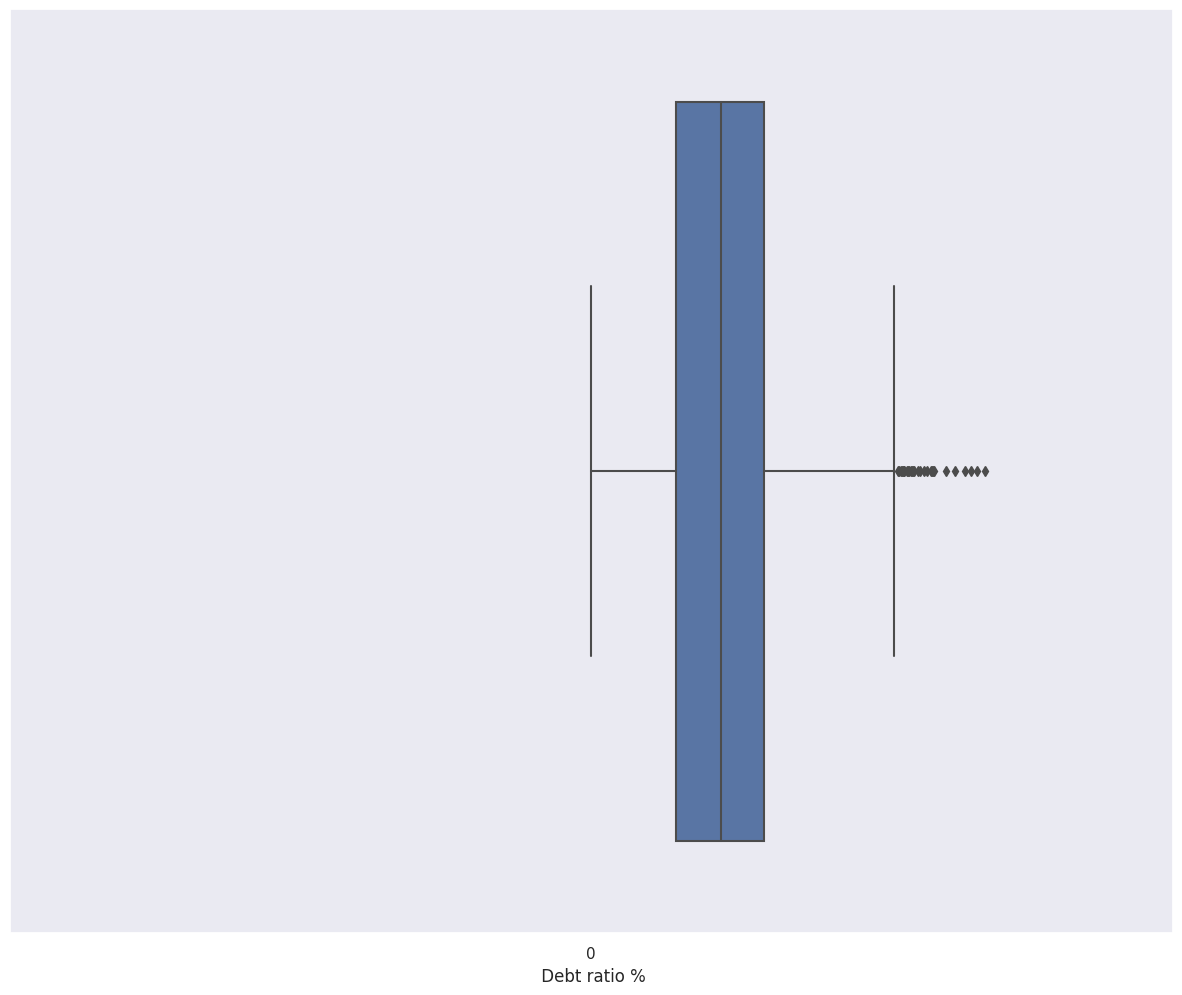

<Figure size 640x480 with 0 Axes>

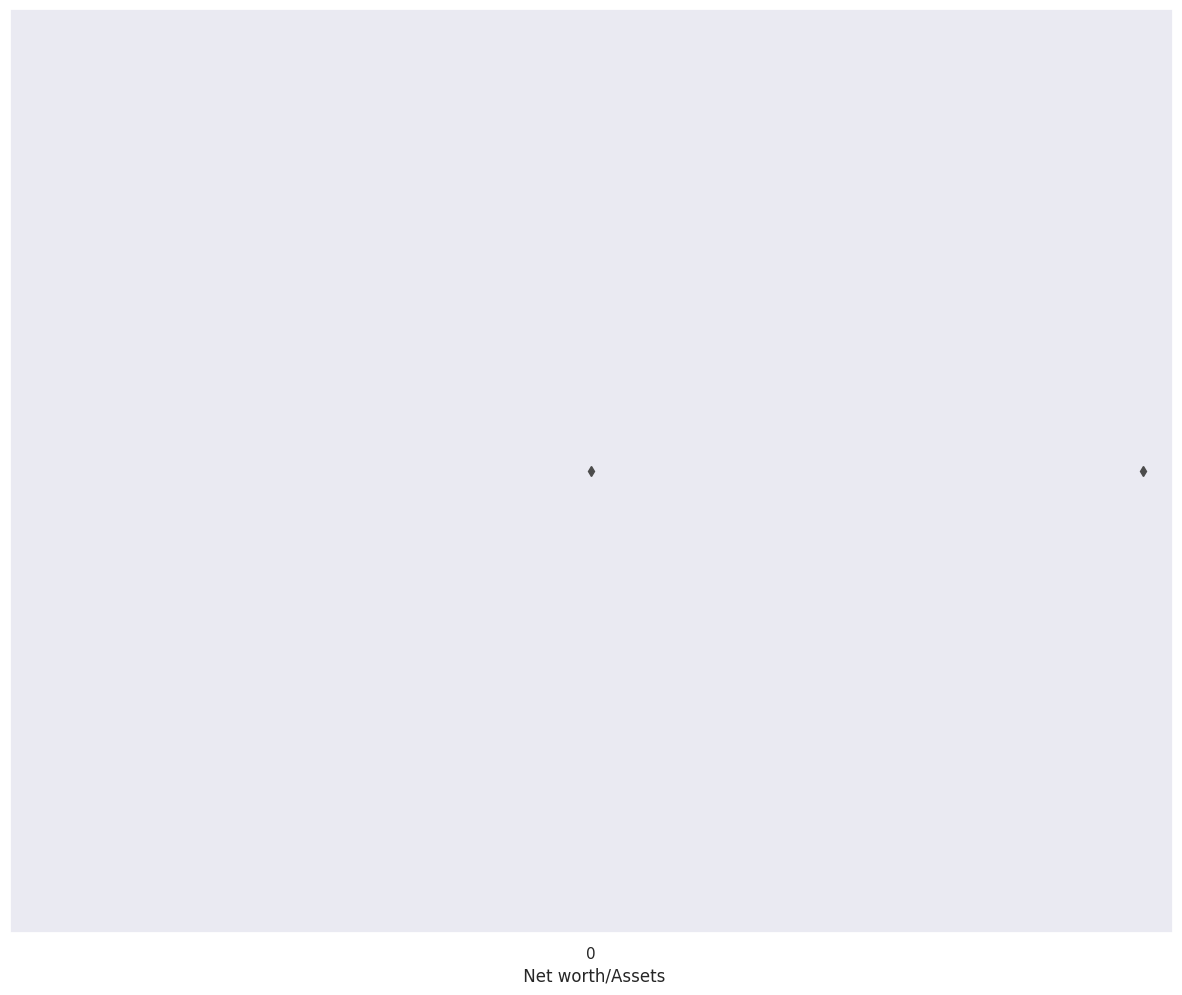

<Figure size 640x480 with 0 Axes>

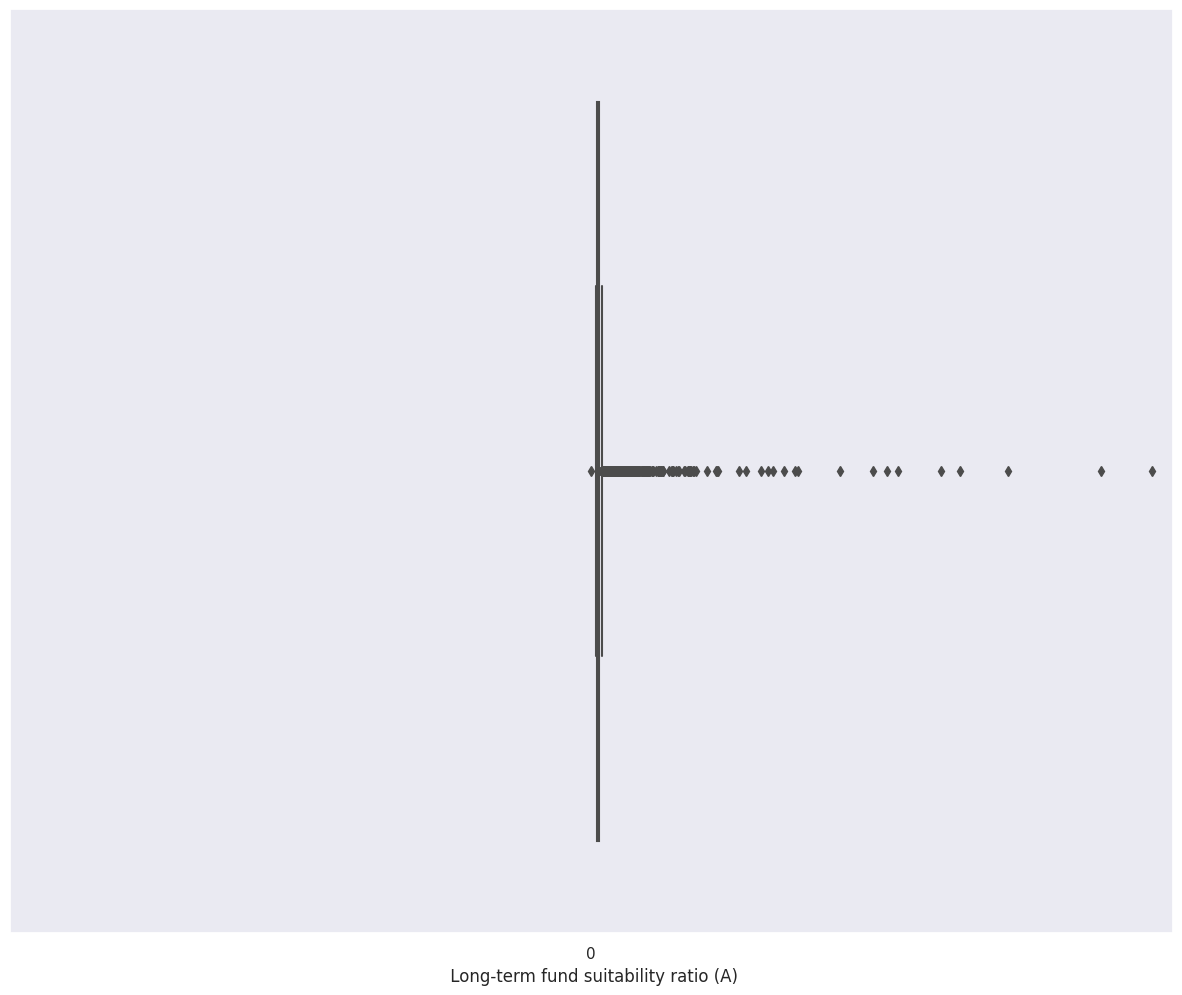

<Figure size 640x480 with 0 Axes>

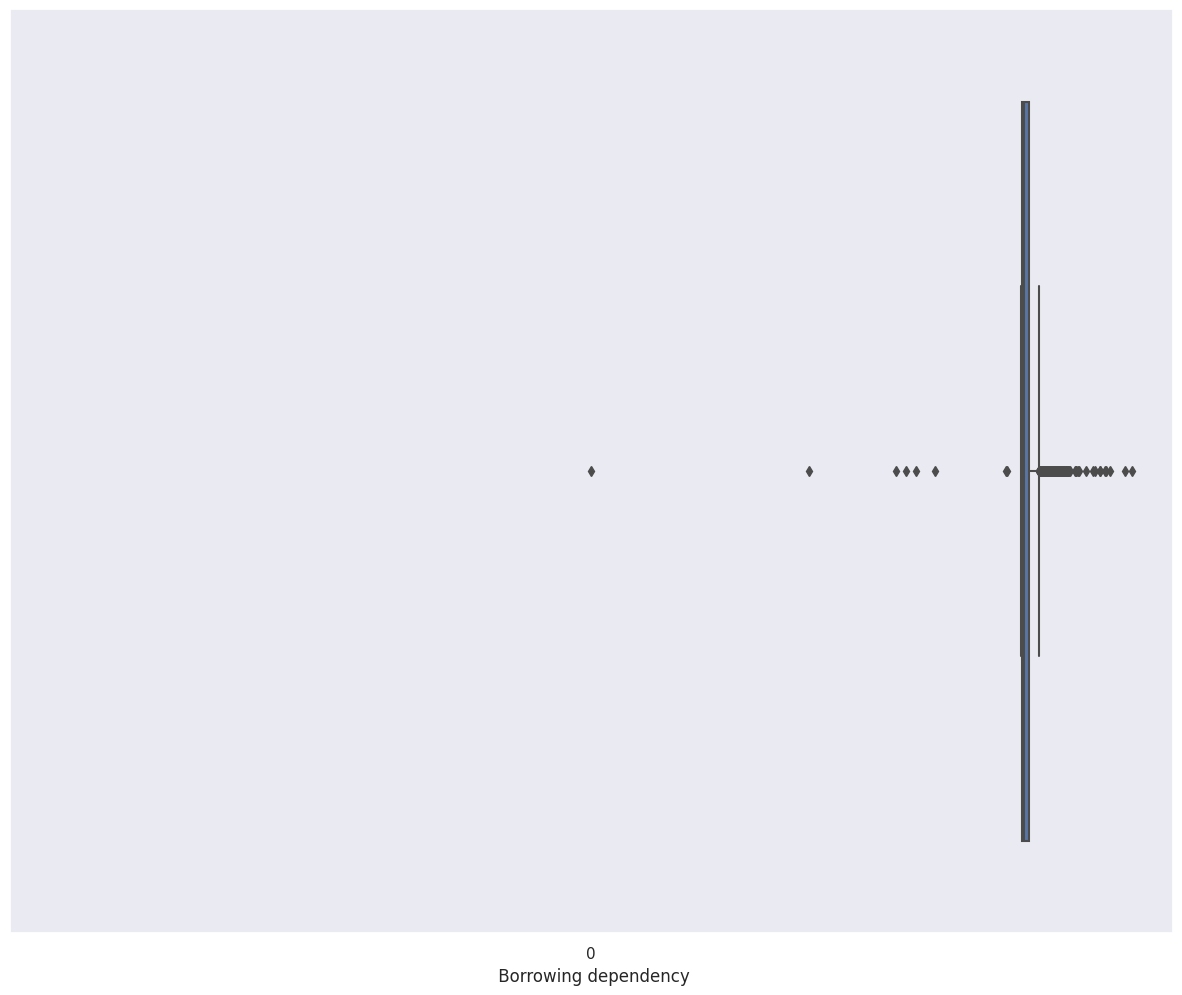

<Figure size 640x480 with 0 Axes>

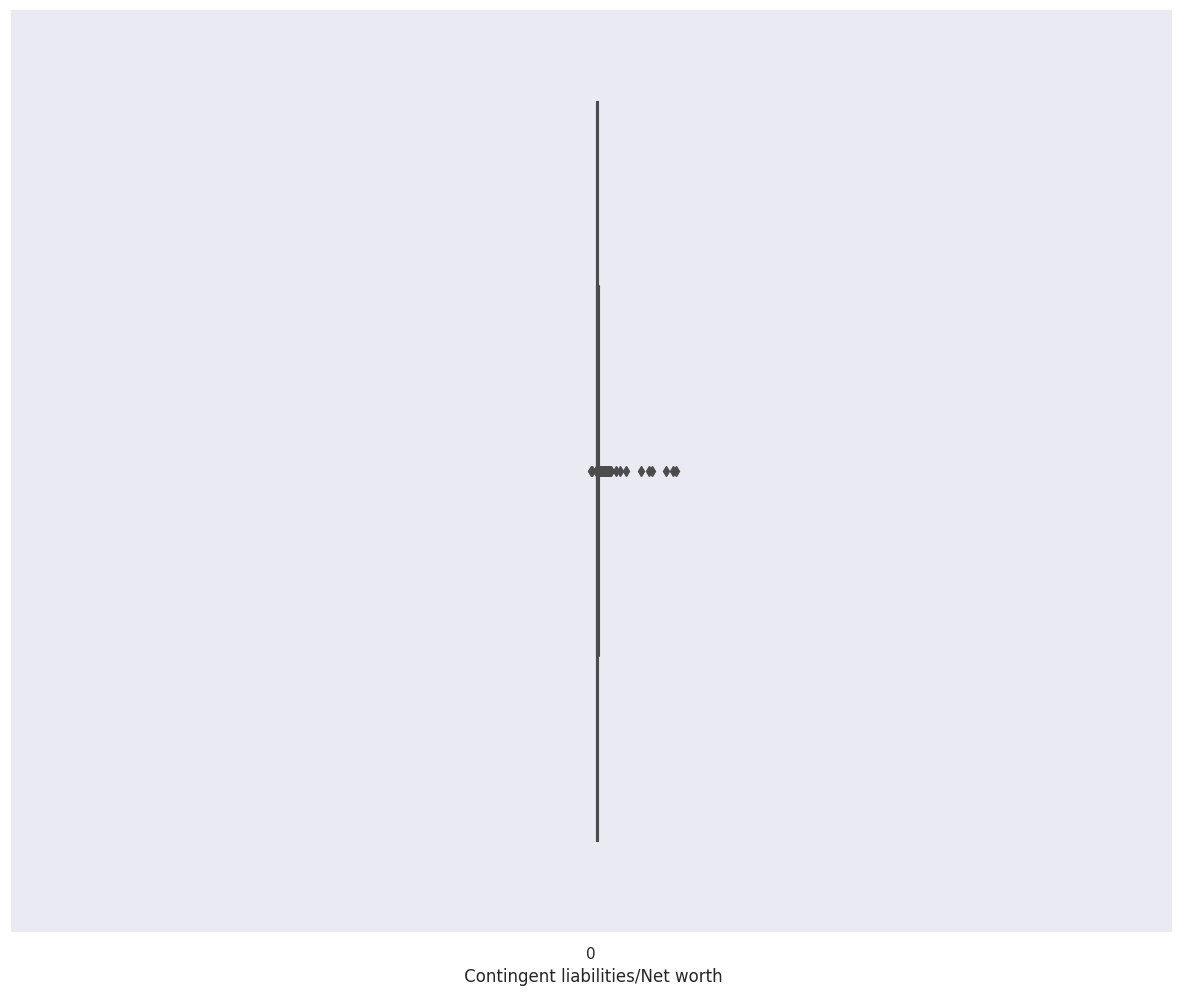

<Figure size 640x480 with 0 Axes>

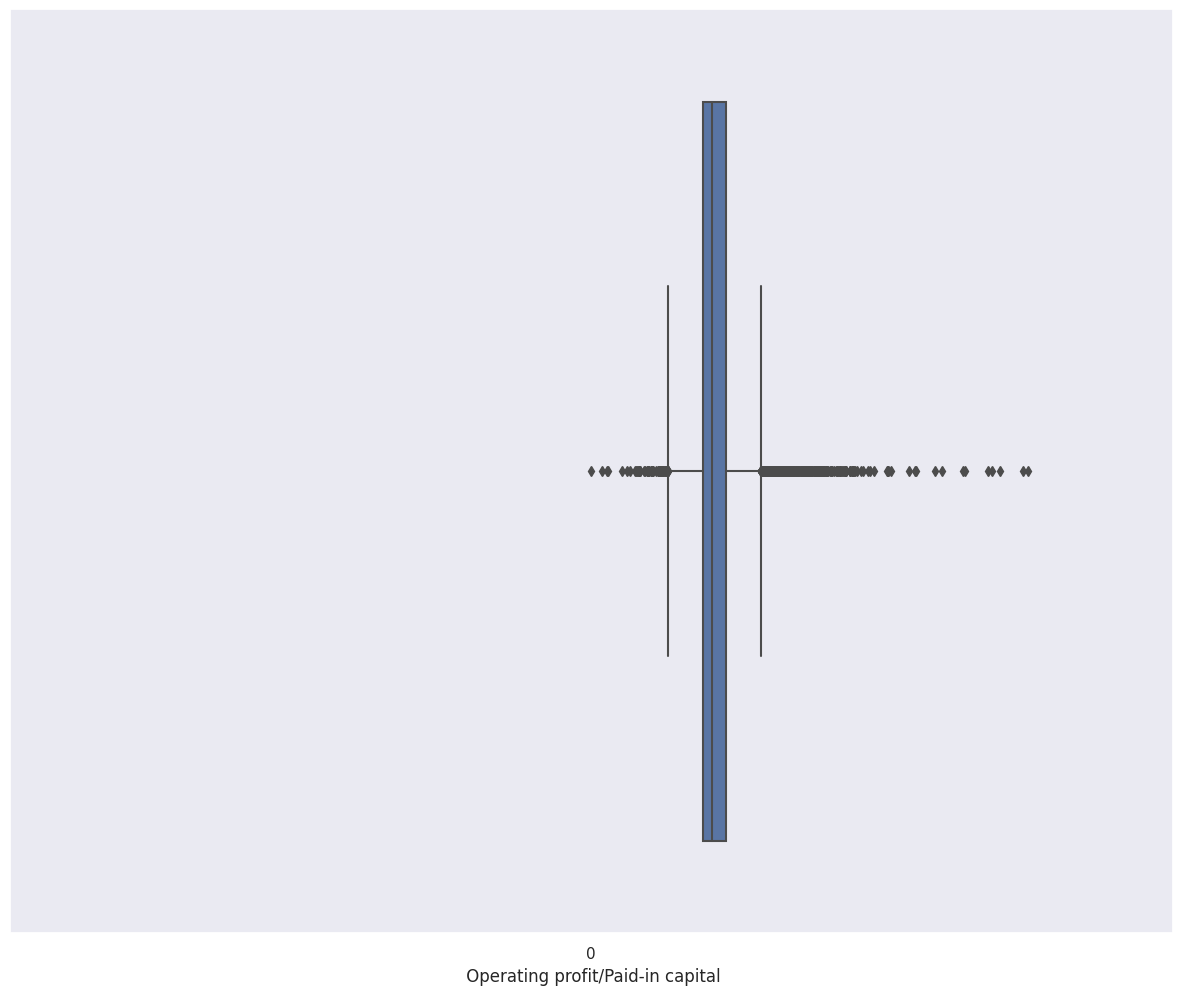

<Figure size 640x480 with 0 Axes>

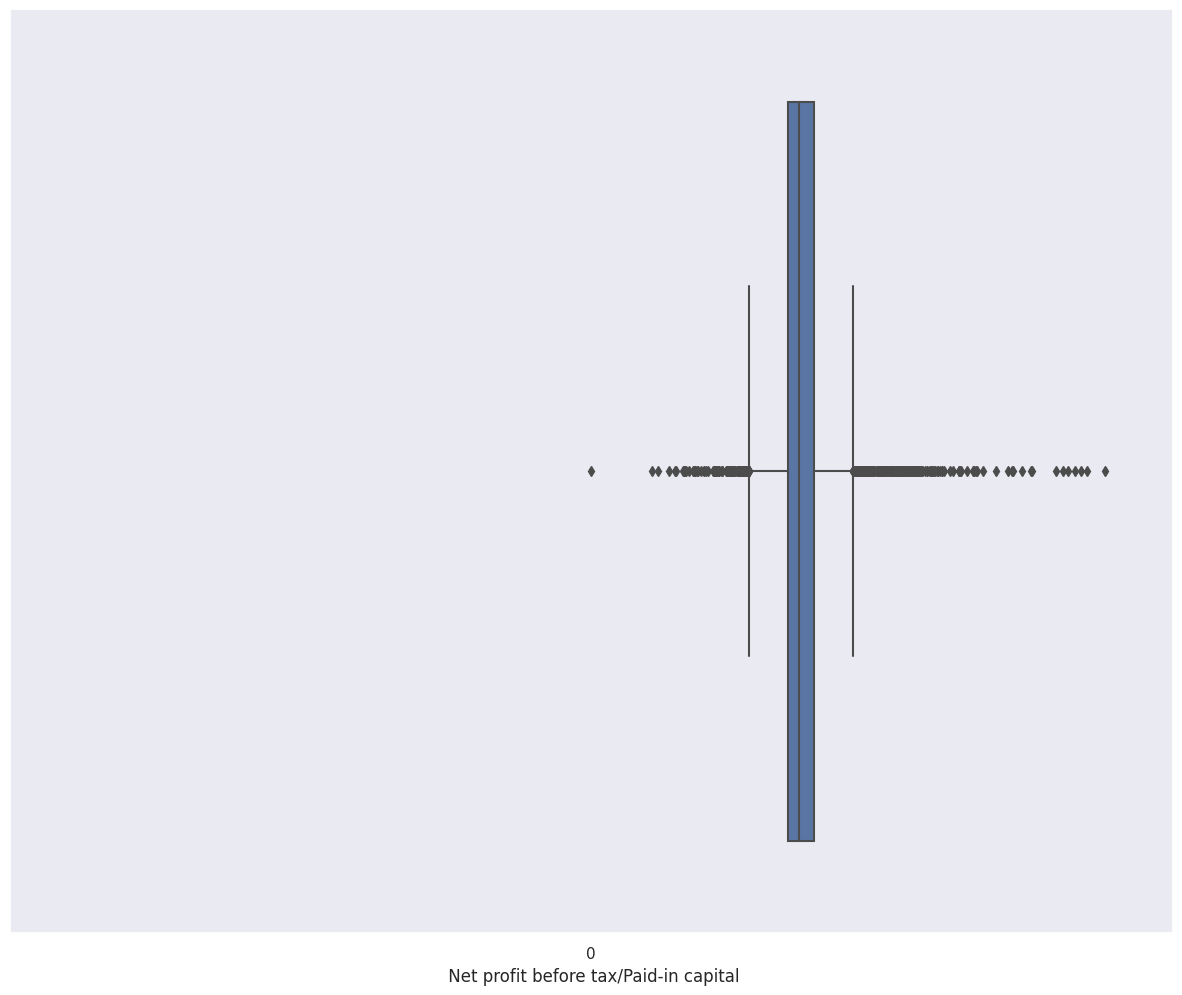

<Figure size 640x480 with 0 Axes>

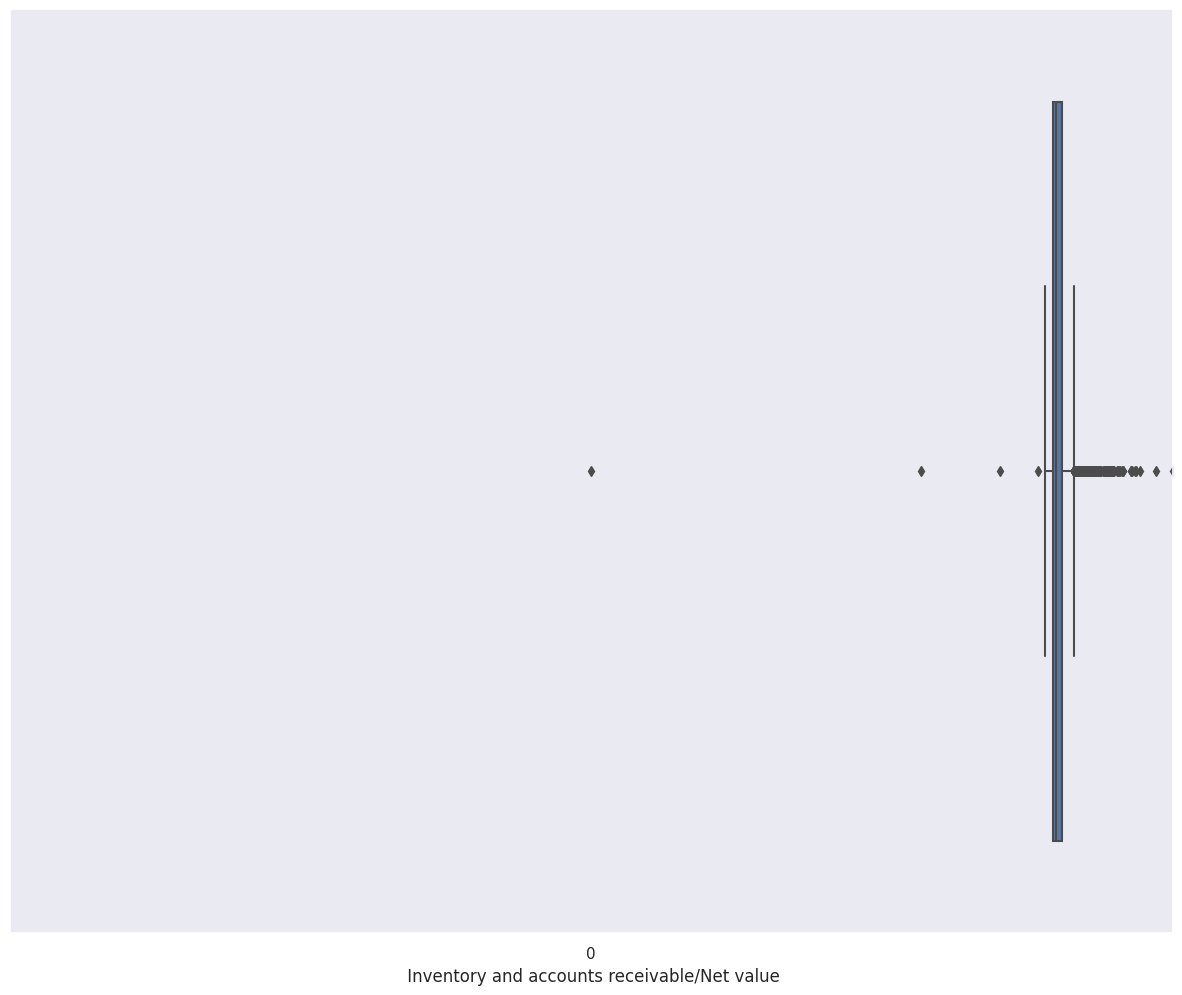

<Figure size 640x480 with 0 Axes>

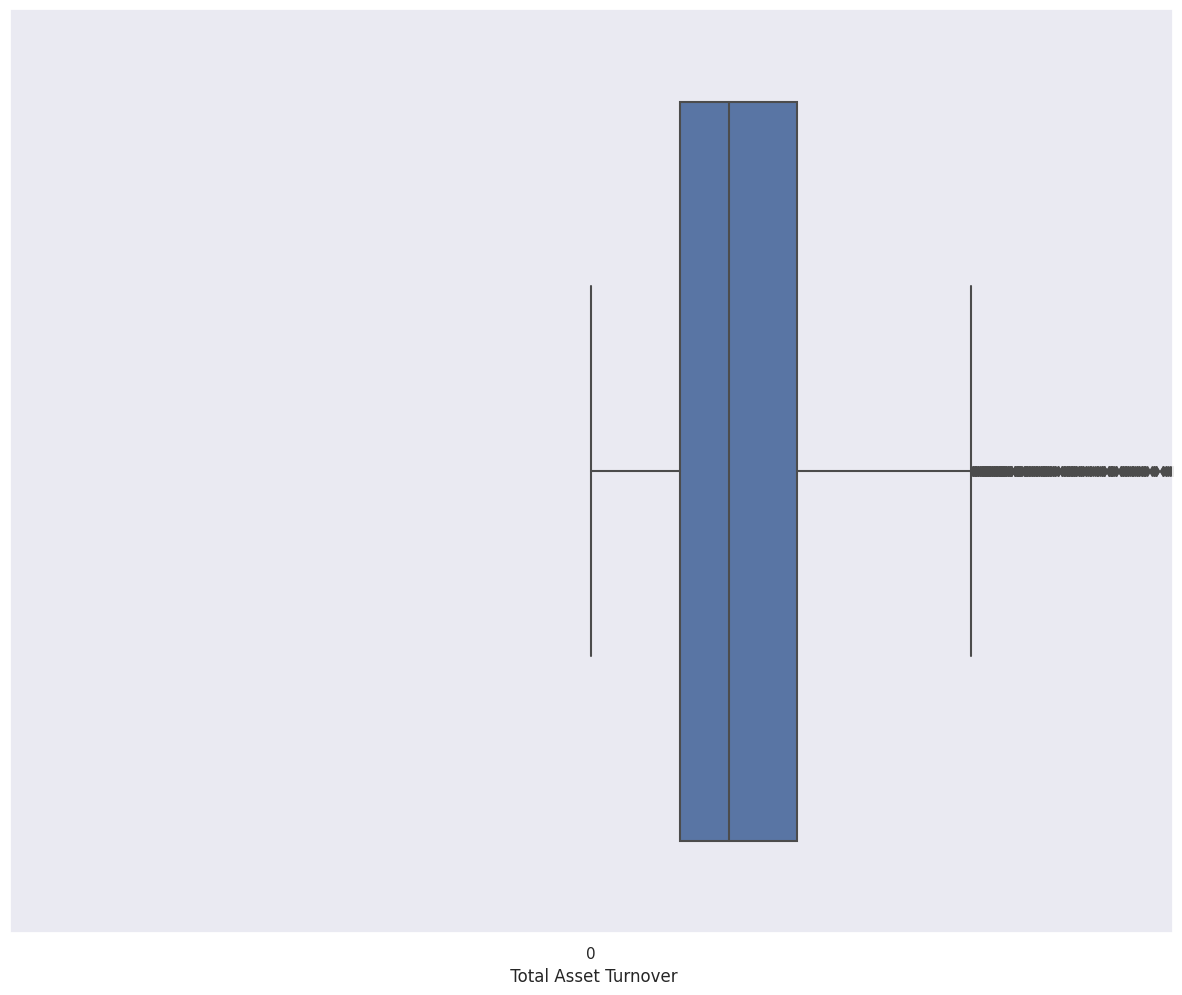

<Figure size 640x480 with 0 Axes>

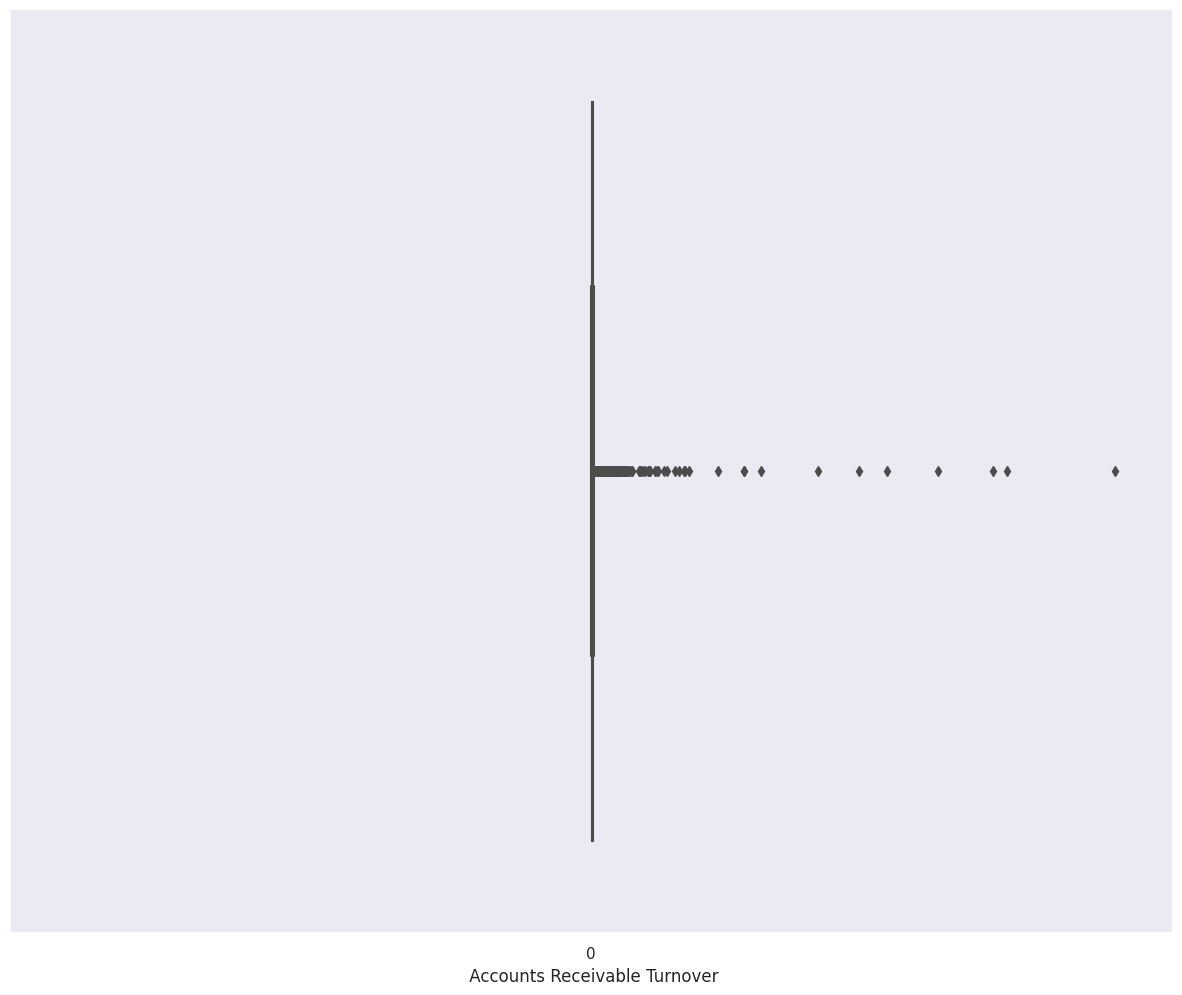

<Figure size 640x480 with 0 Axes>

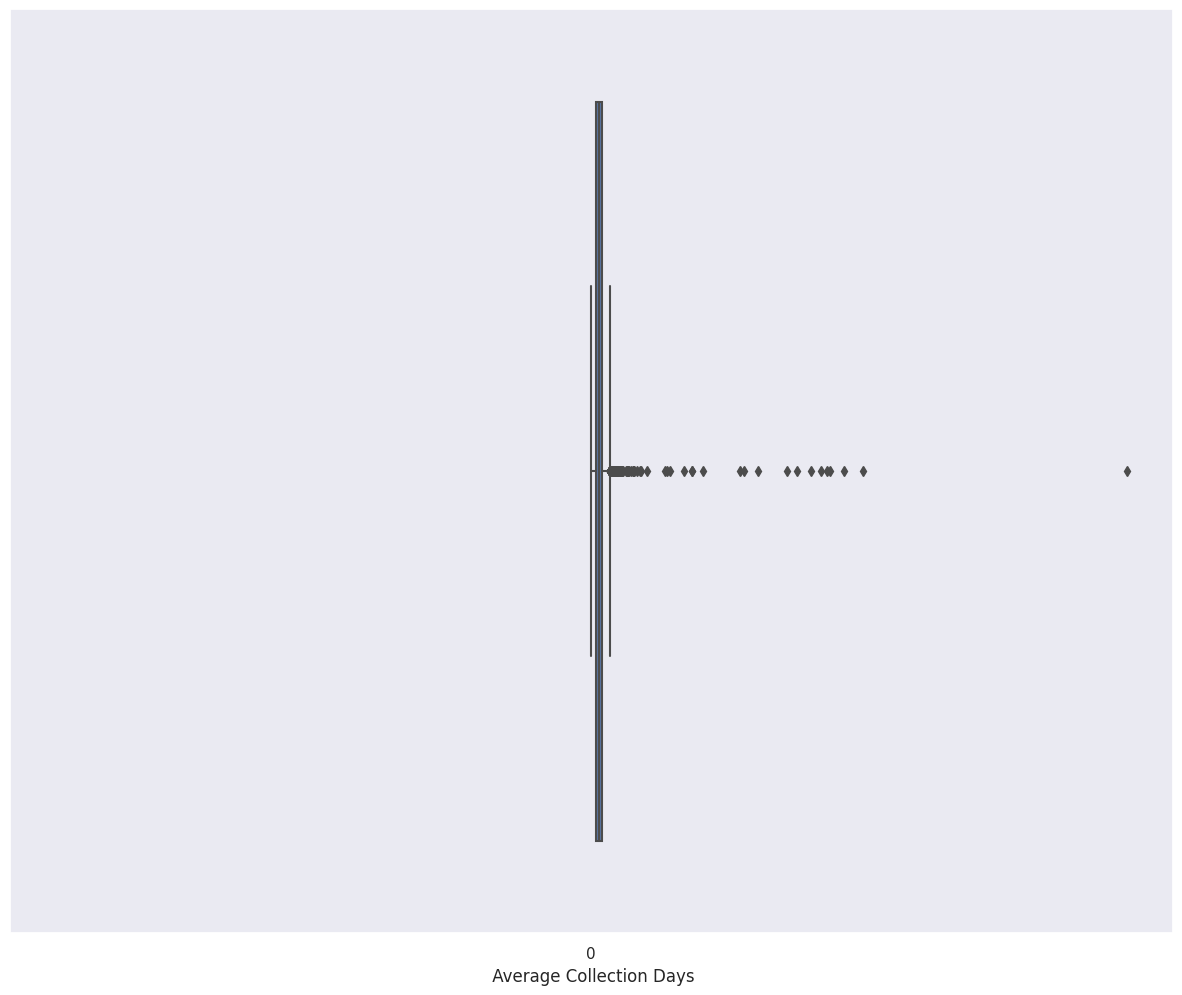

<Figure size 640x480 with 0 Axes>

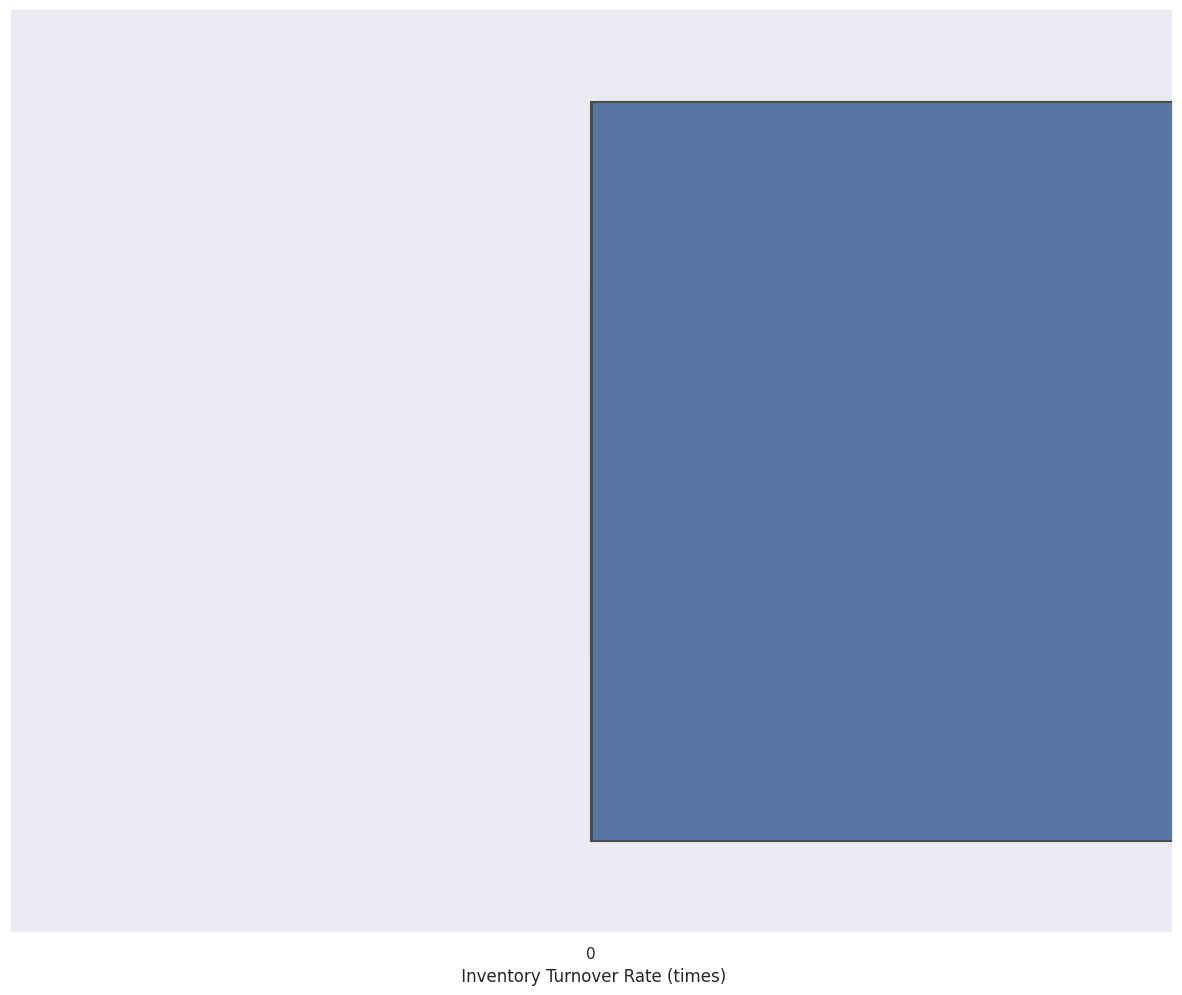

<Figure size 640x480 with 0 Axes>

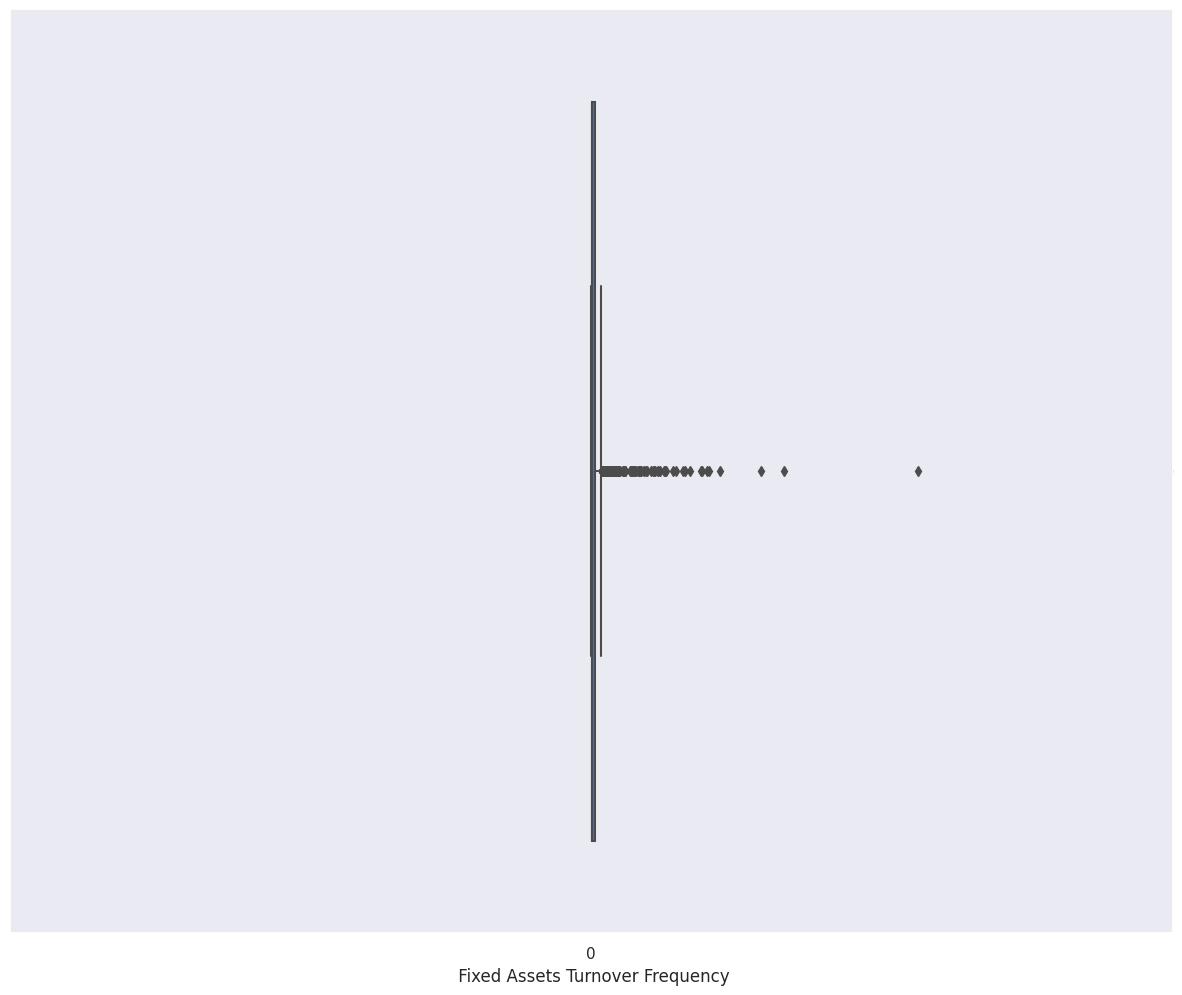

<Figure size 640x480 with 0 Axes>

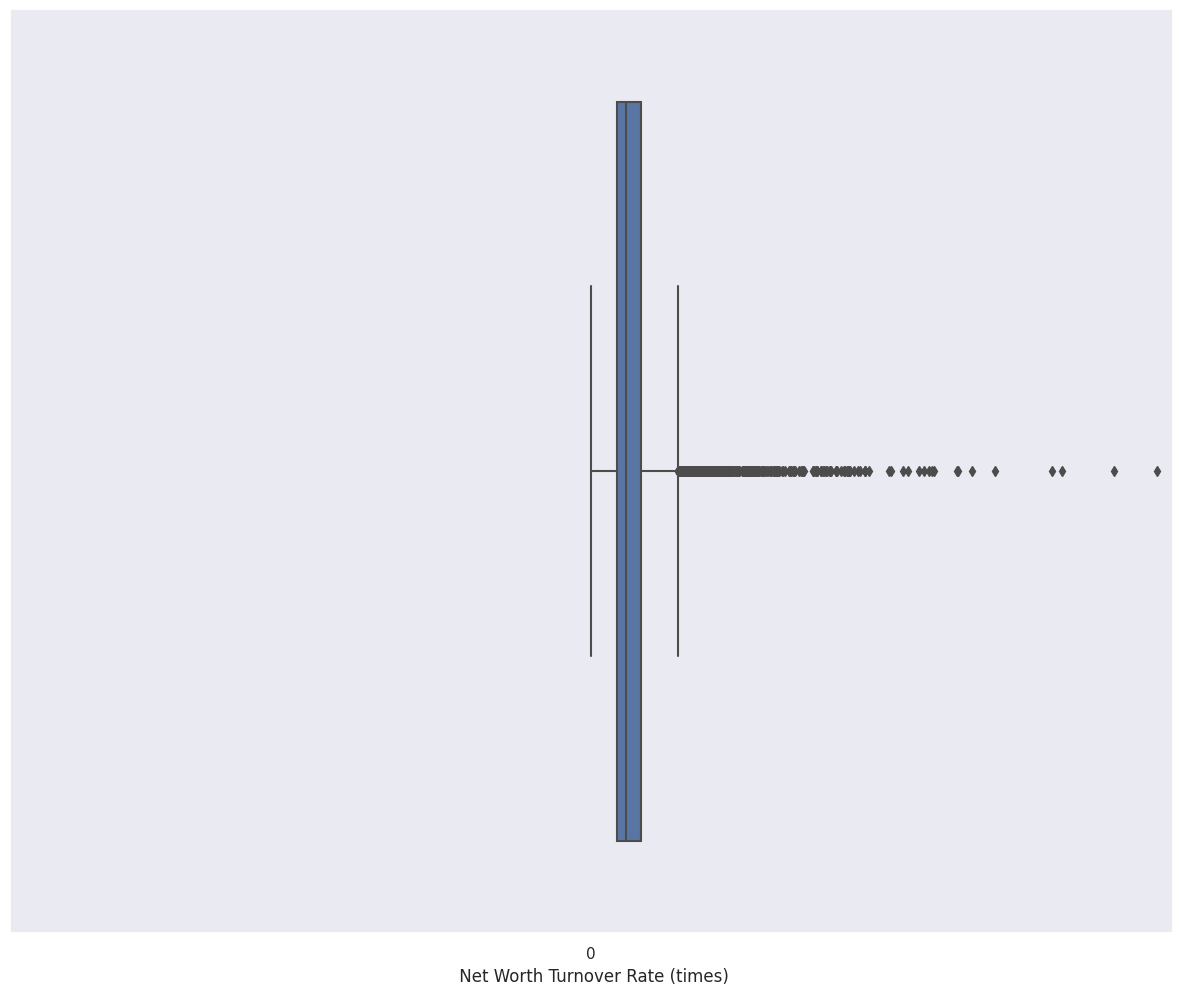

<Figure size 640x480 with 0 Axes>

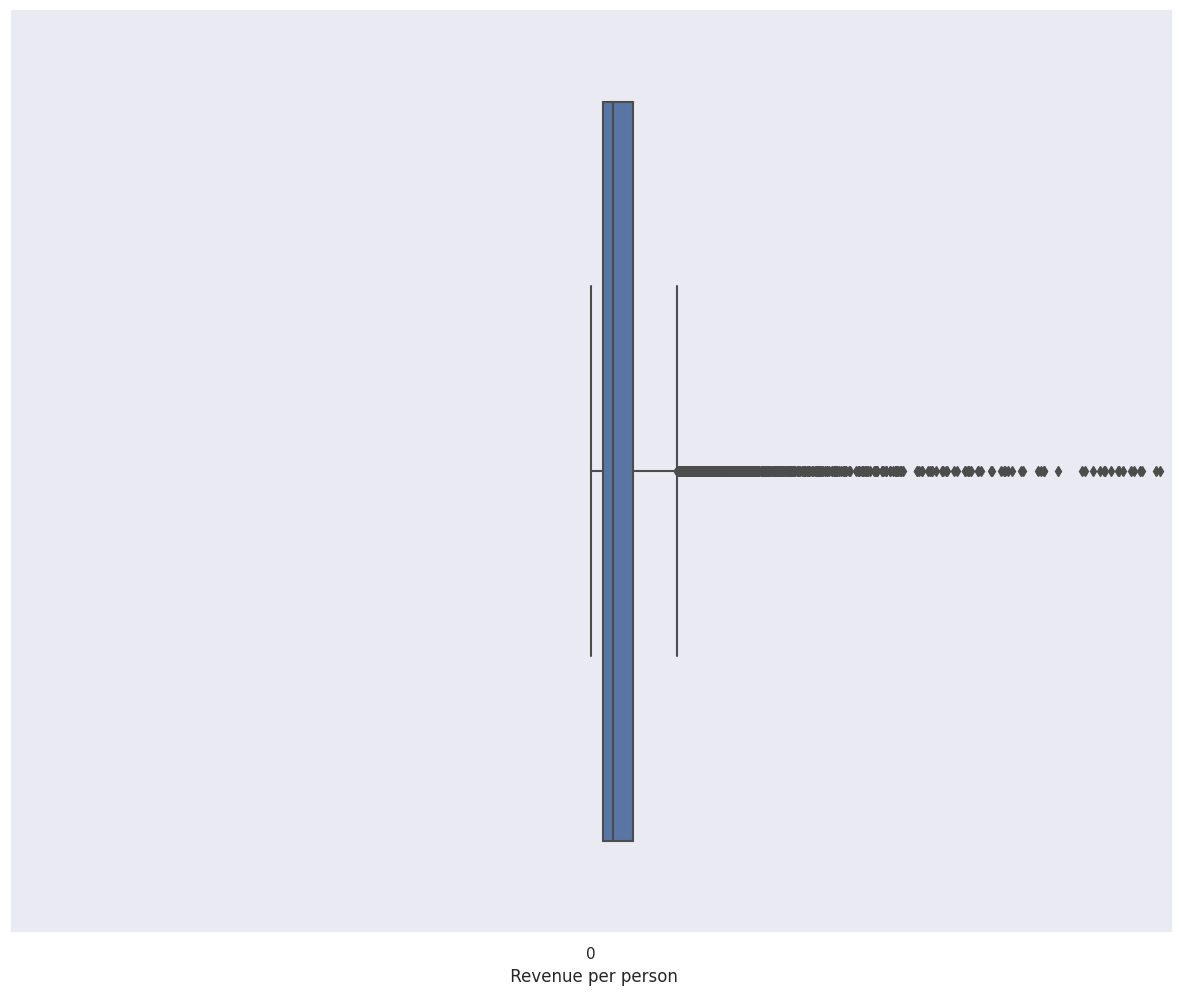

<Figure size 640x480 with 0 Axes>

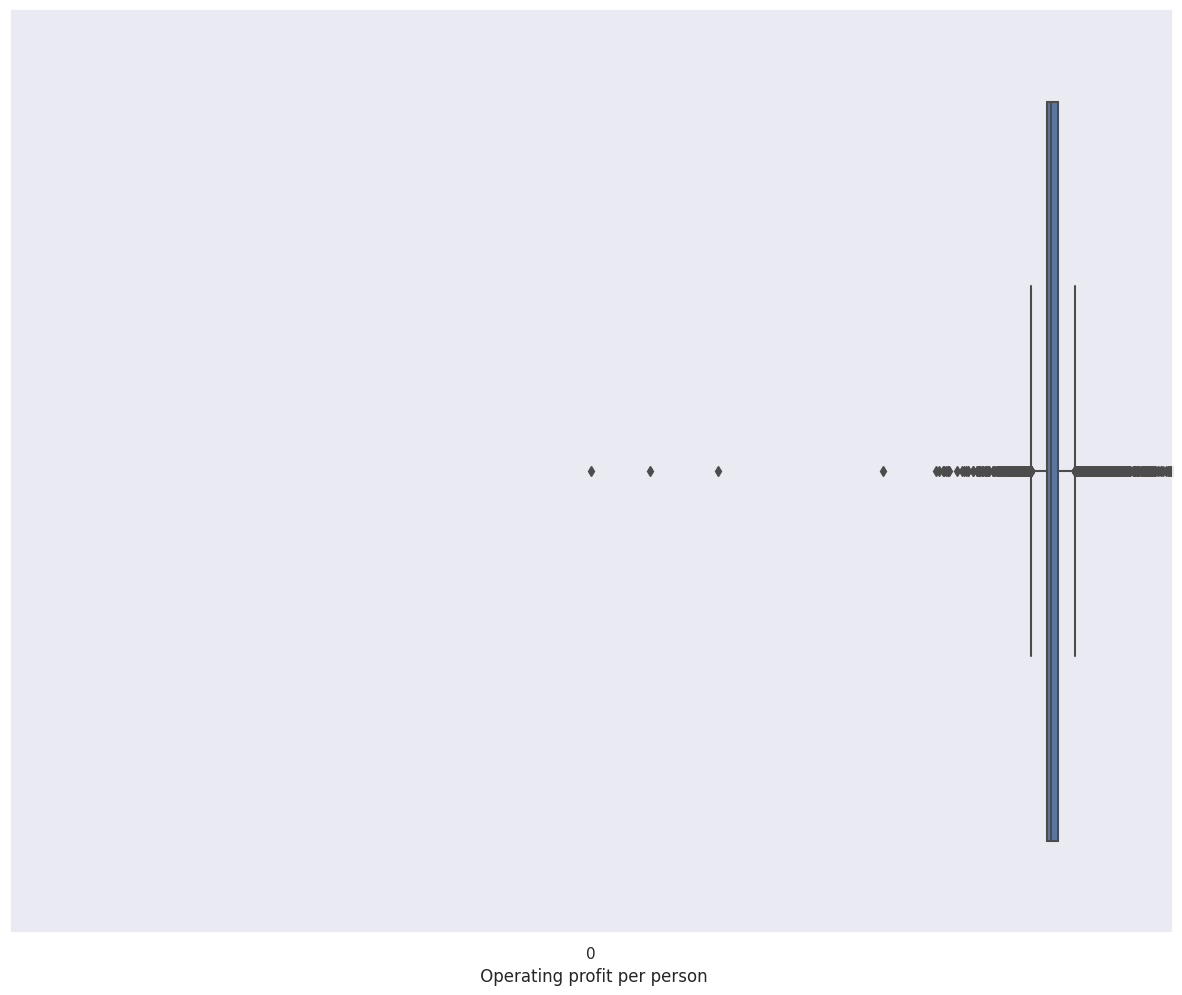

<Figure size 640x480 with 0 Axes>

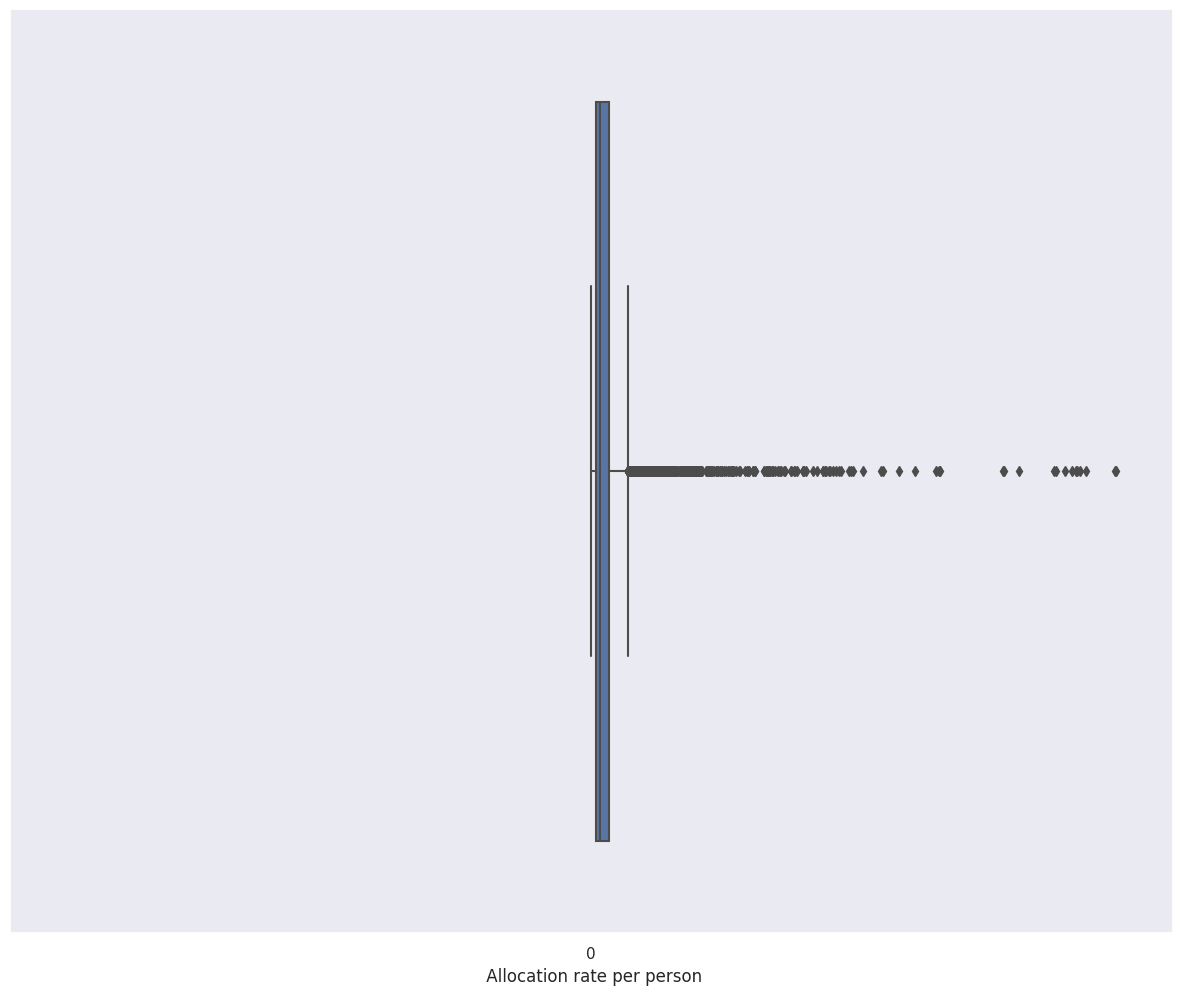

<Figure size 640x480 with 0 Axes>

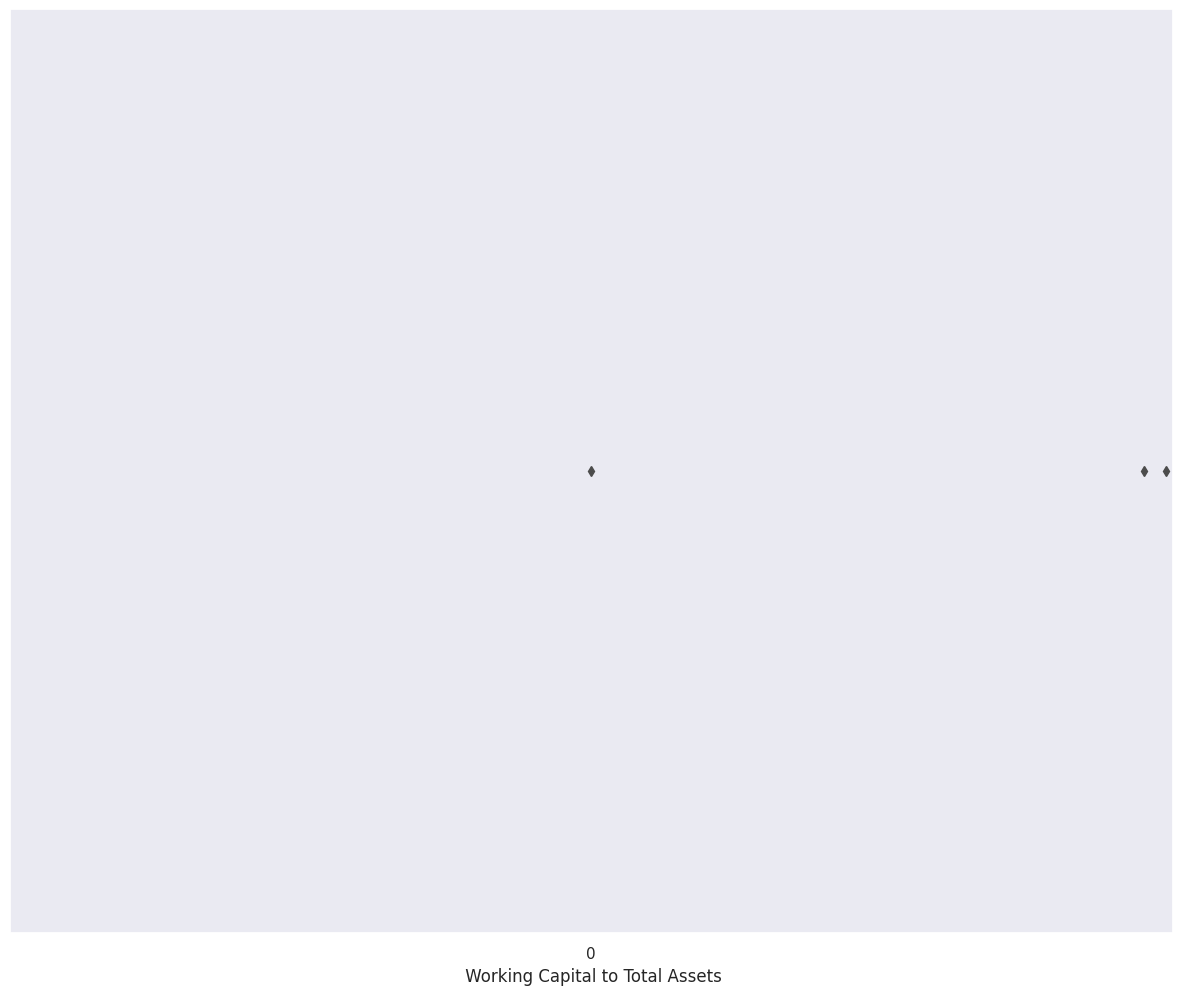

<Figure size 640x480 with 0 Axes>

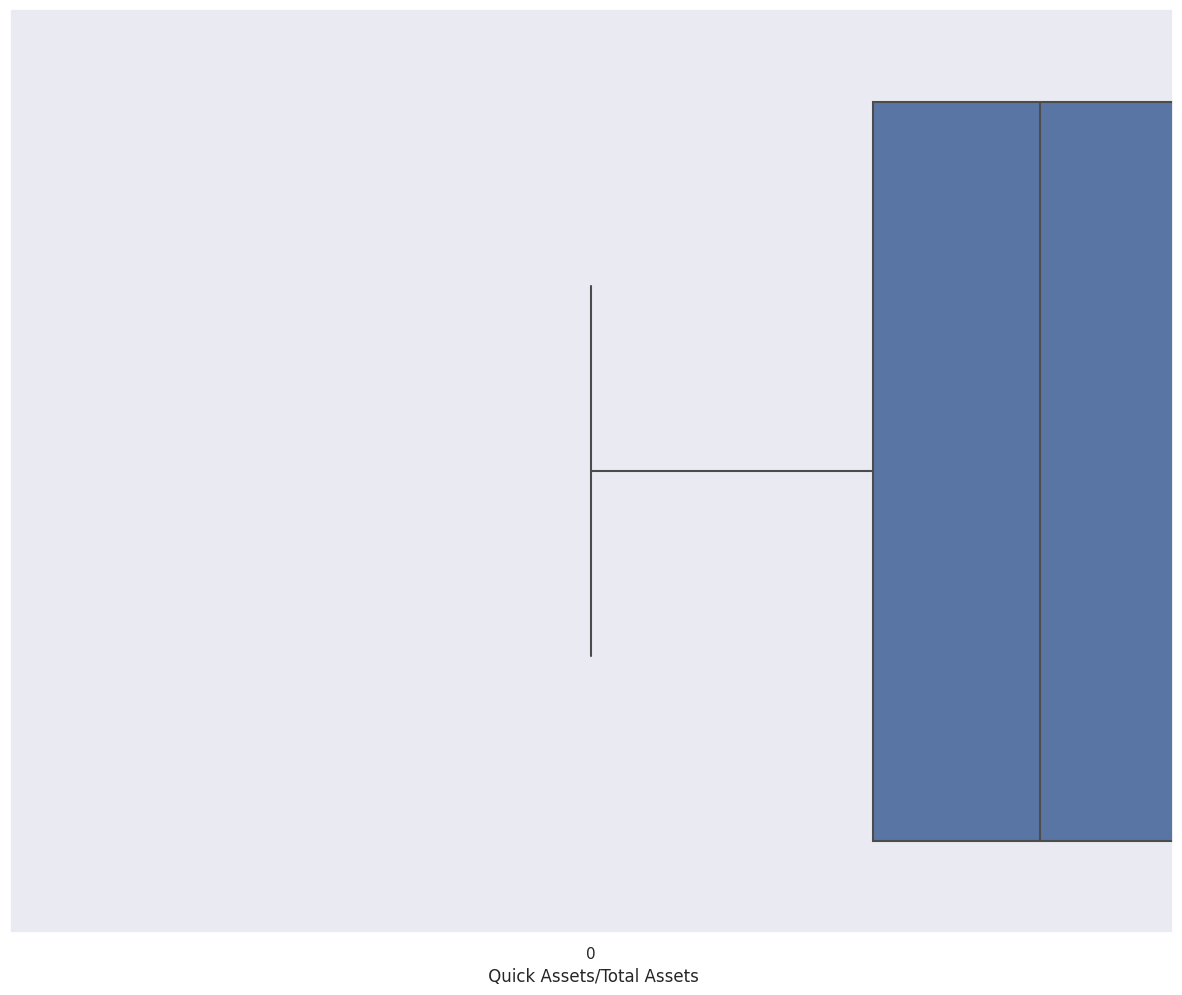

<Figure size 640x480 with 0 Axes>

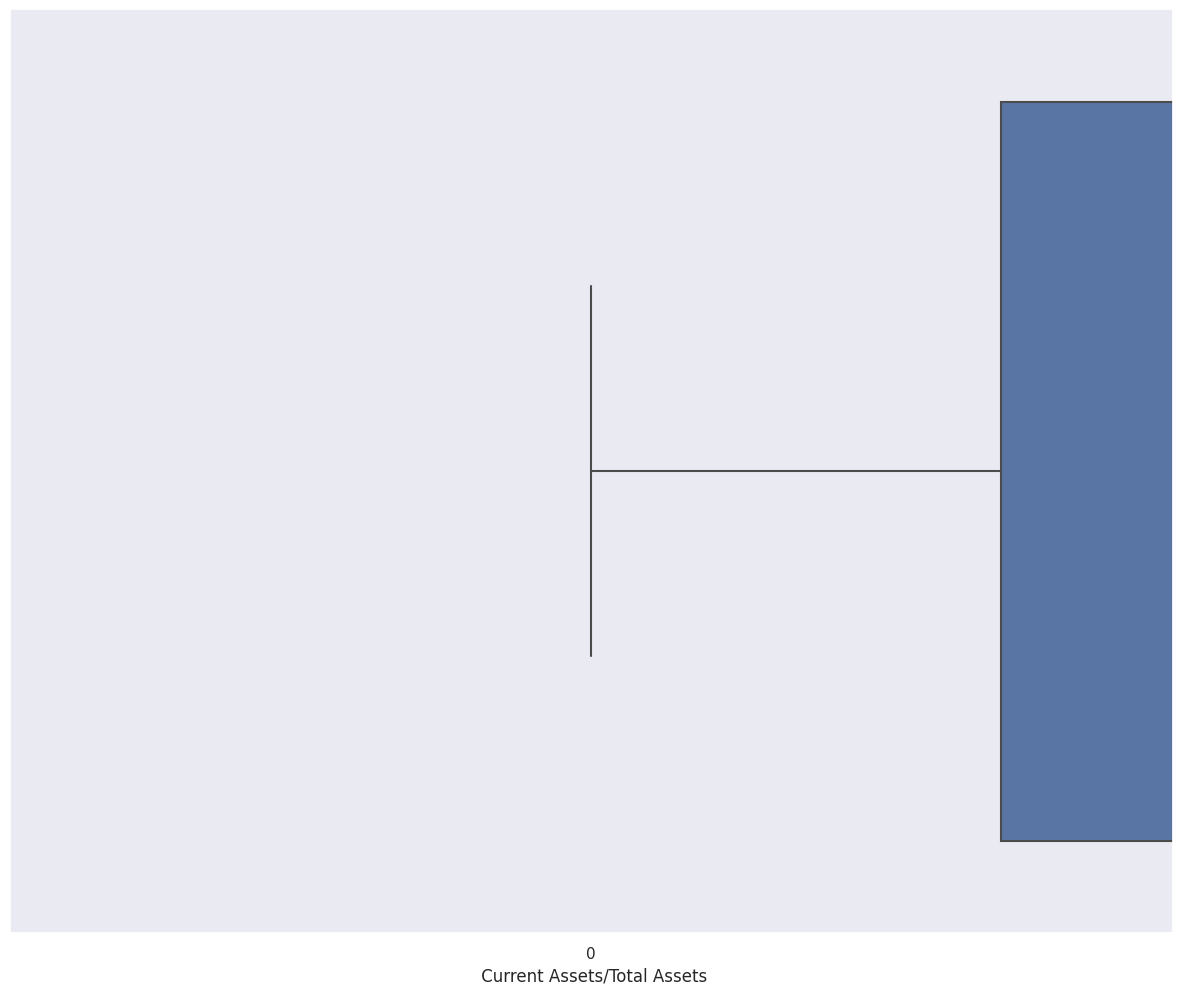

<Figure size 640x480 with 0 Axes>

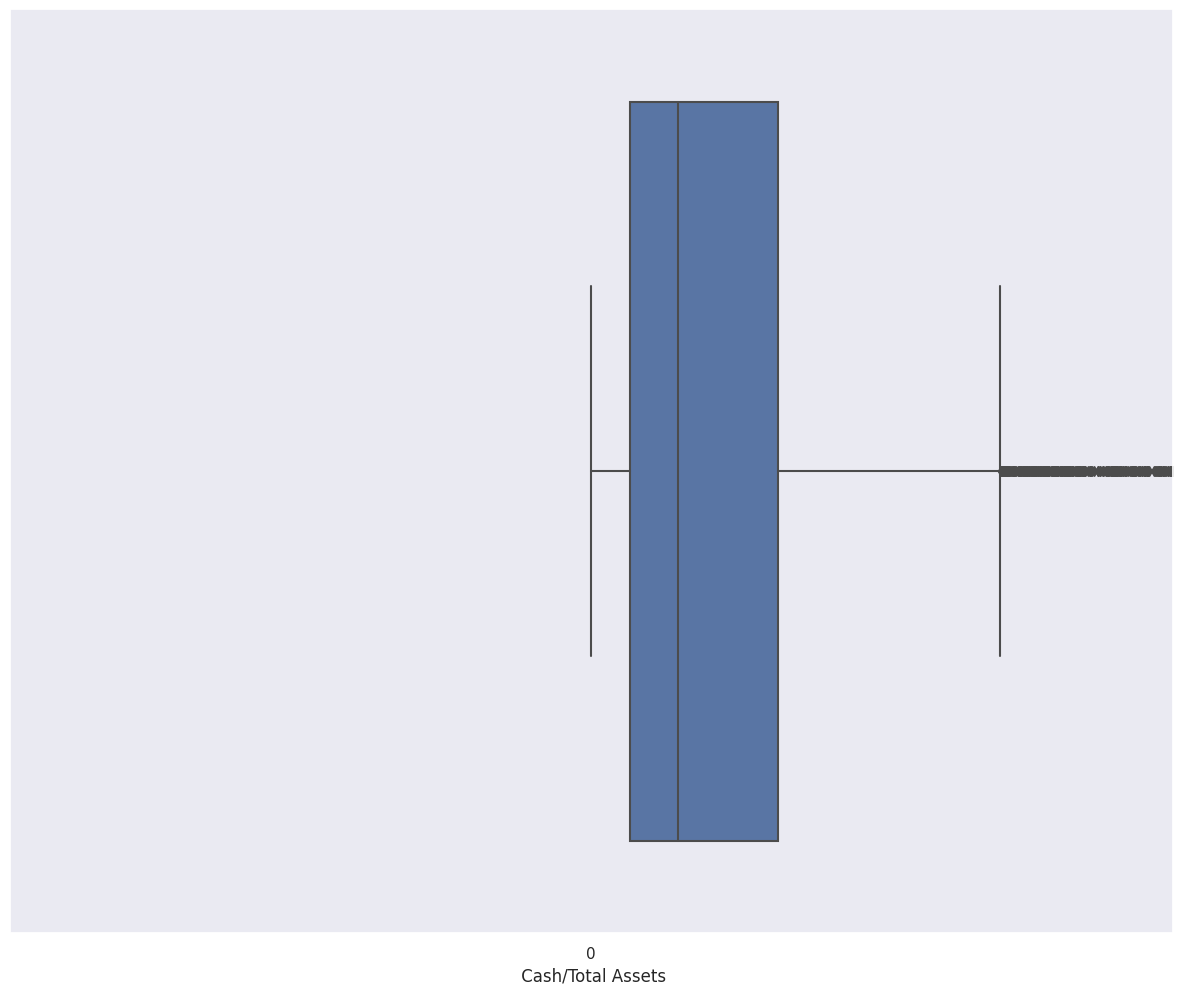

<Figure size 640x480 with 0 Axes>

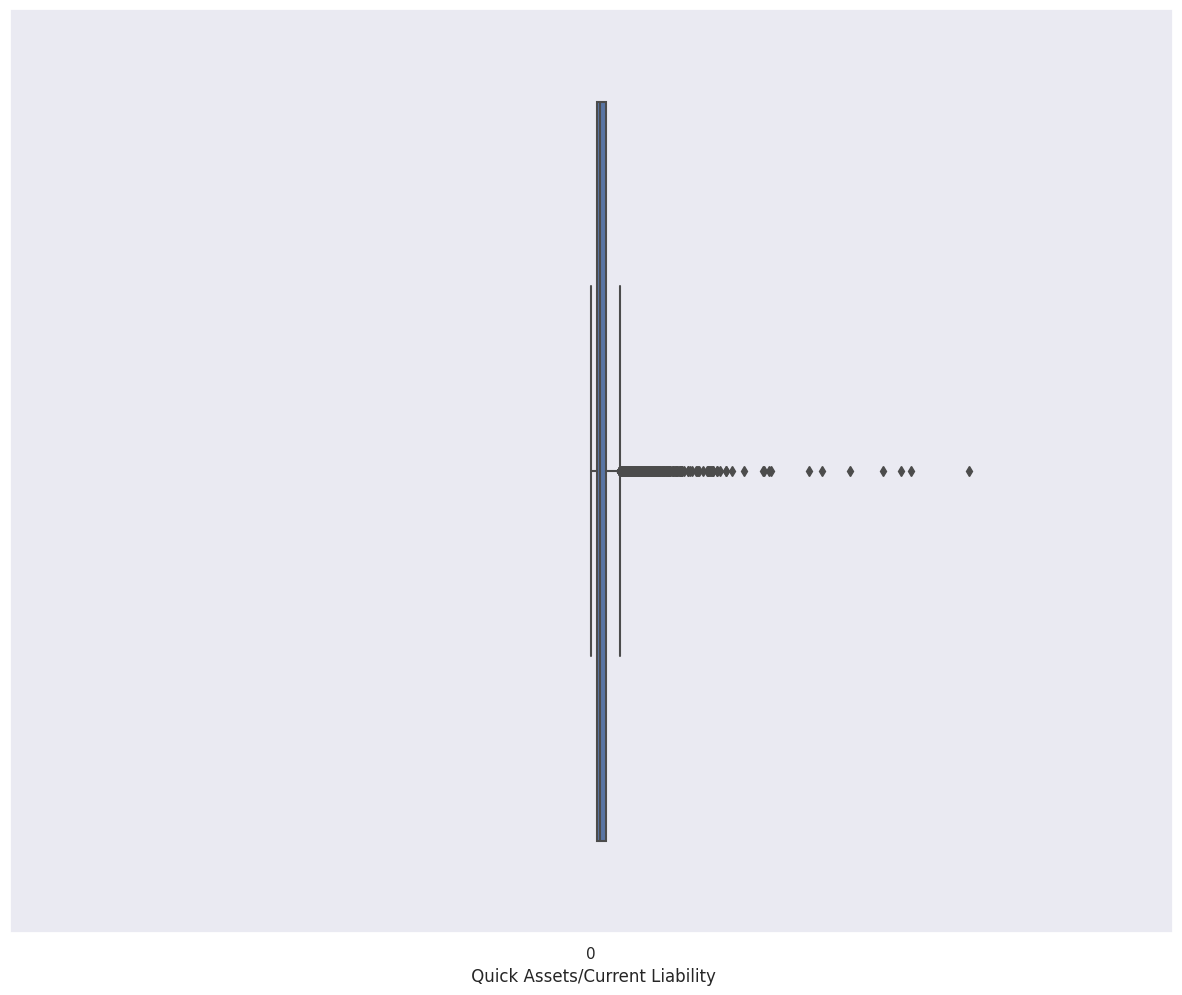

<Figure size 640x480 with 0 Axes>

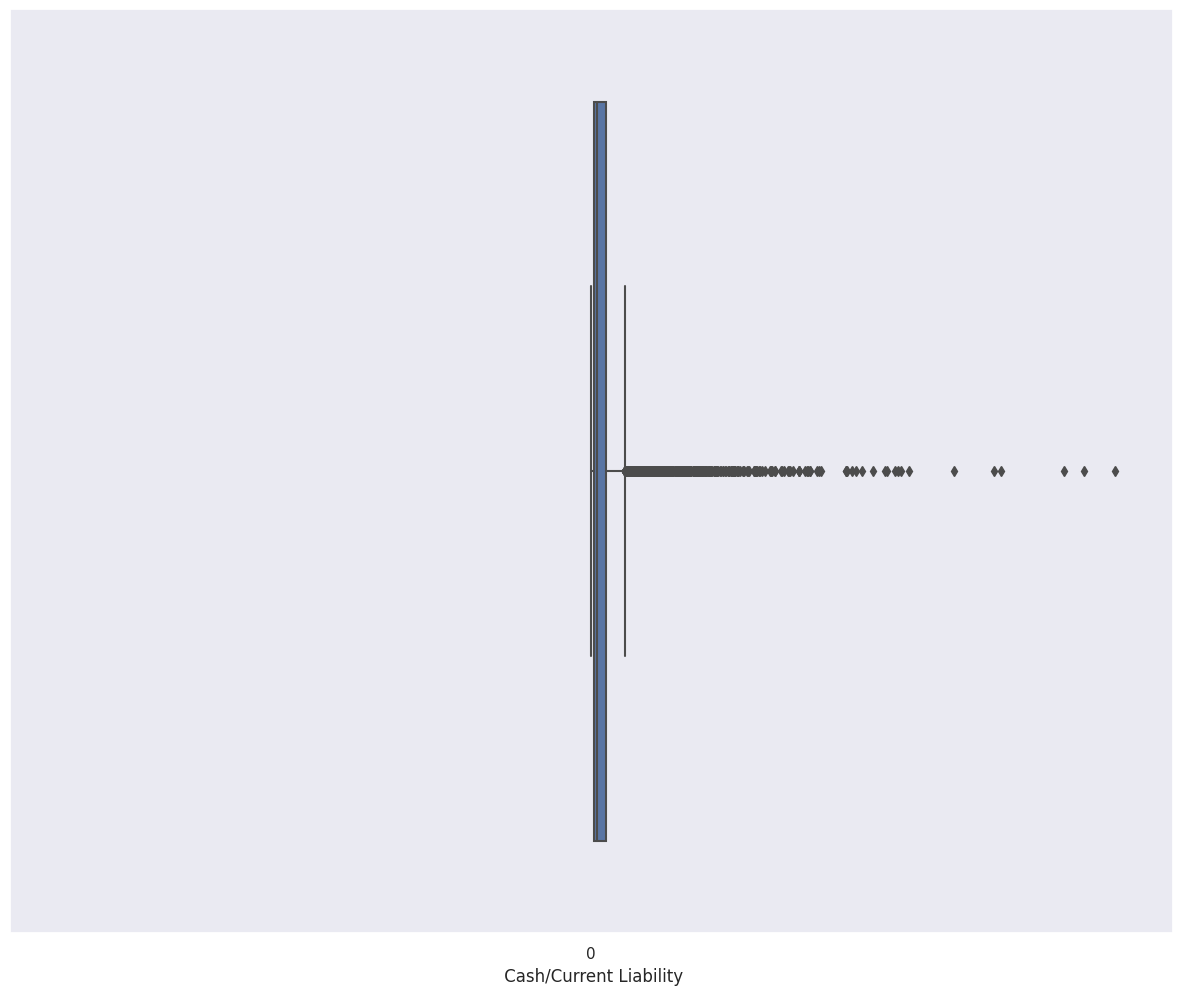

<Figure size 640x480 with 0 Axes>

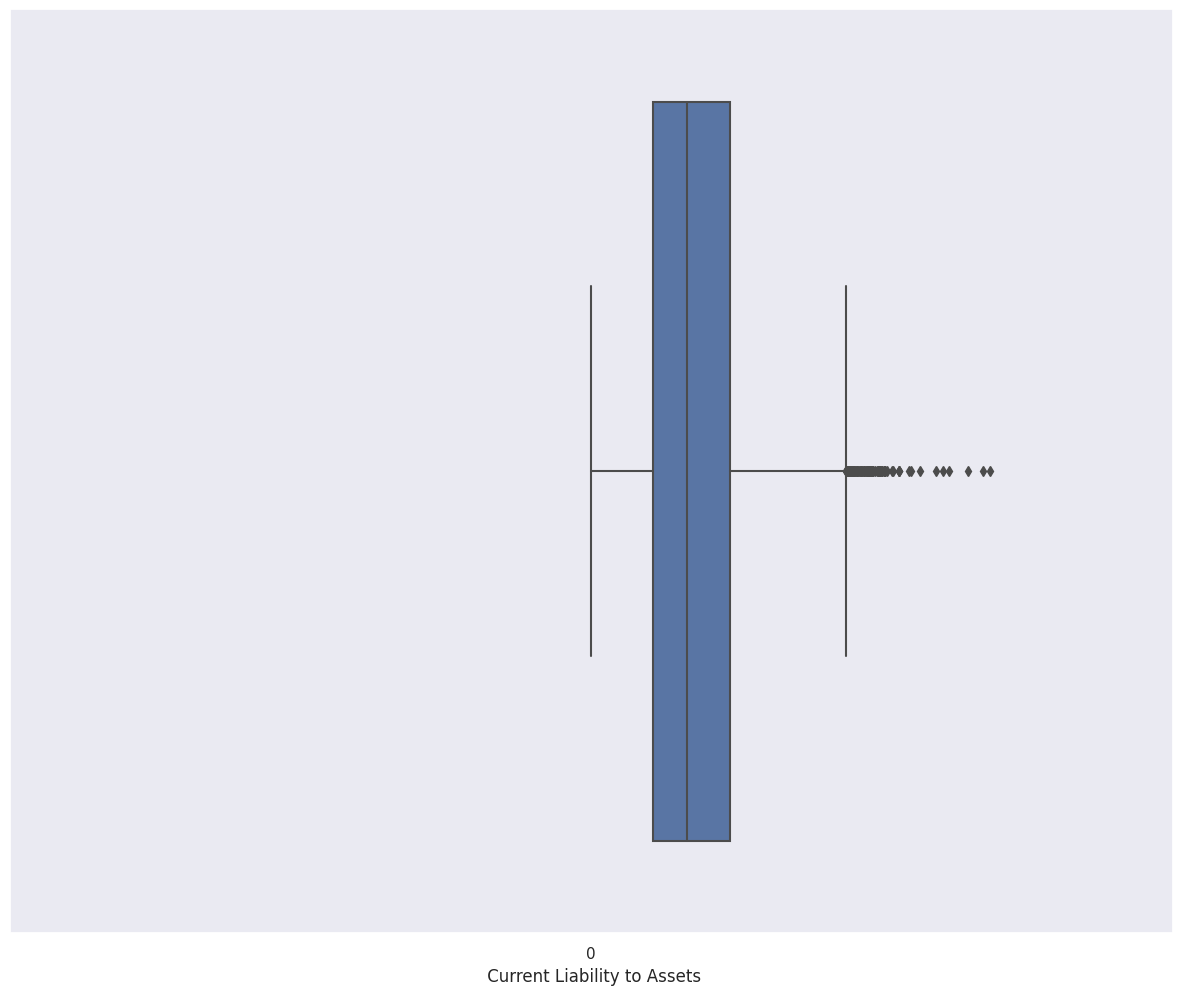

<Figure size 640x480 with 0 Axes>

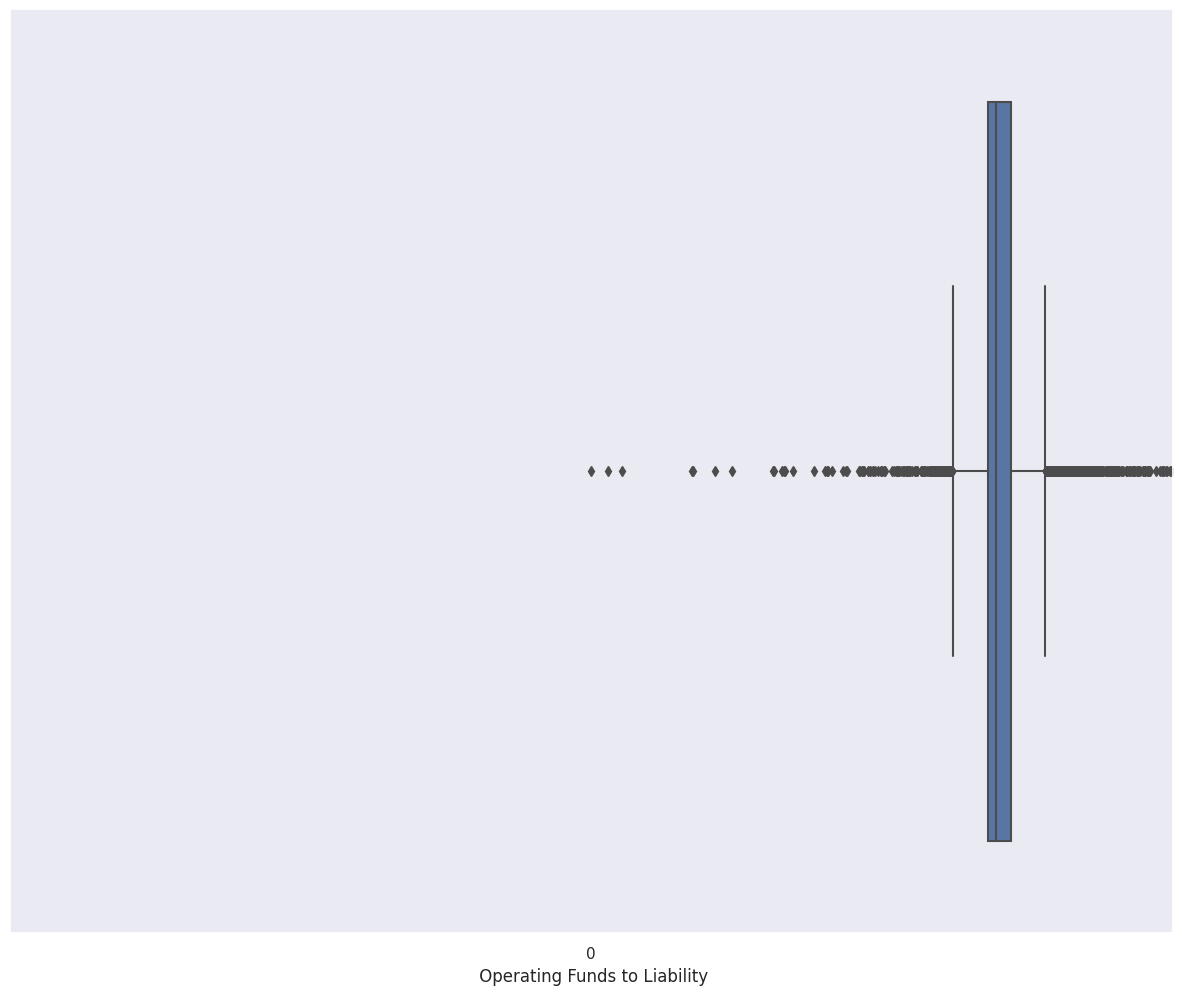

<Figure size 640x480 with 0 Axes>

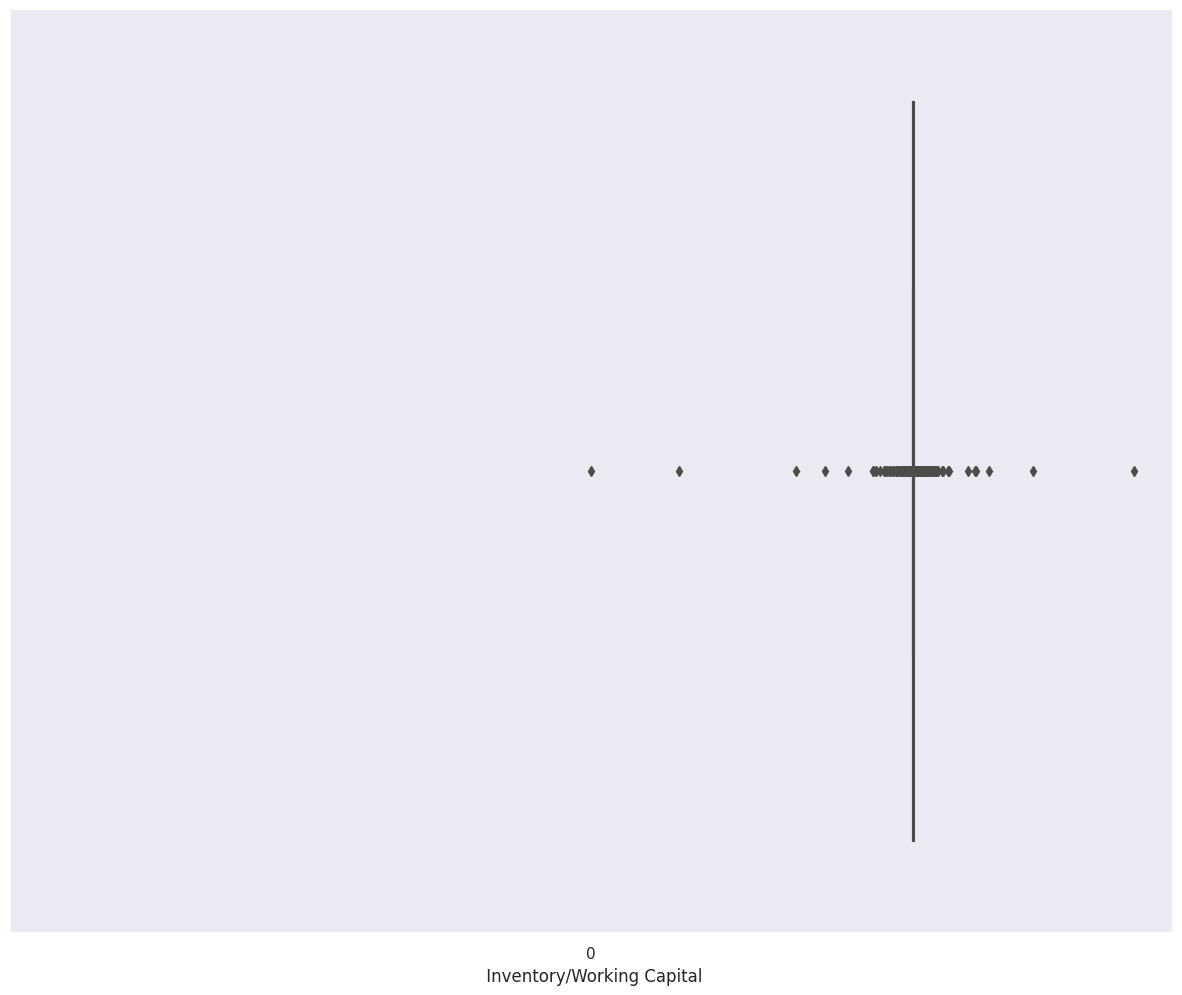

<Figure size 640x480 with 0 Axes>

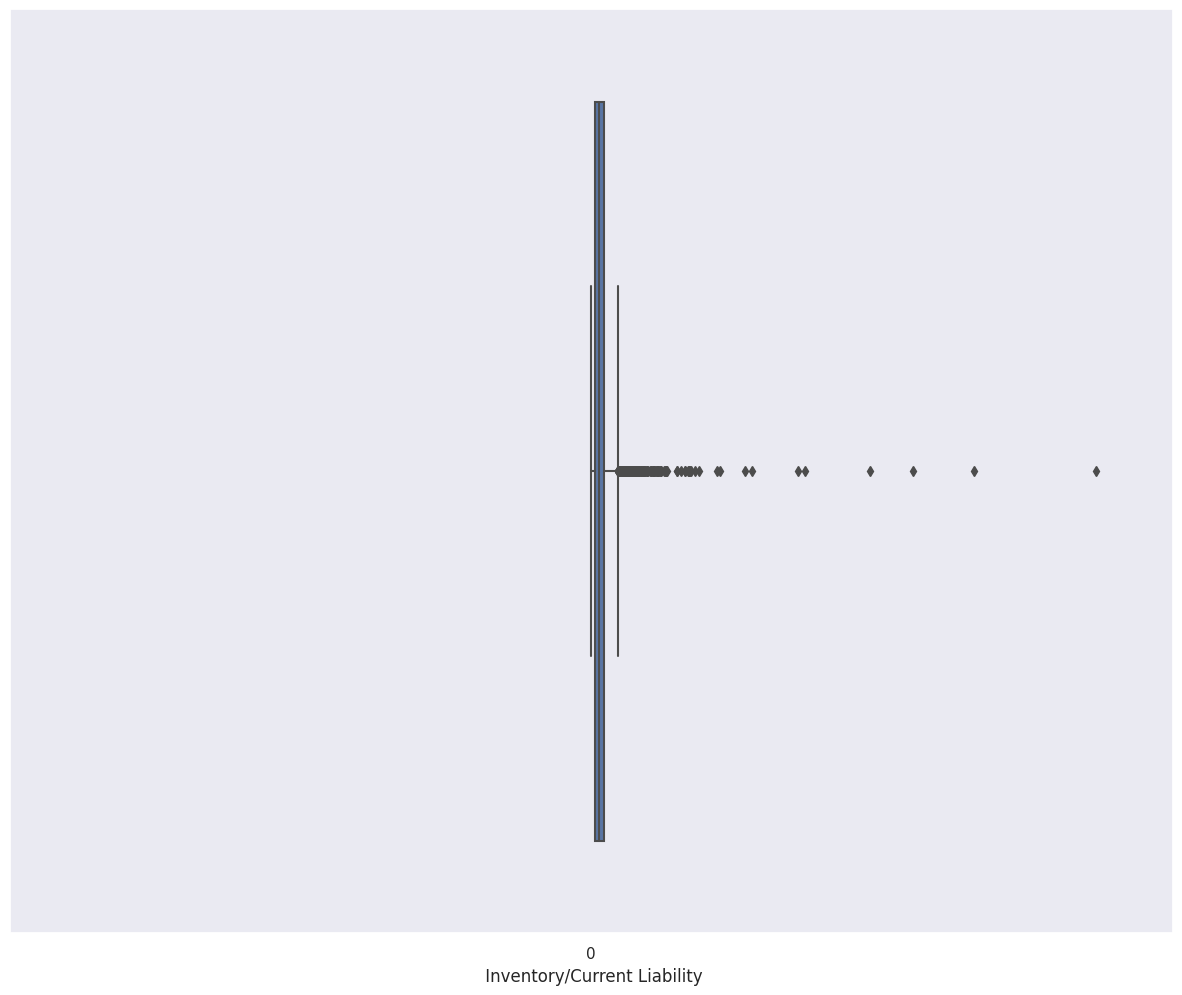

<Figure size 640x480 with 0 Axes>

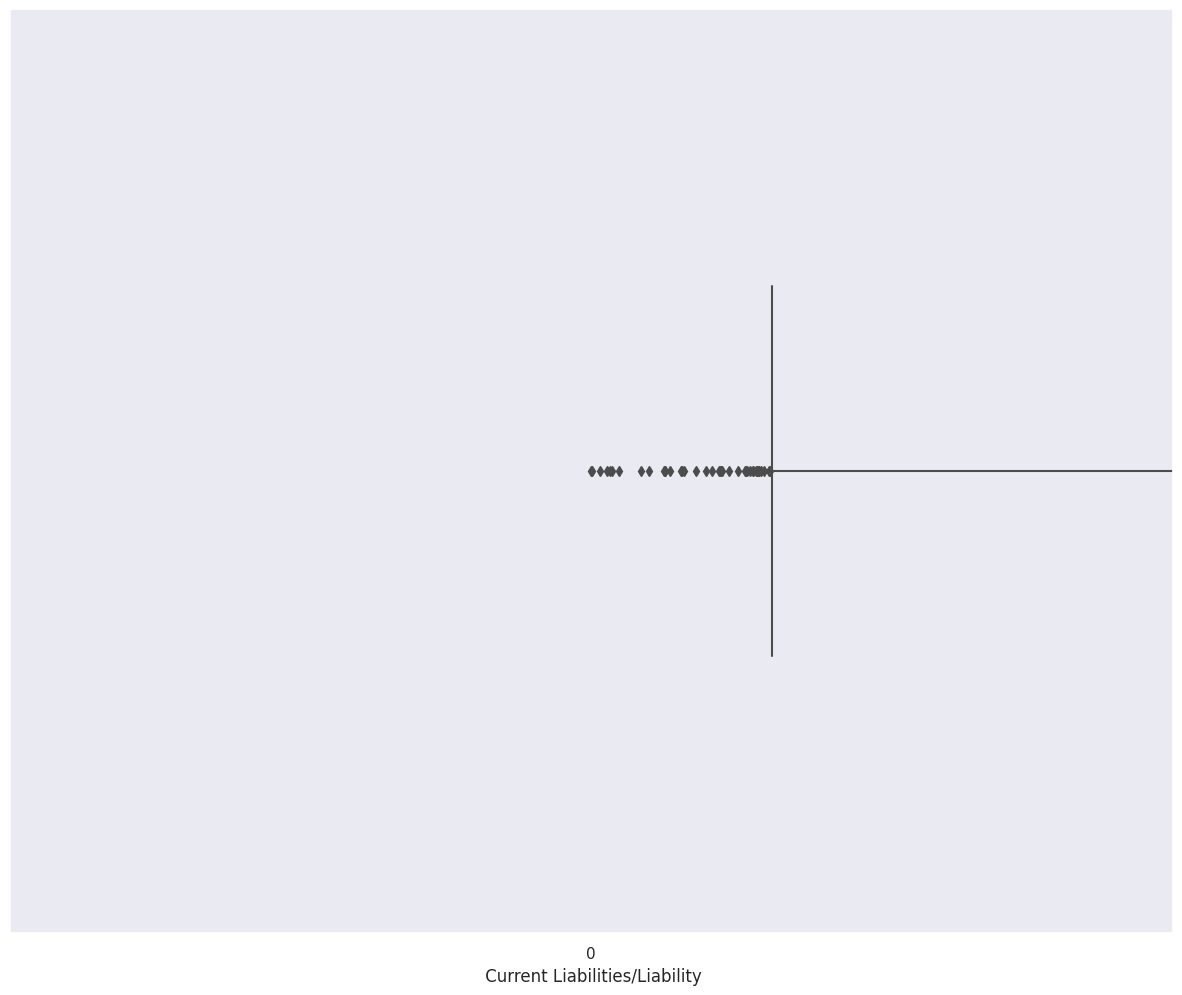

<Figure size 640x480 with 0 Axes>

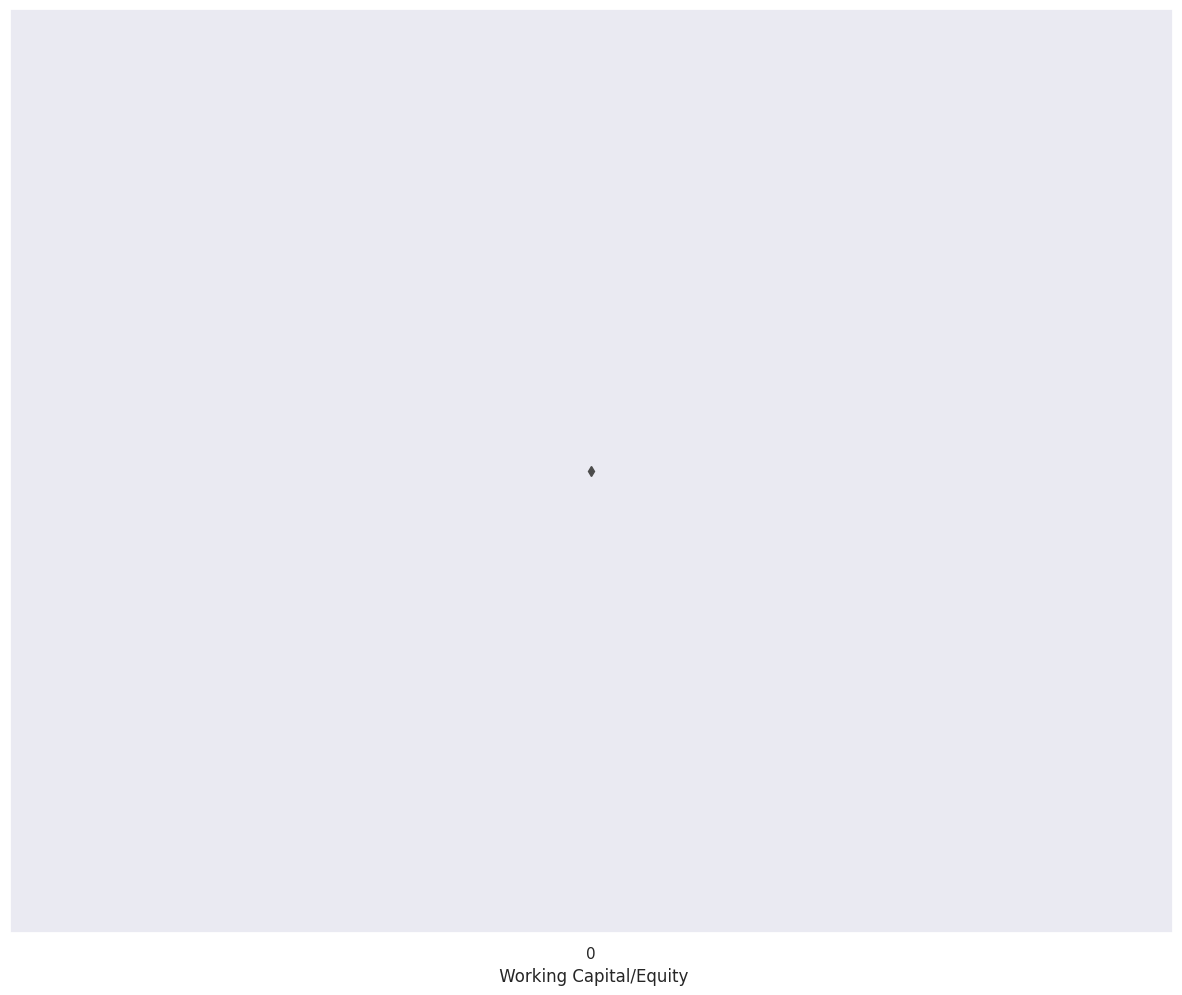

<Figure size 640x480 with 0 Axes>

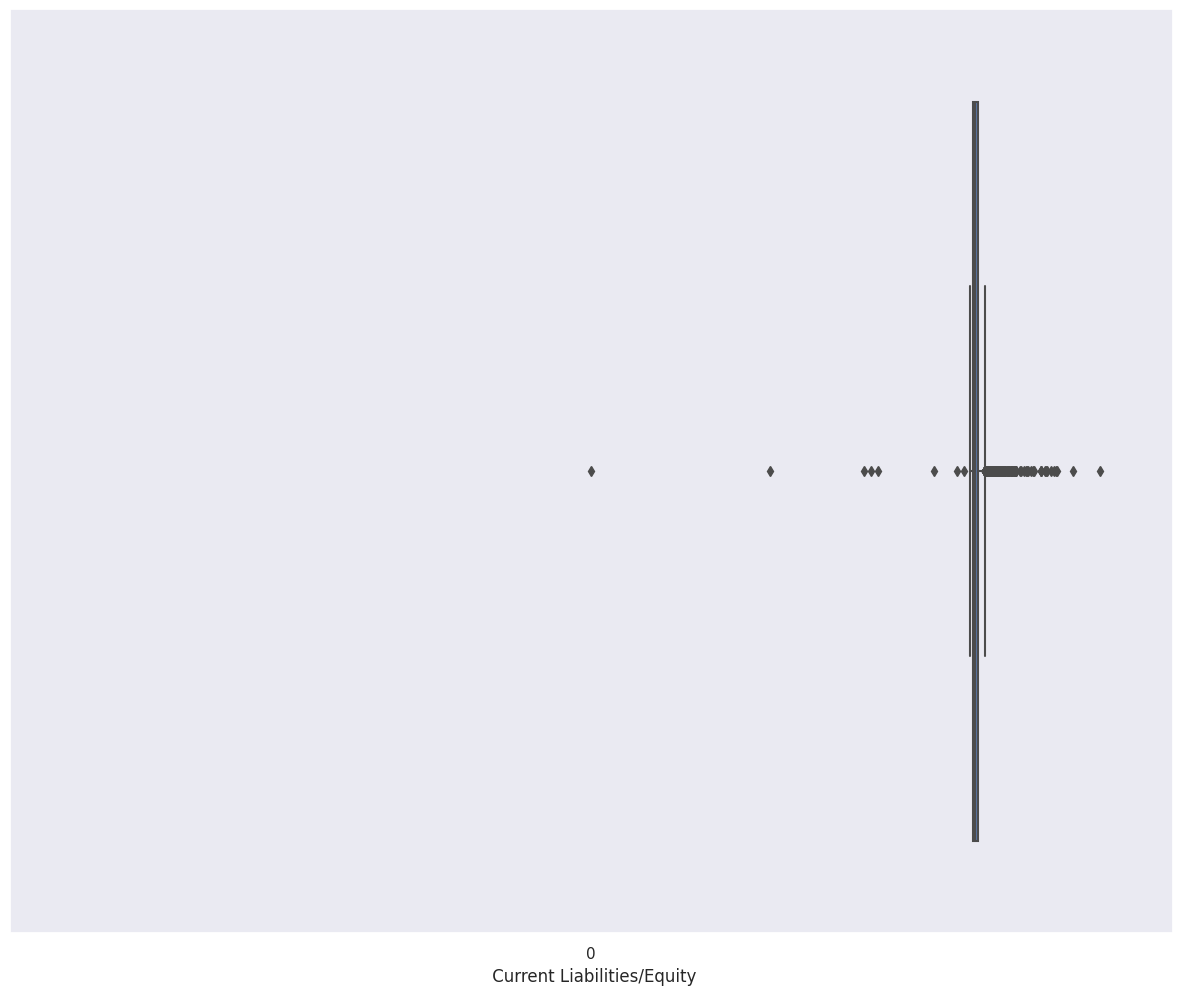

<Figure size 640x480 with 0 Axes>

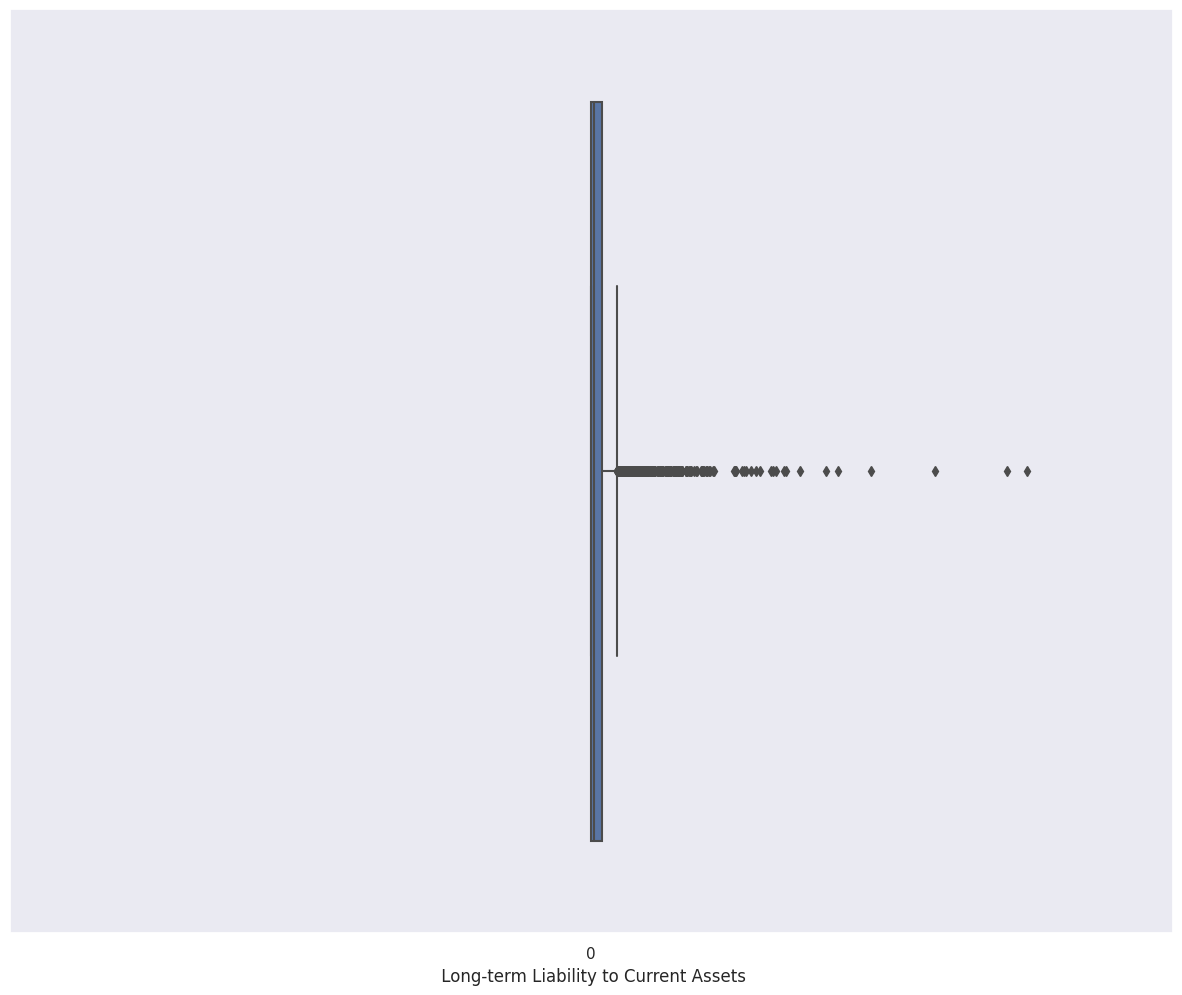

<Figure size 640x480 with 0 Axes>

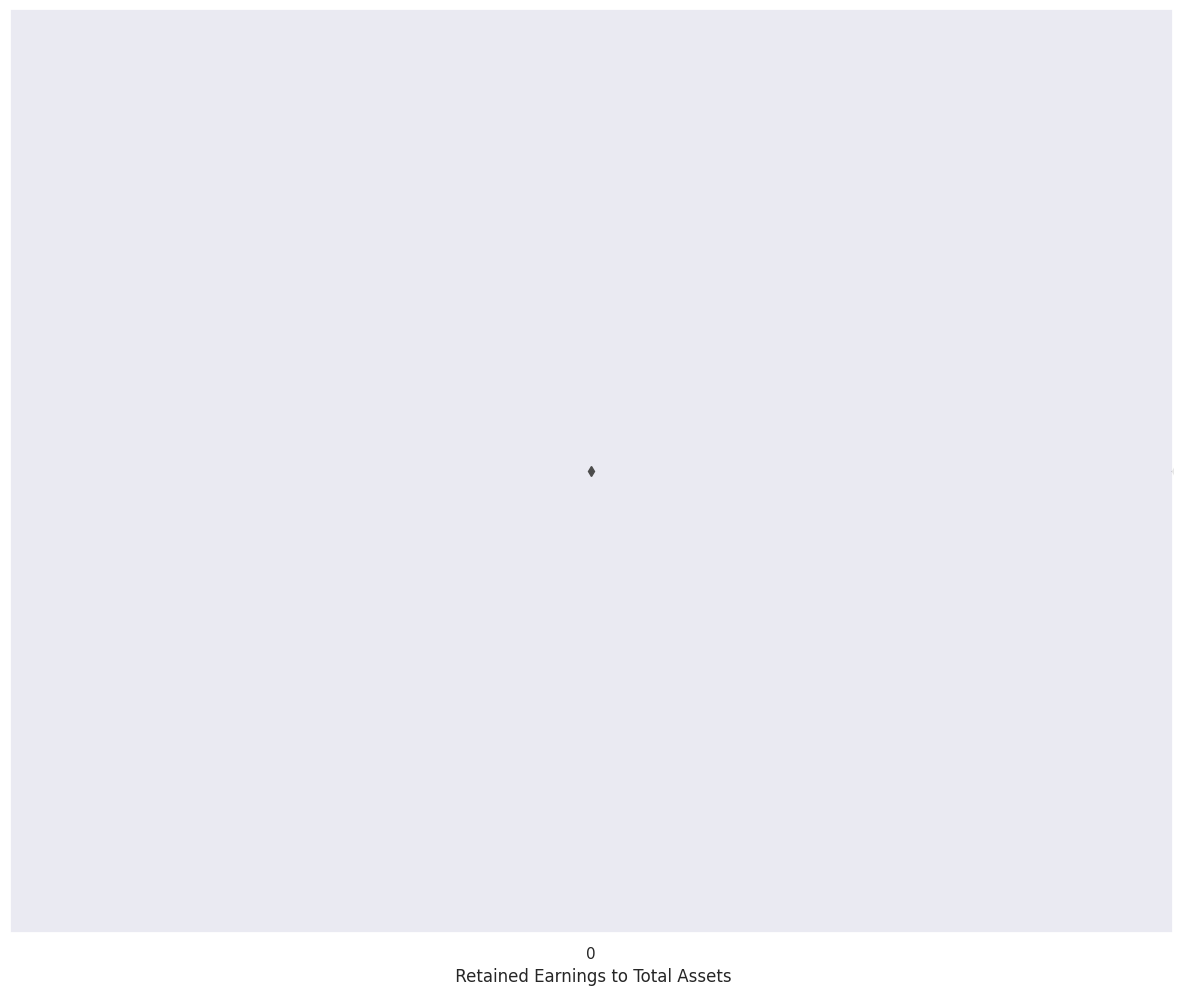

<Figure size 640x480 with 0 Axes>

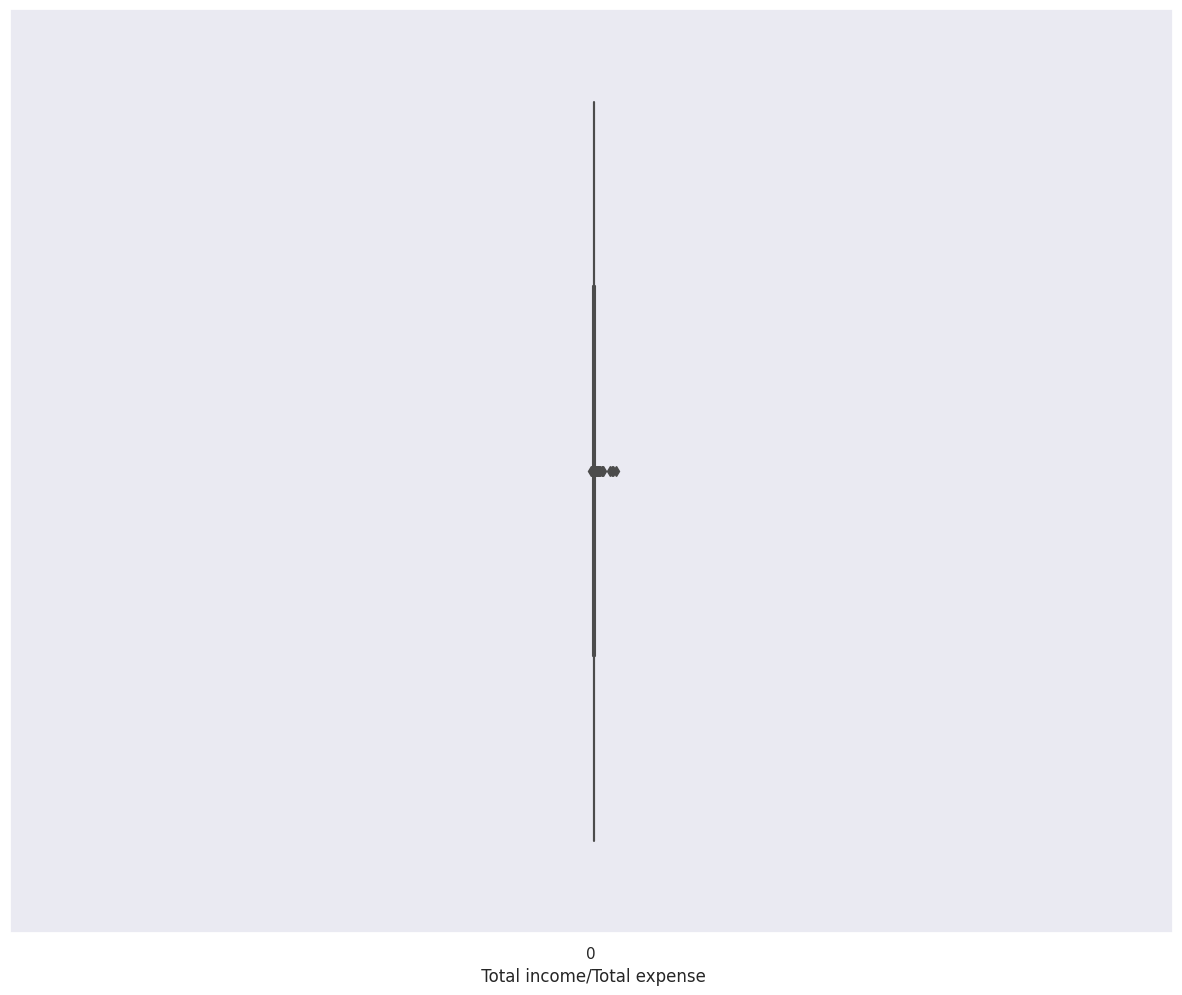

<Figure size 640x480 with 0 Axes>

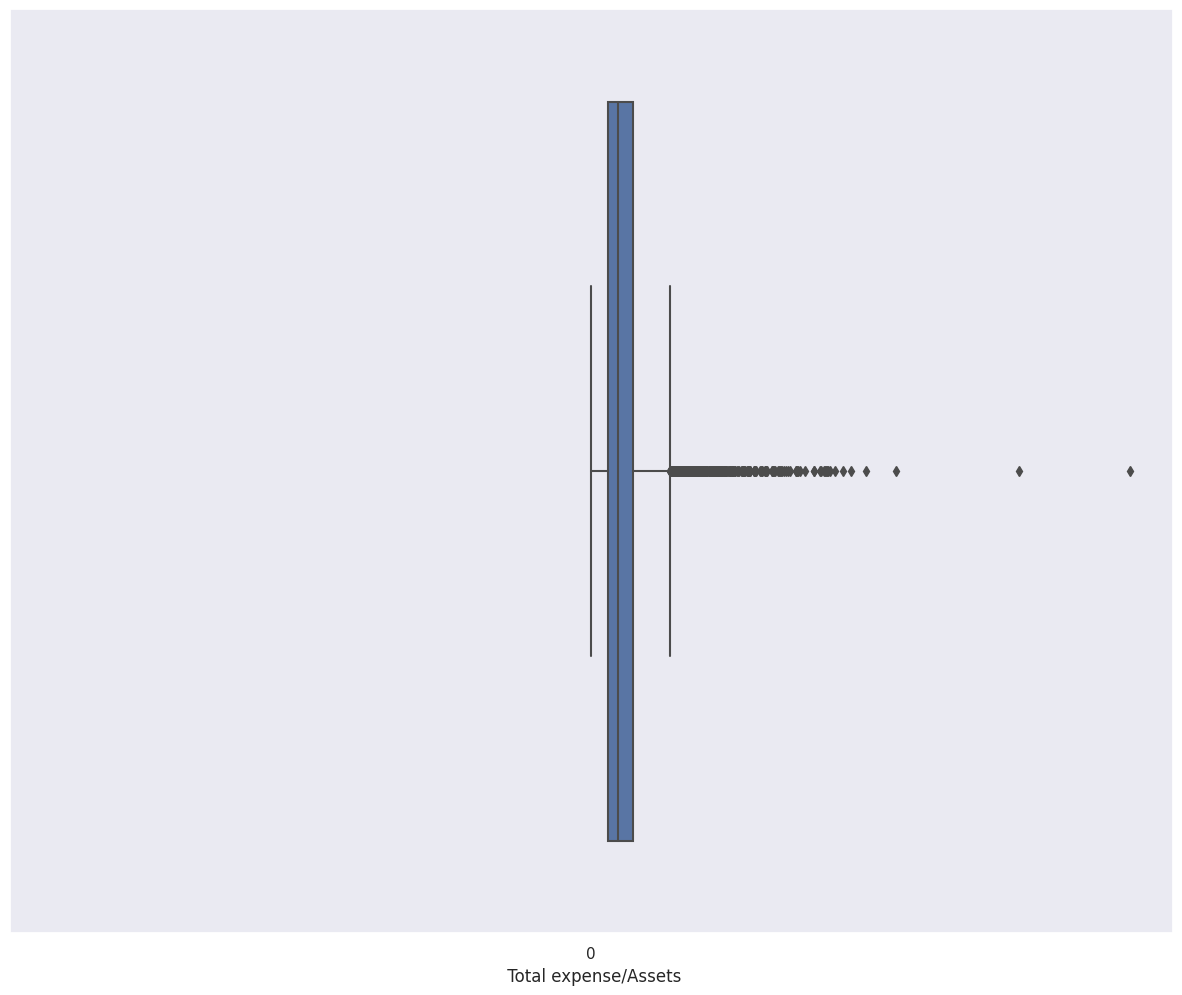

<Figure size 640x480 with 0 Axes>

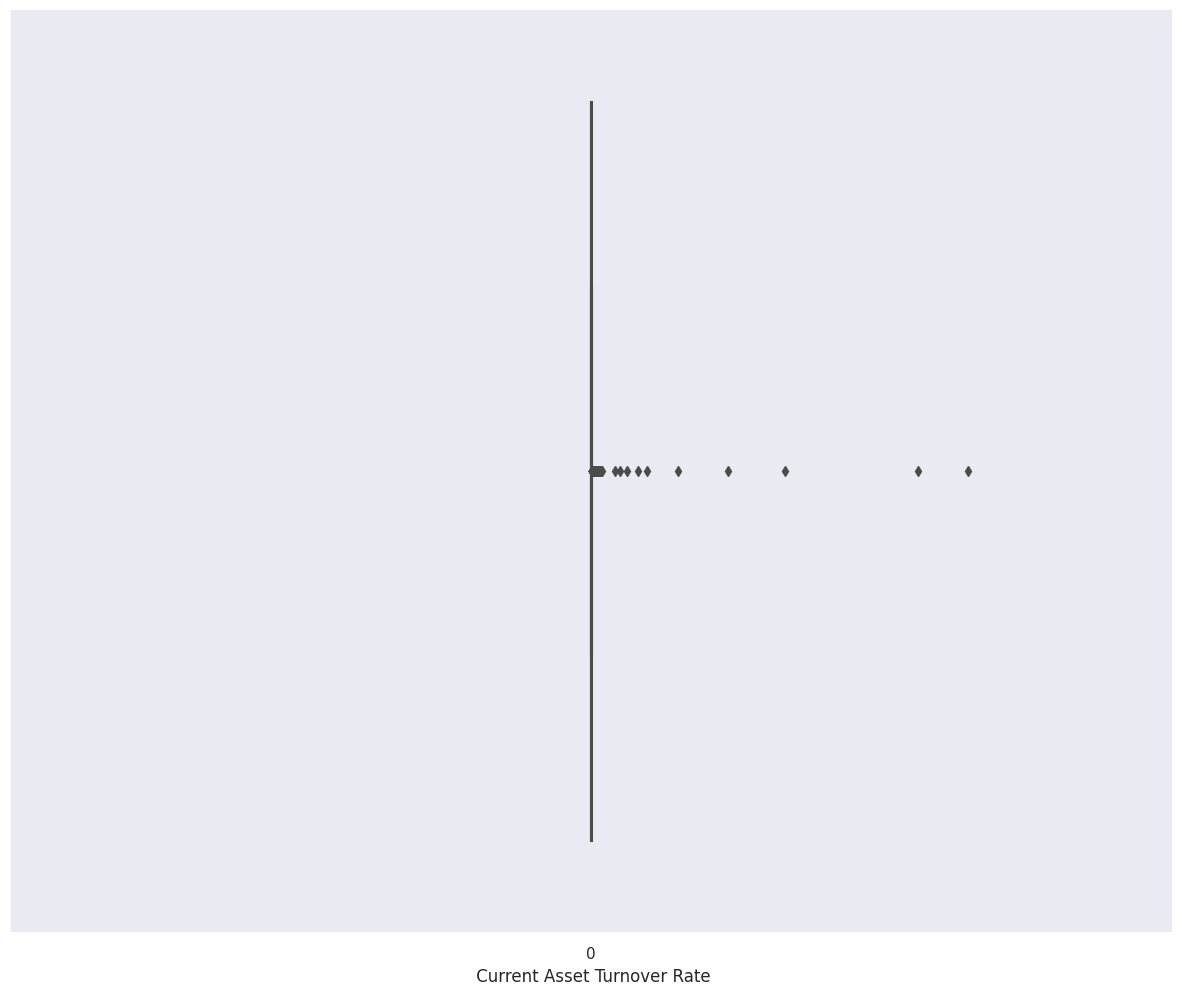

<Figure size 640x480 with 0 Axes>

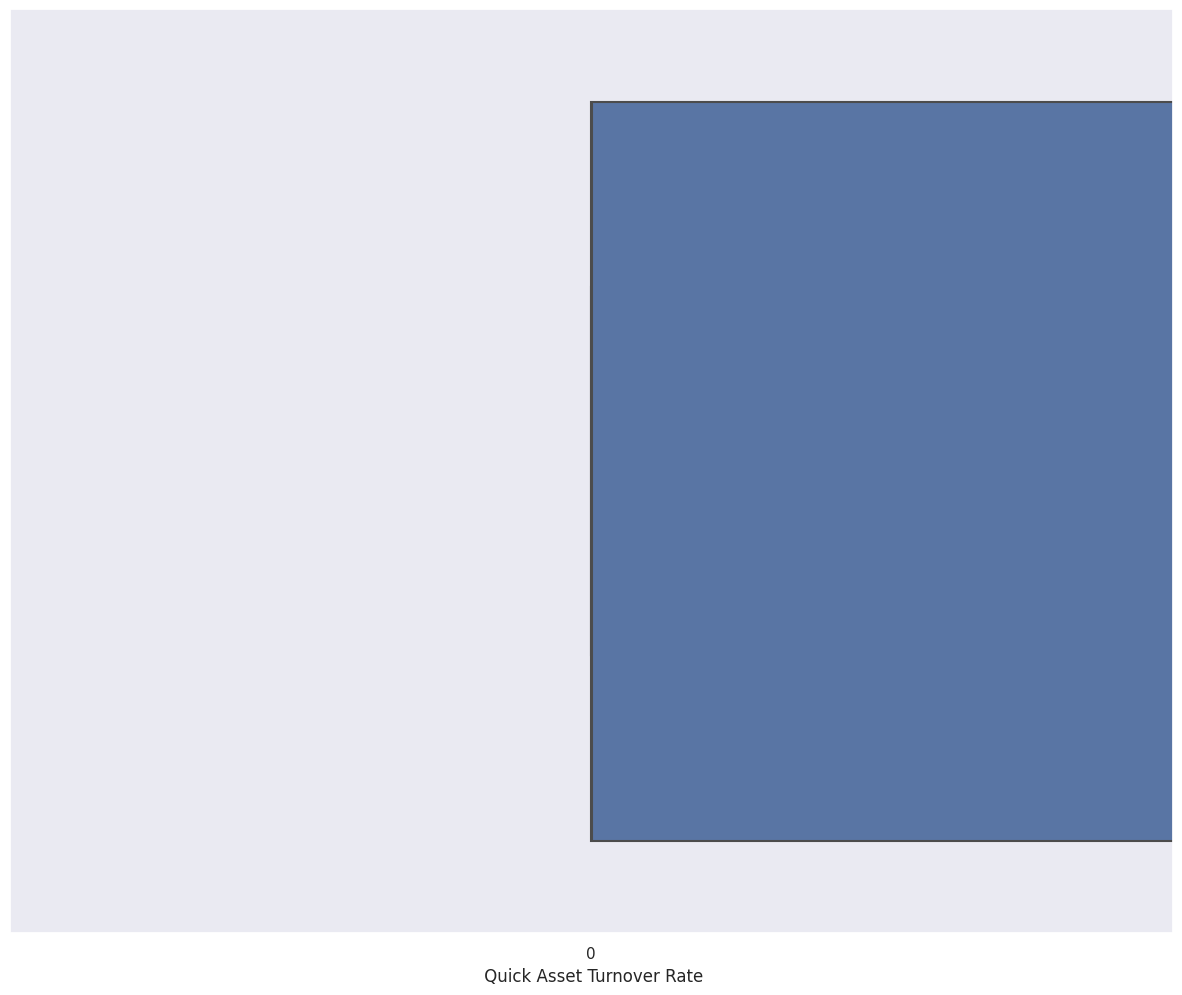

<Figure size 640x480 with 0 Axes>

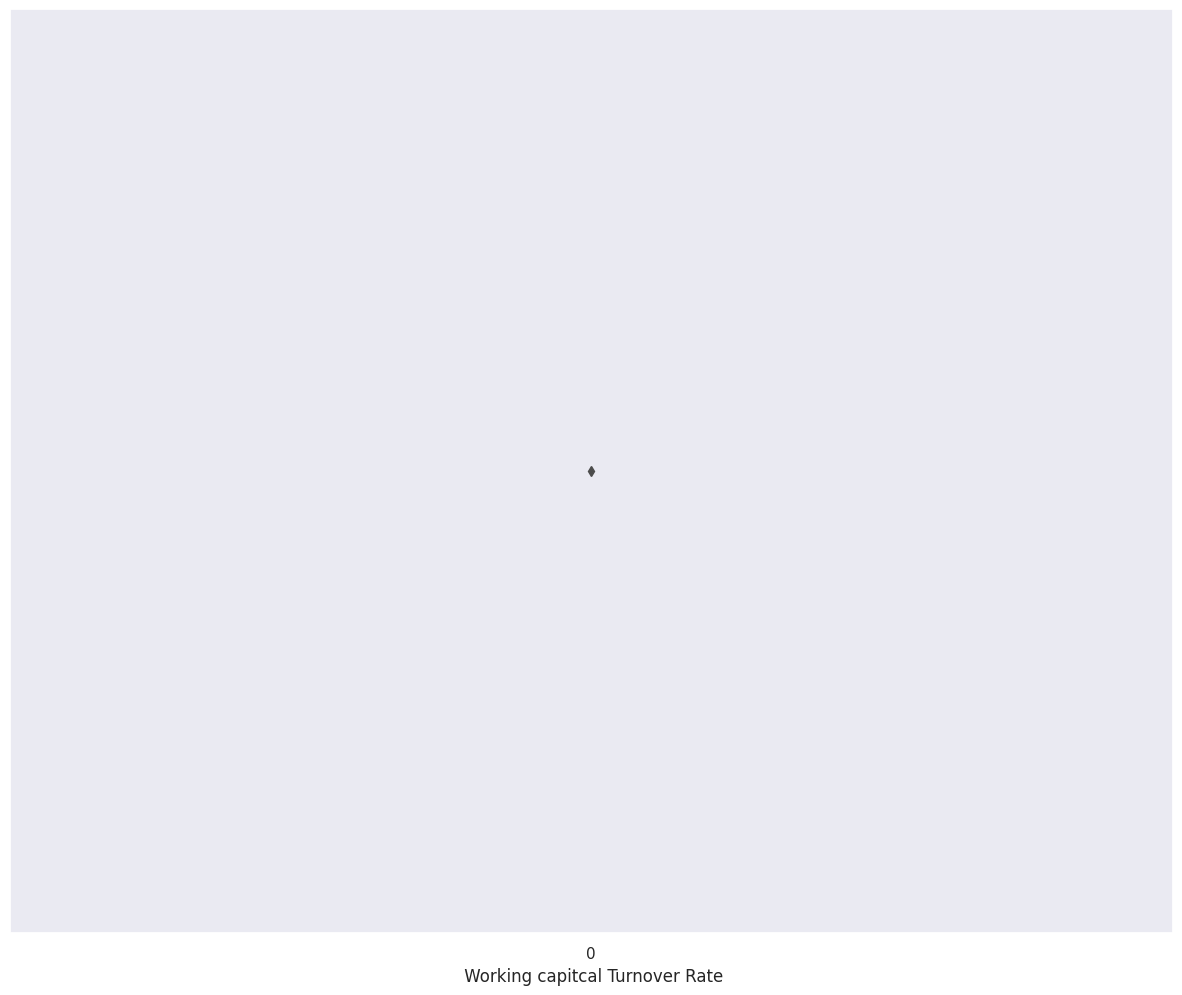

<Figure size 640x480 with 0 Axes>

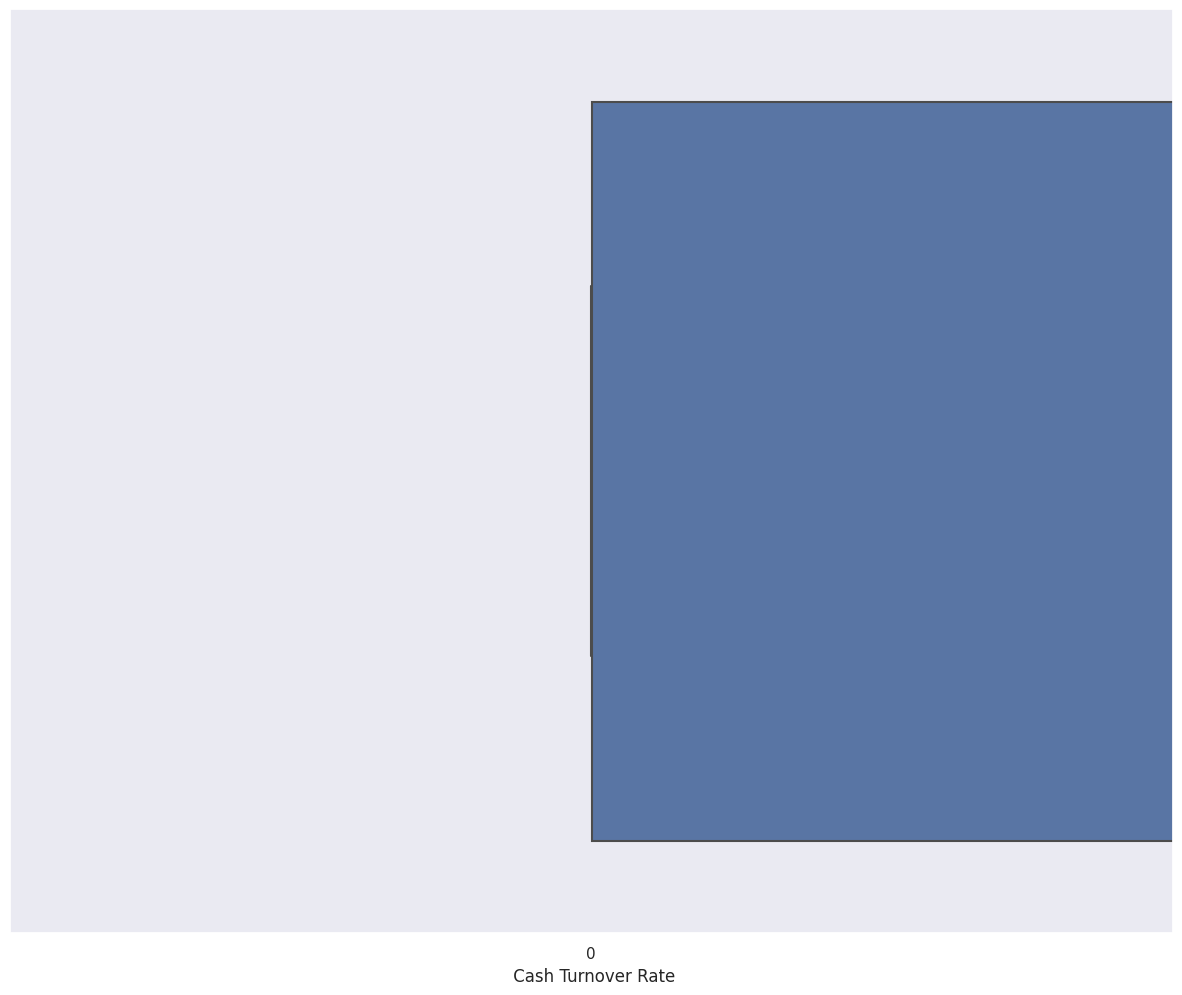

<Figure size 640x480 with 0 Axes>

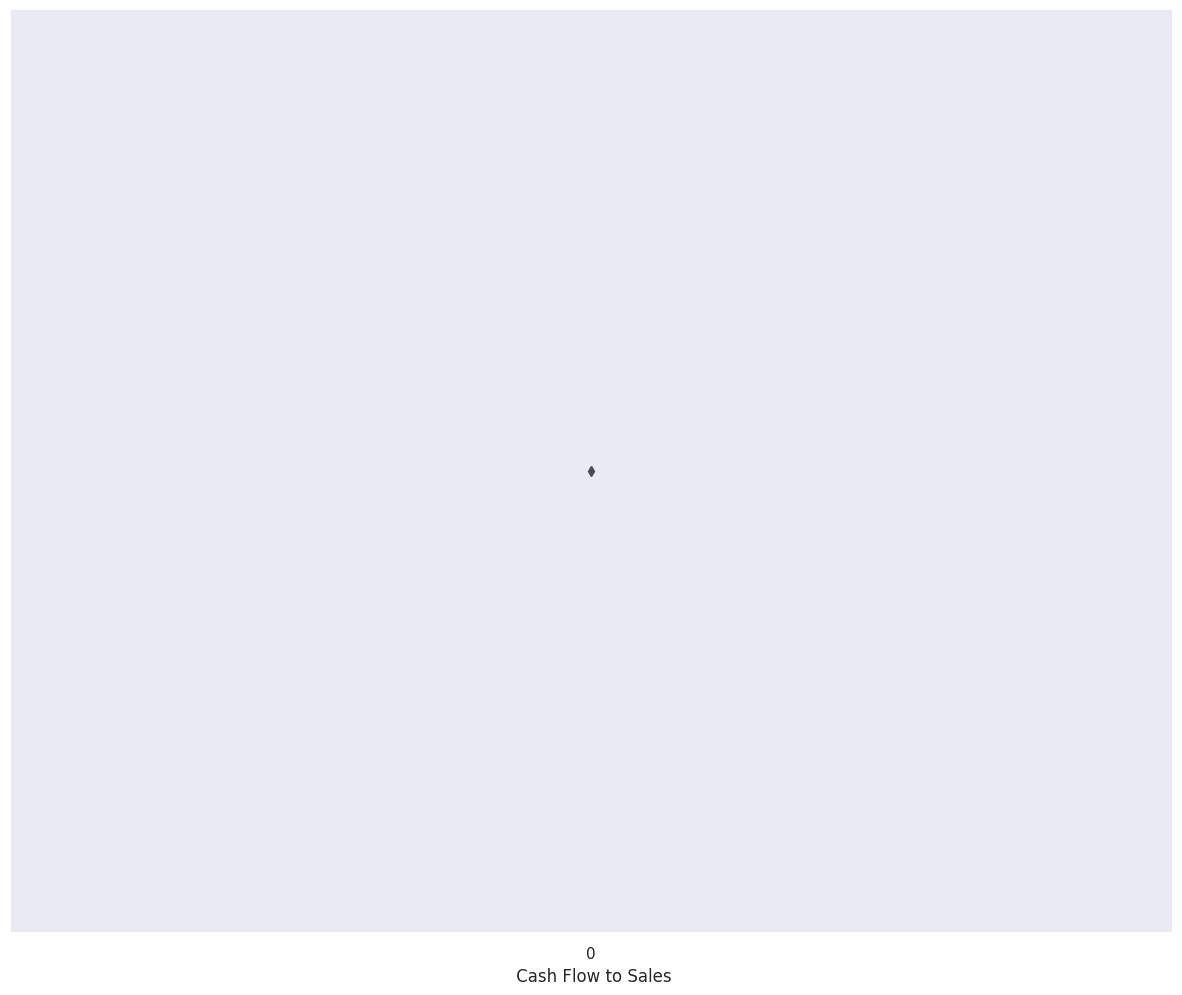

<Figure size 640x480 with 0 Axes>

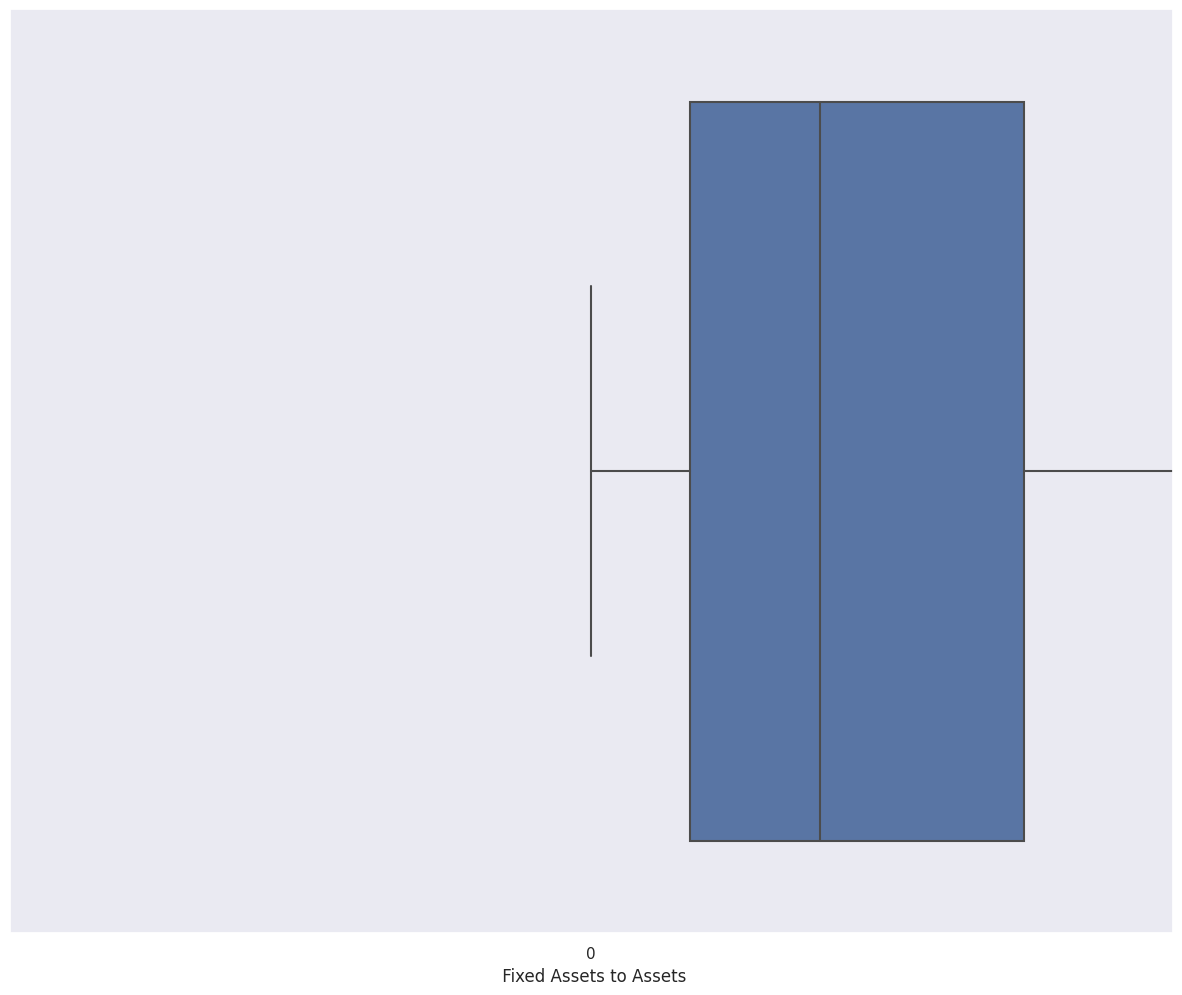

<Figure size 640x480 with 0 Axes>

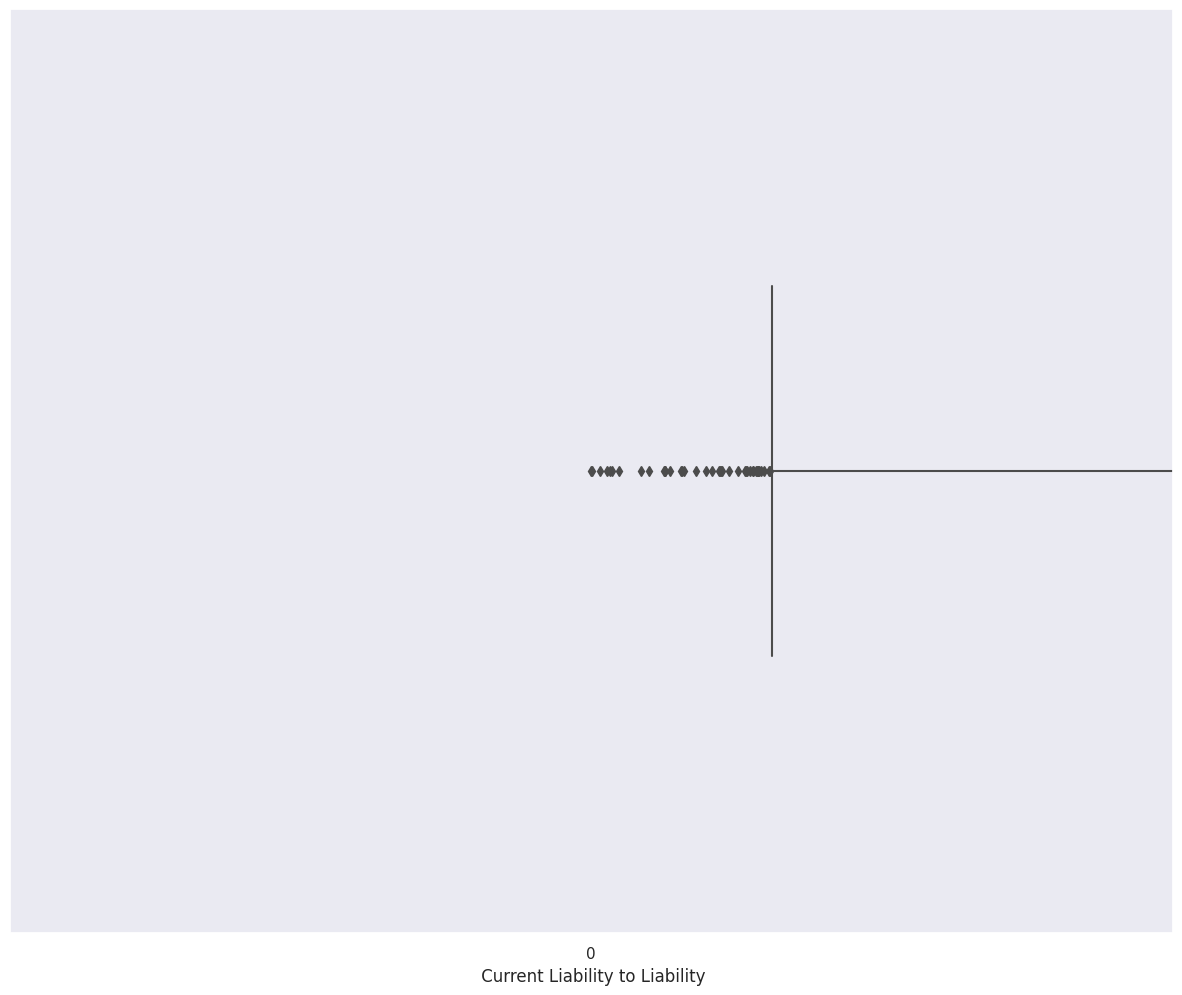

<Figure size 640x480 with 0 Axes>

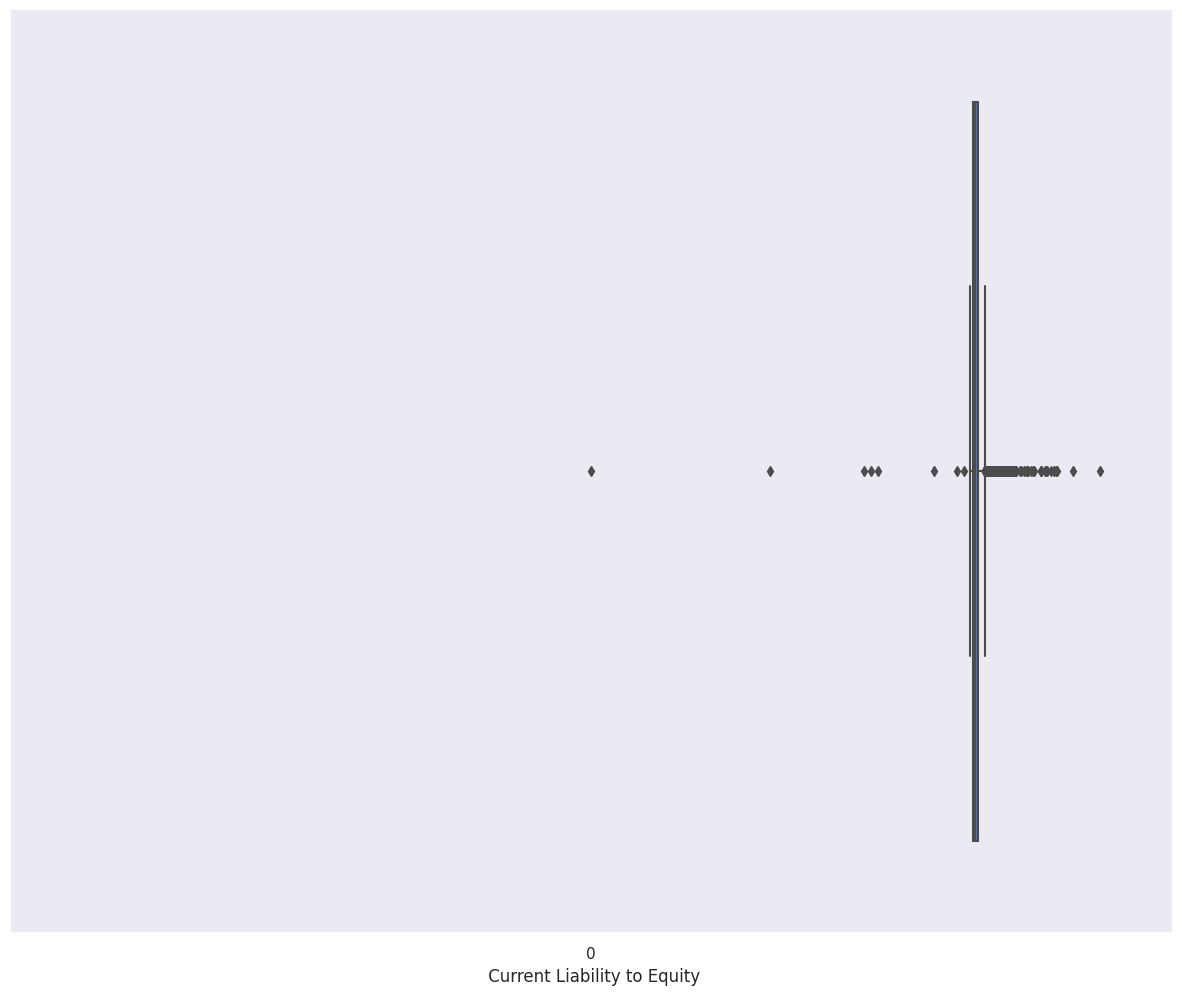

<Figure size 640x480 with 0 Axes>

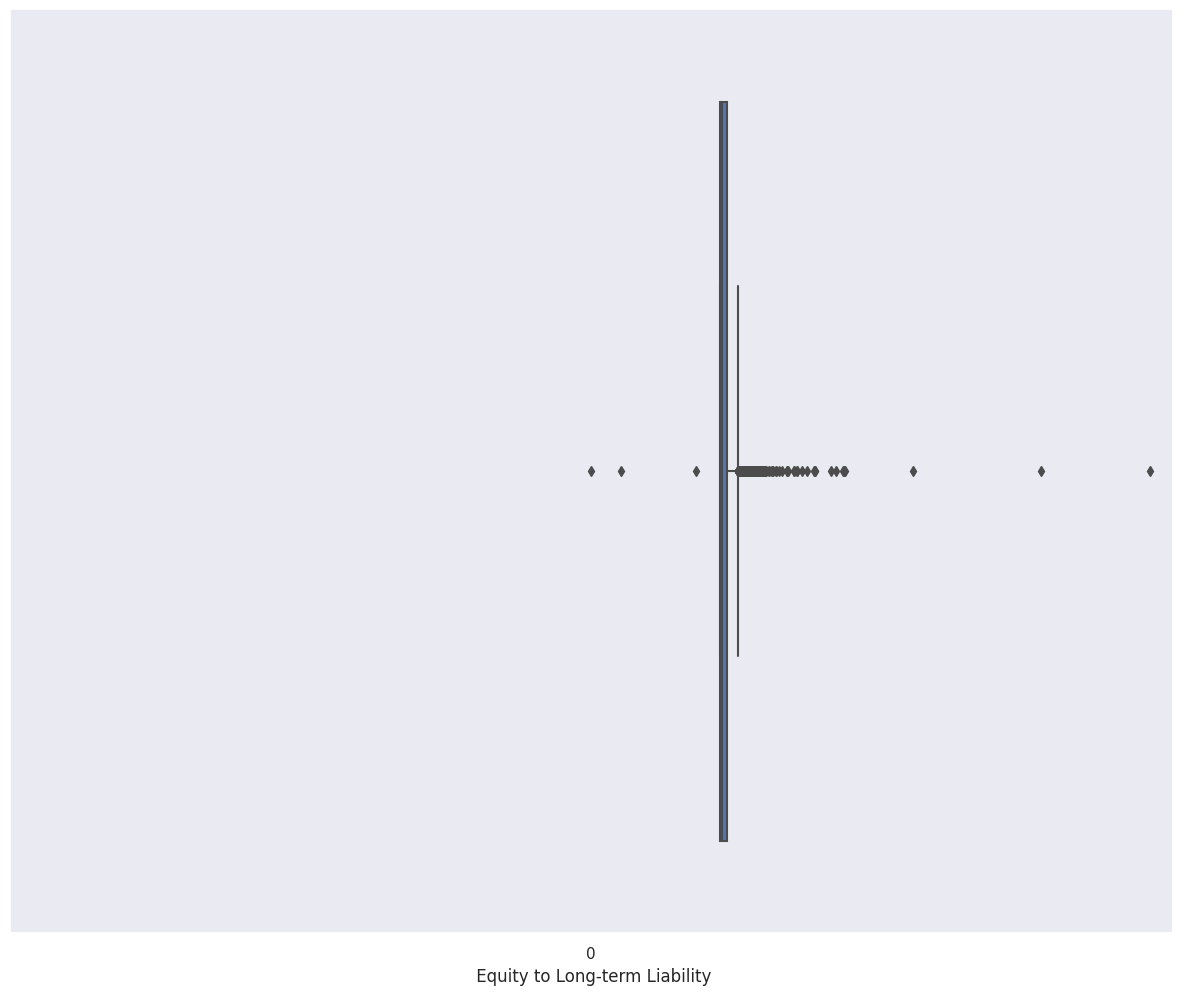

<Figure size 640x480 with 0 Axes>

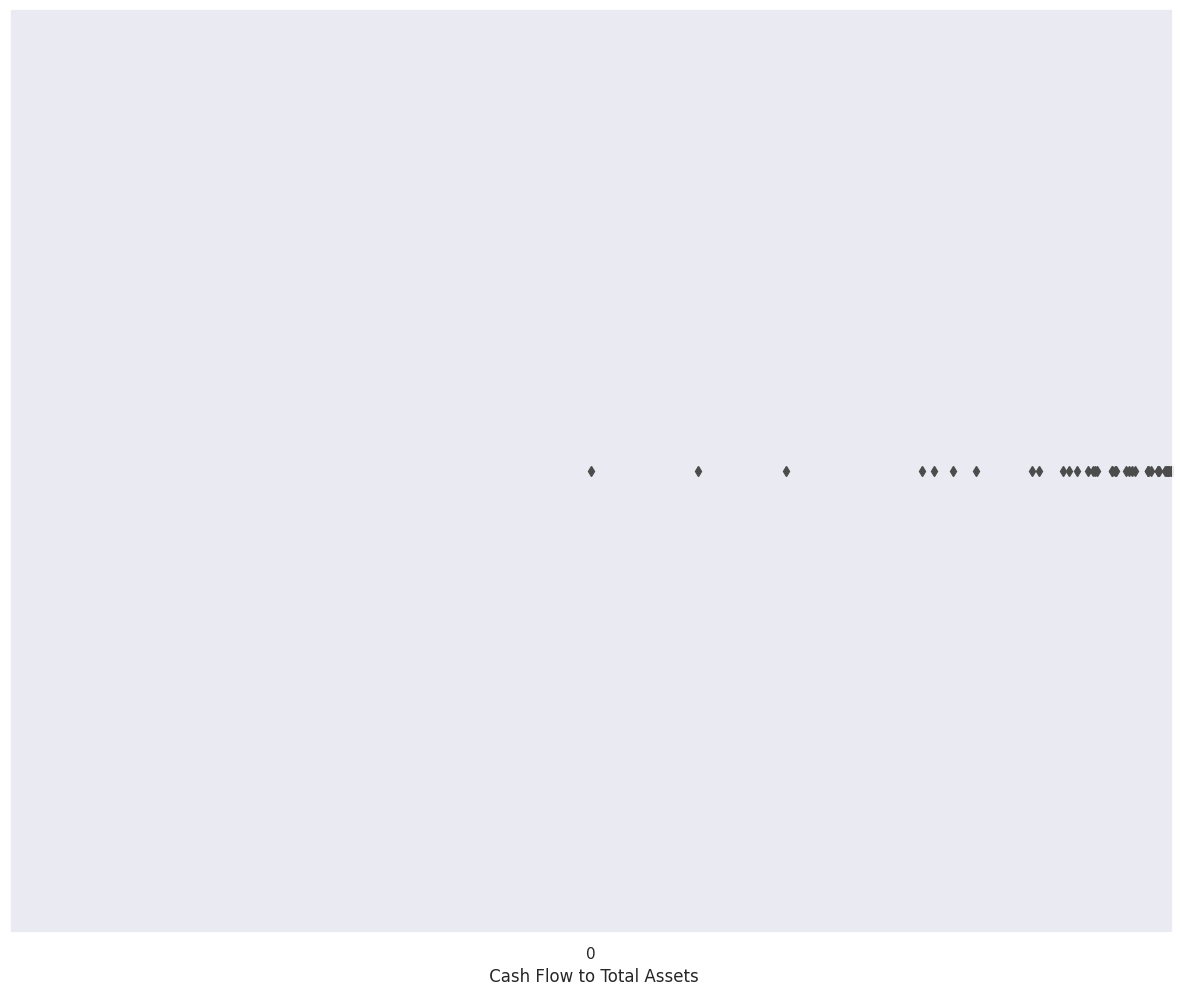

<Figure size 640x480 with 0 Axes>

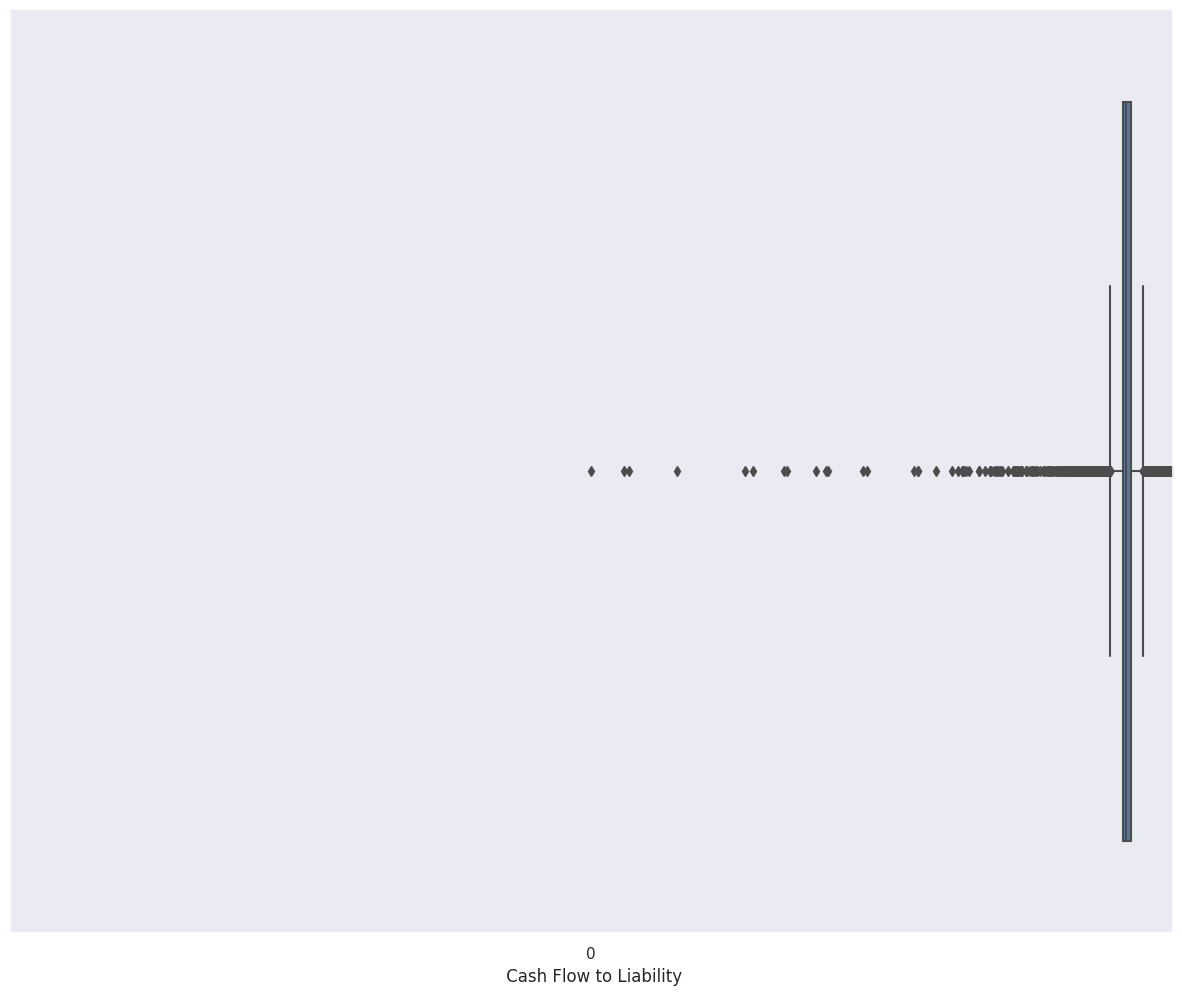

<Figure size 640x480 with 0 Axes>

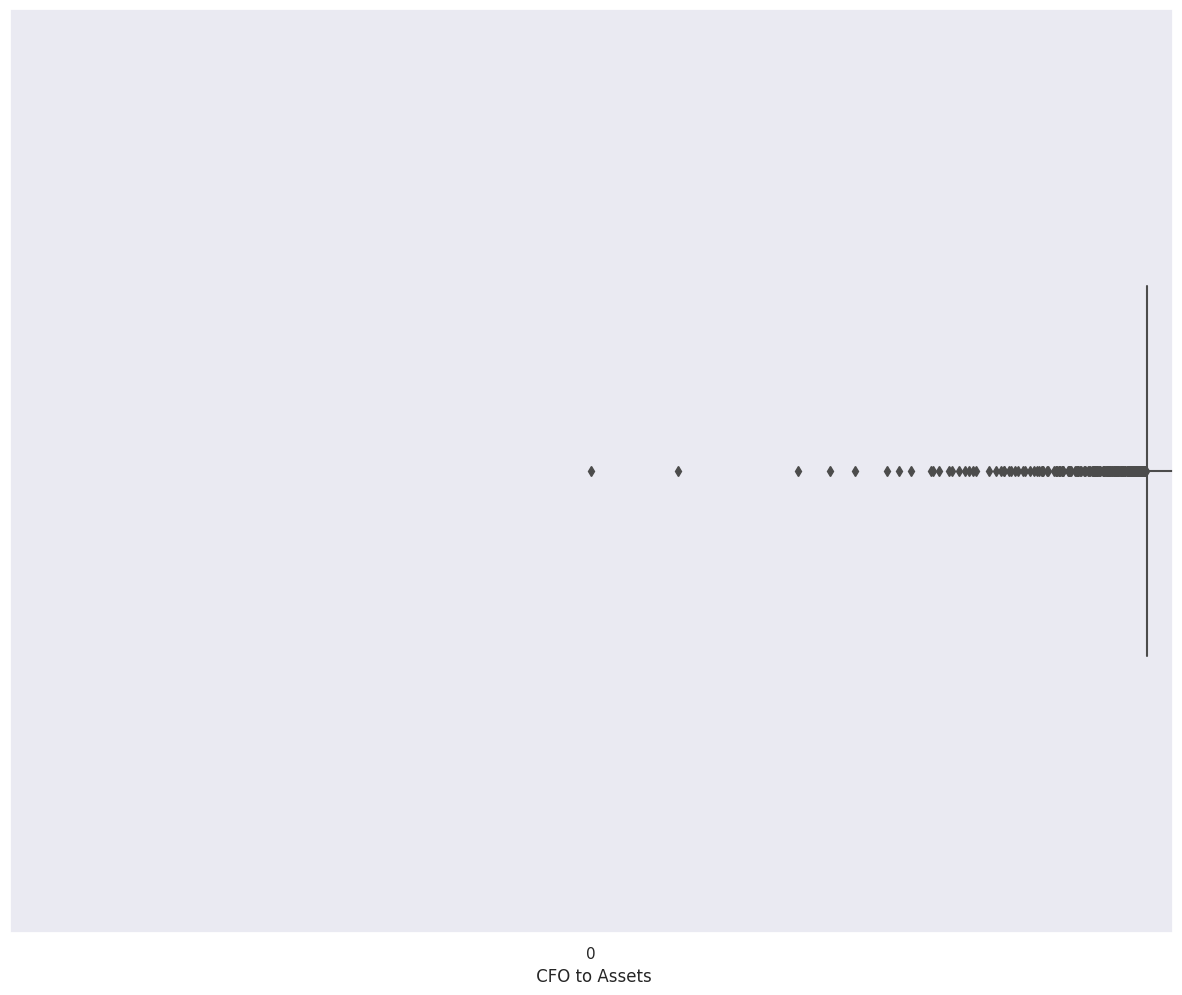

<Figure size 640x480 with 0 Axes>

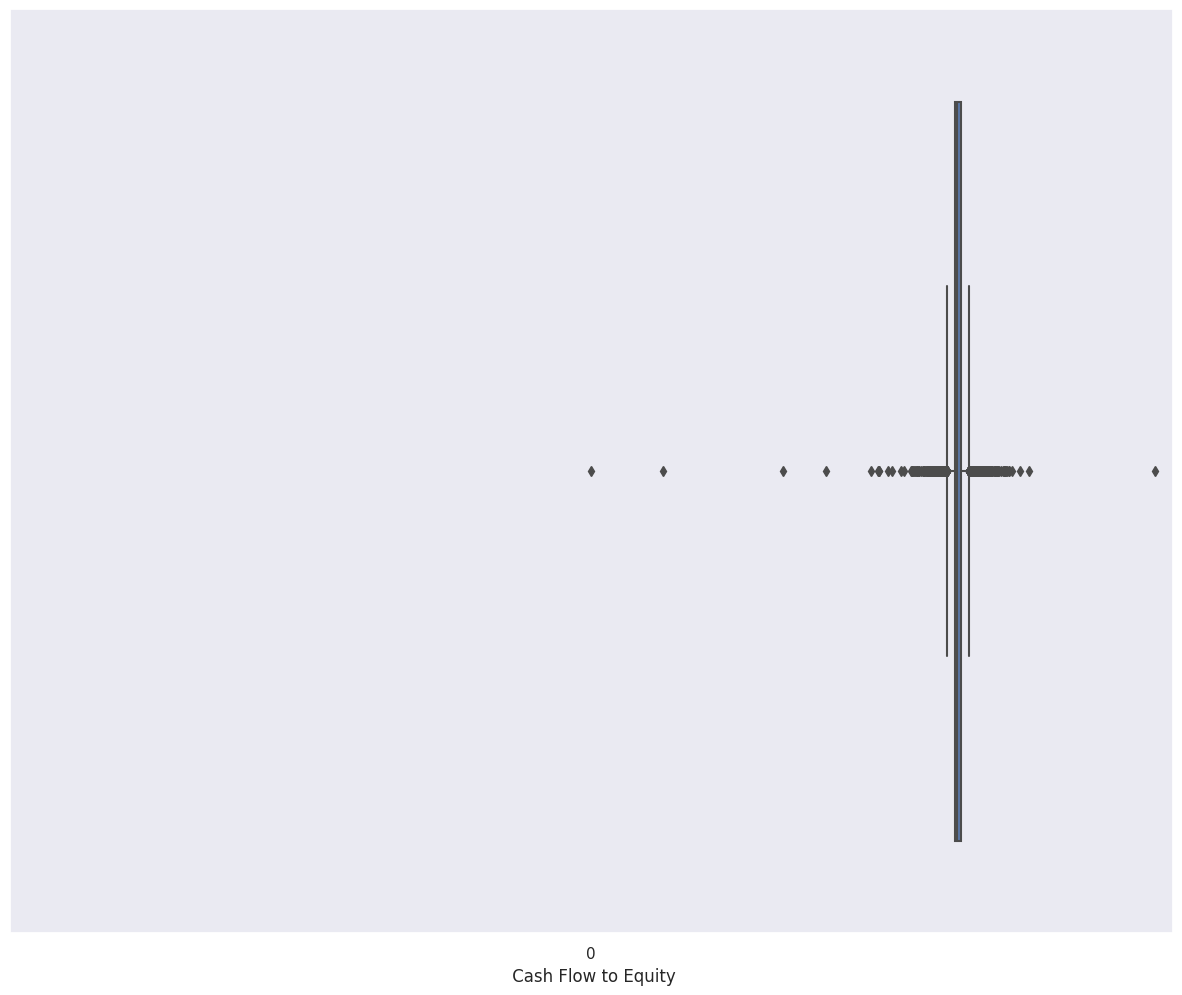

<Figure size 640x480 with 0 Axes>

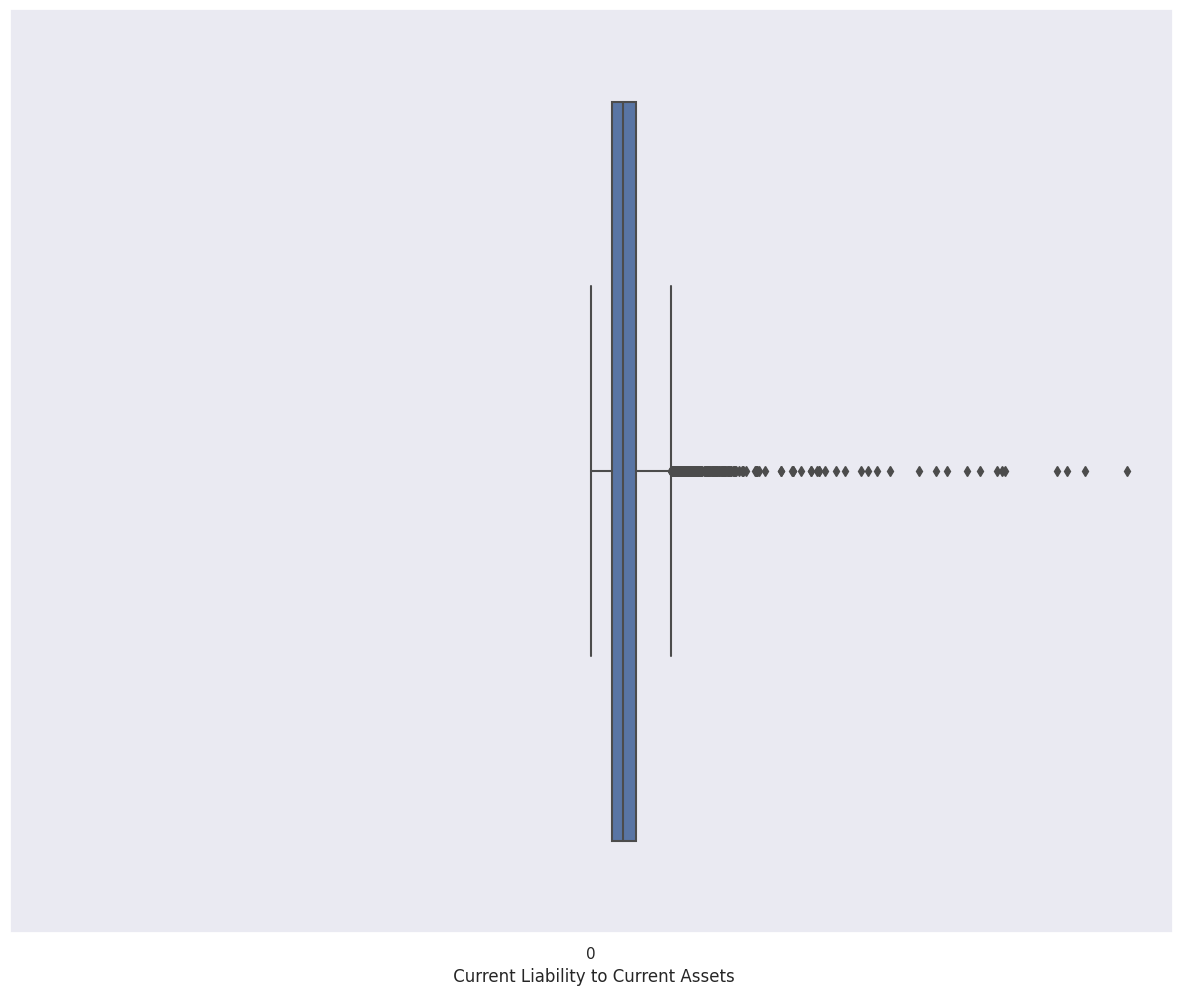

<Figure size 640x480 with 0 Axes>

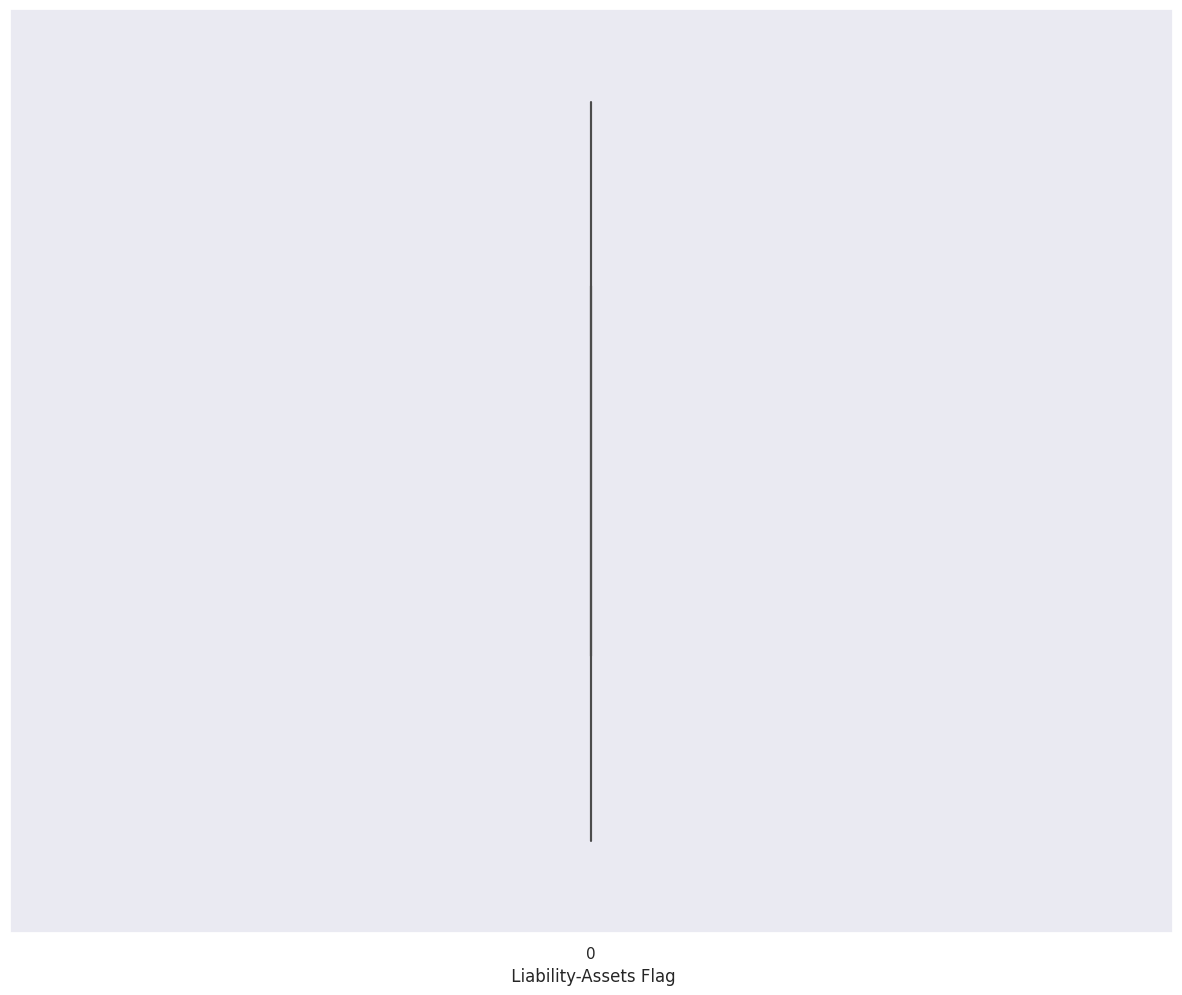

<Figure size 640x480 with 0 Axes>

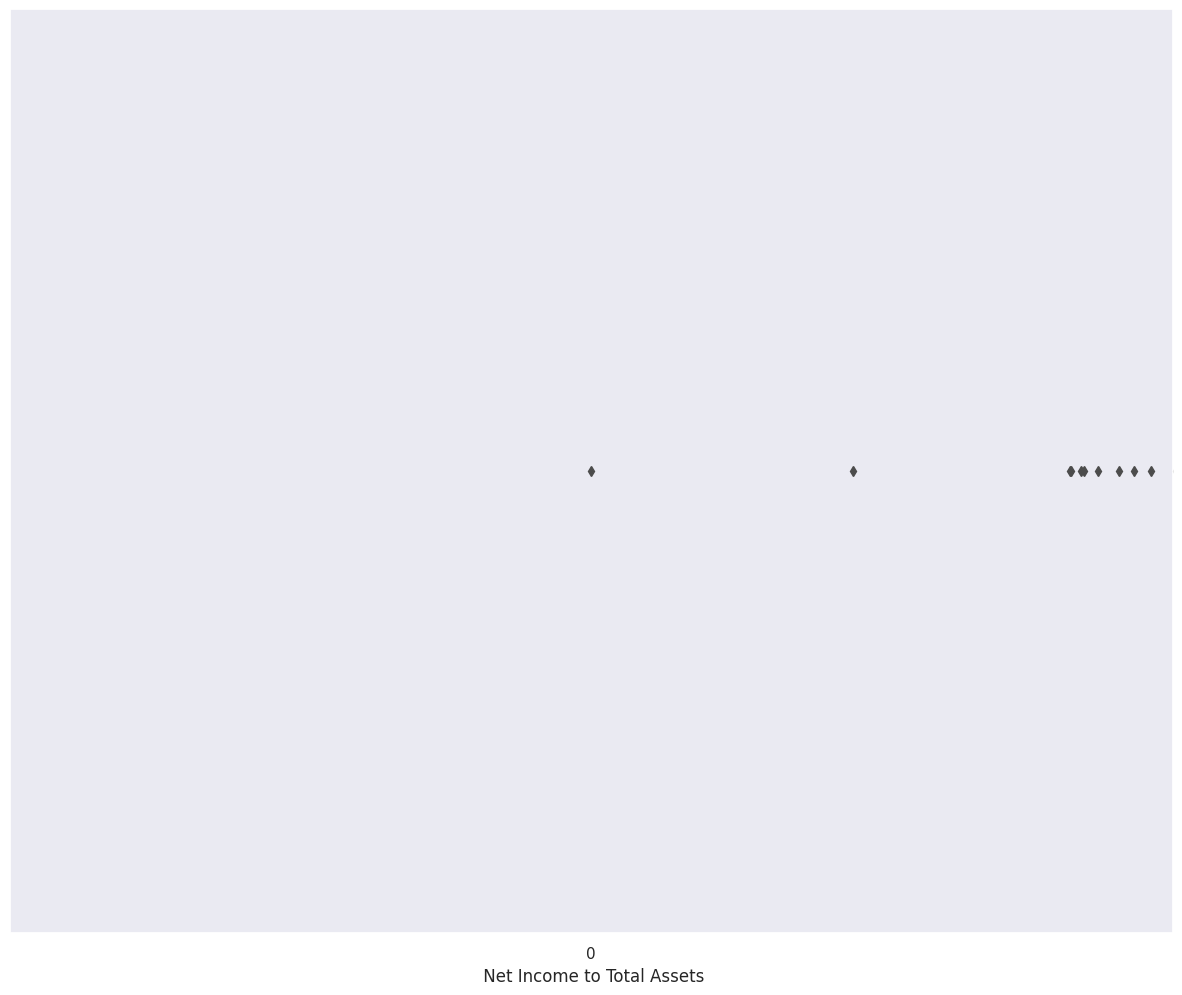

<Figure size 640x480 with 0 Axes>

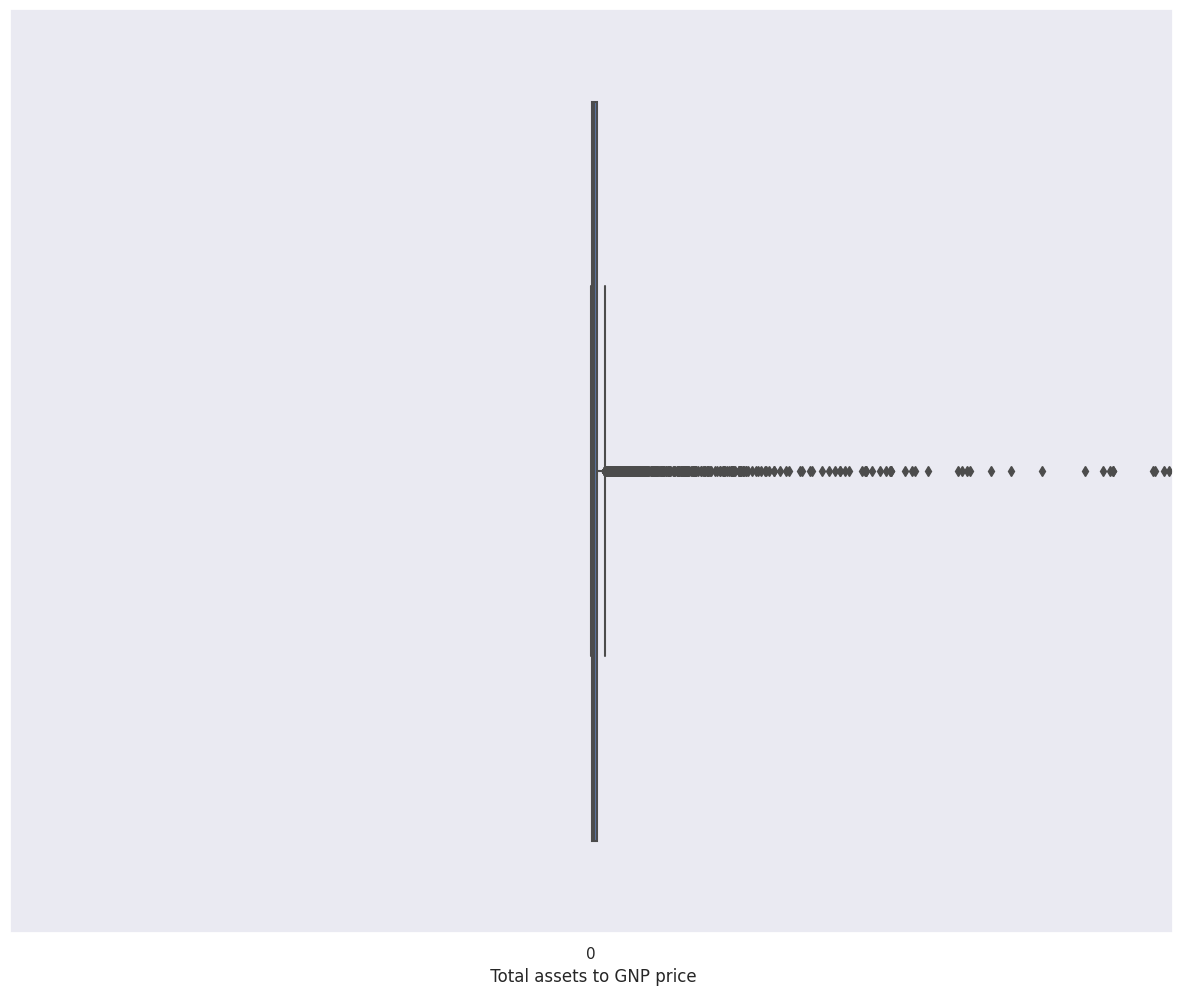

<Figure size 640x480 with 0 Axes>

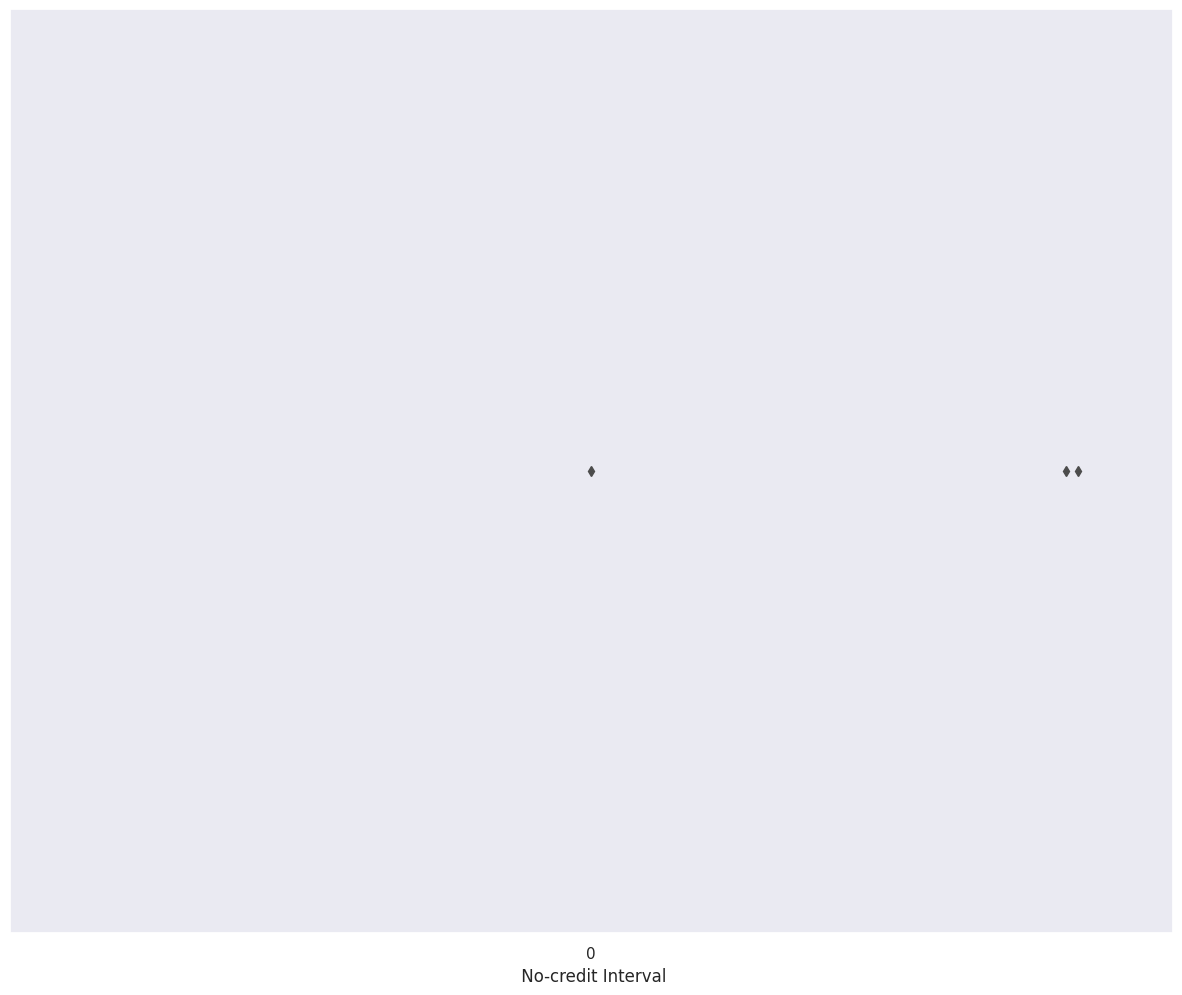

<Figure size 640x480 with 0 Axes>

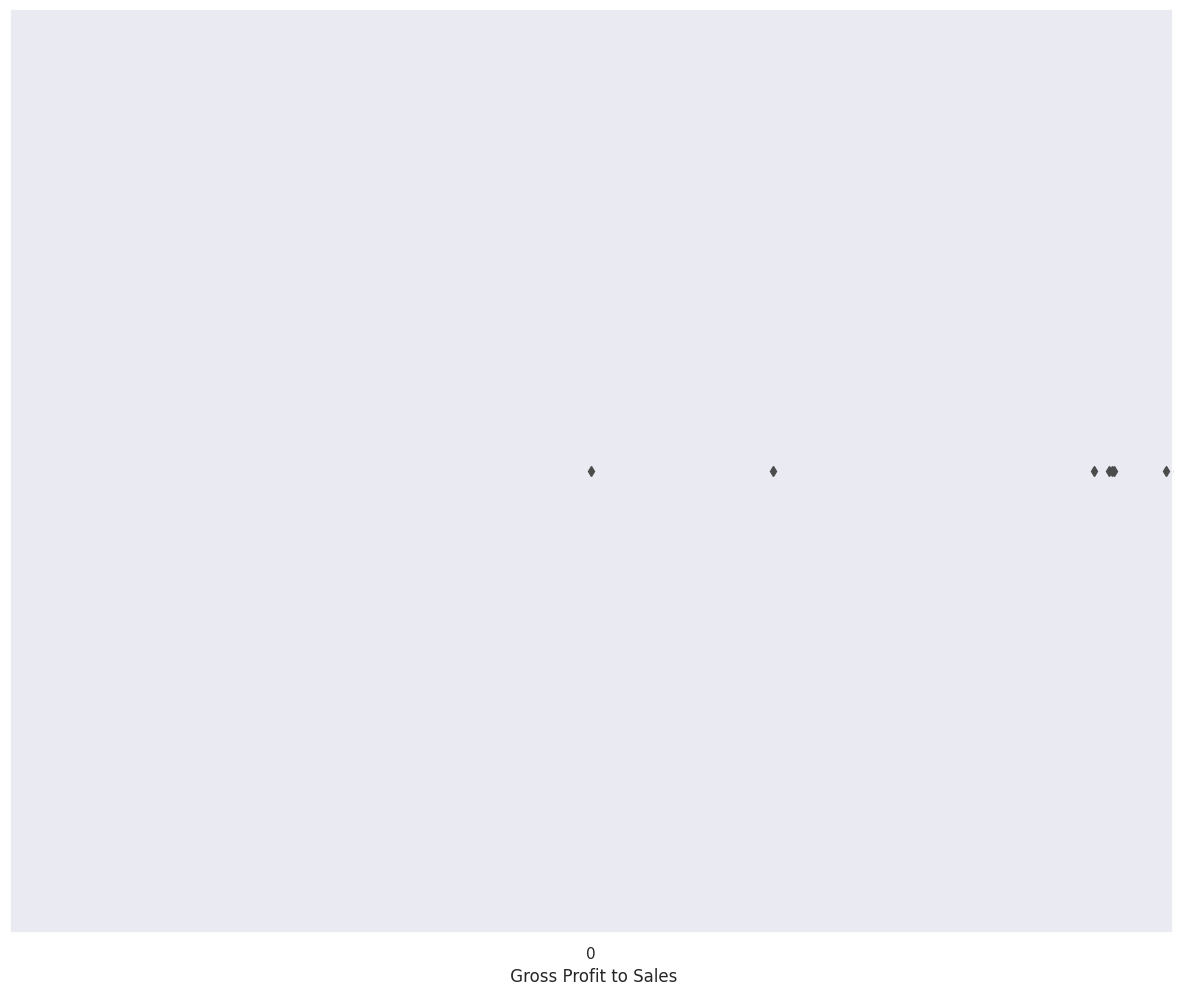

<Figure size 640x480 with 0 Axes>

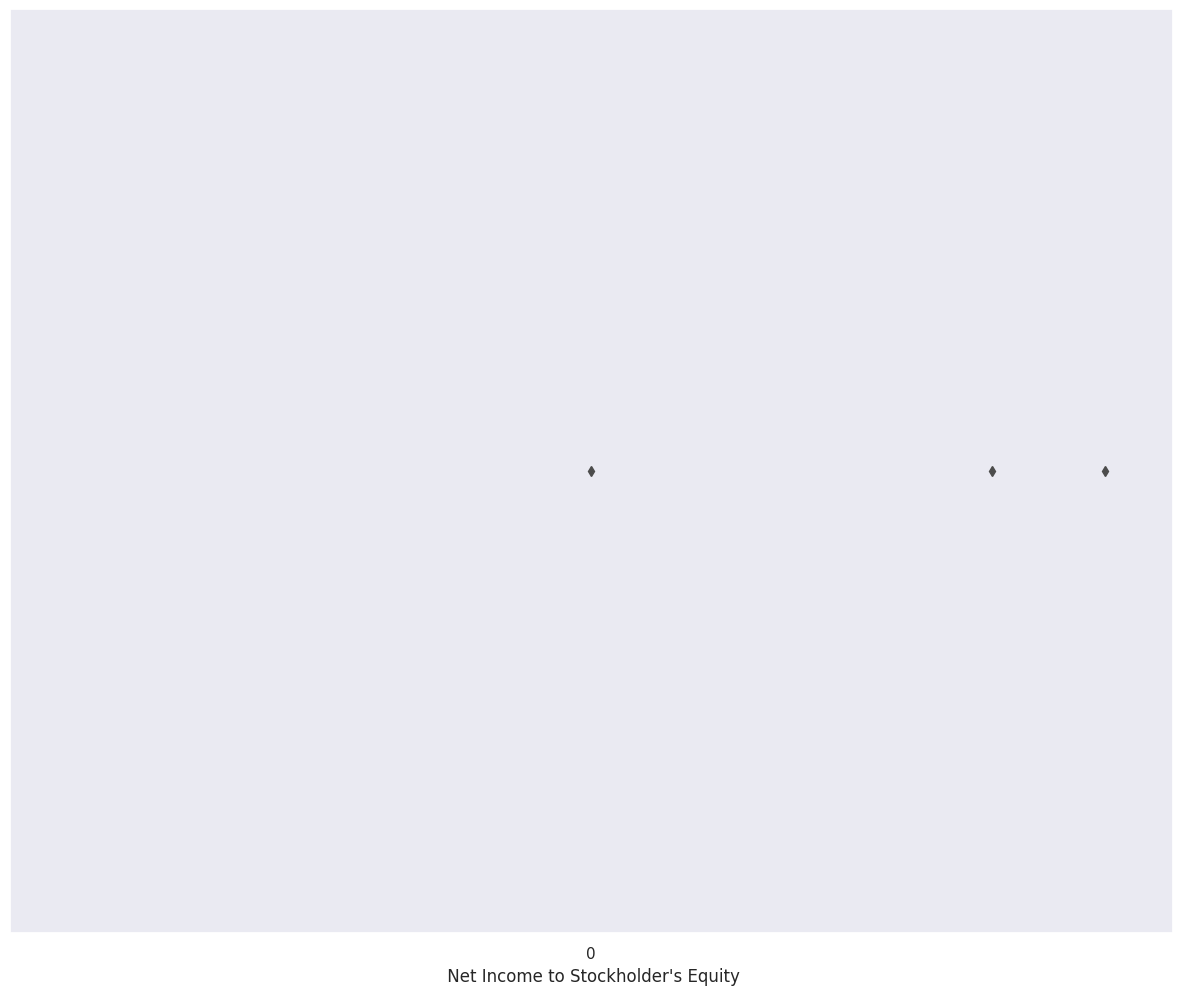

<Figure size 640x480 with 0 Axes>

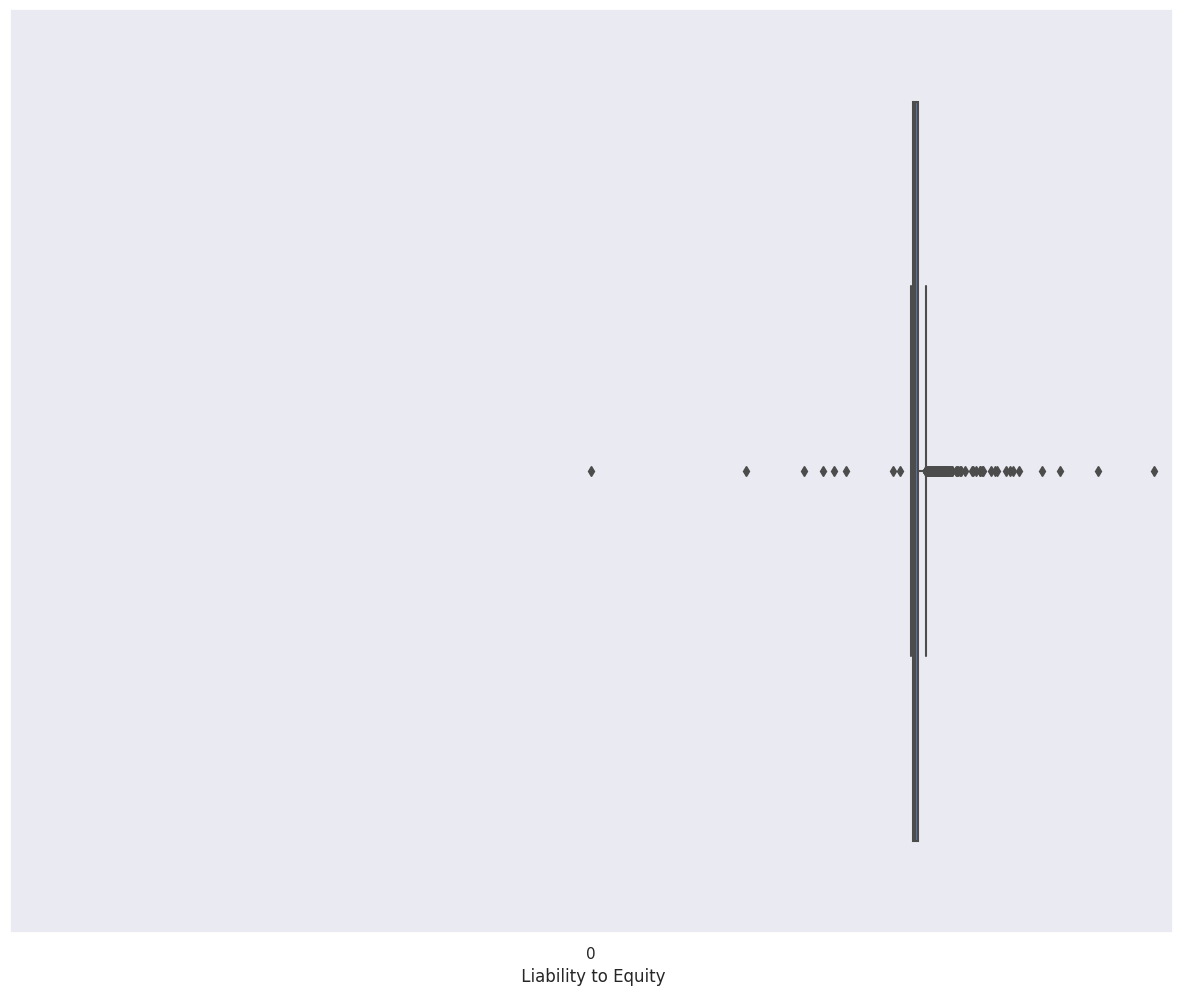

<Figure size 640x480 with 0 Axes>

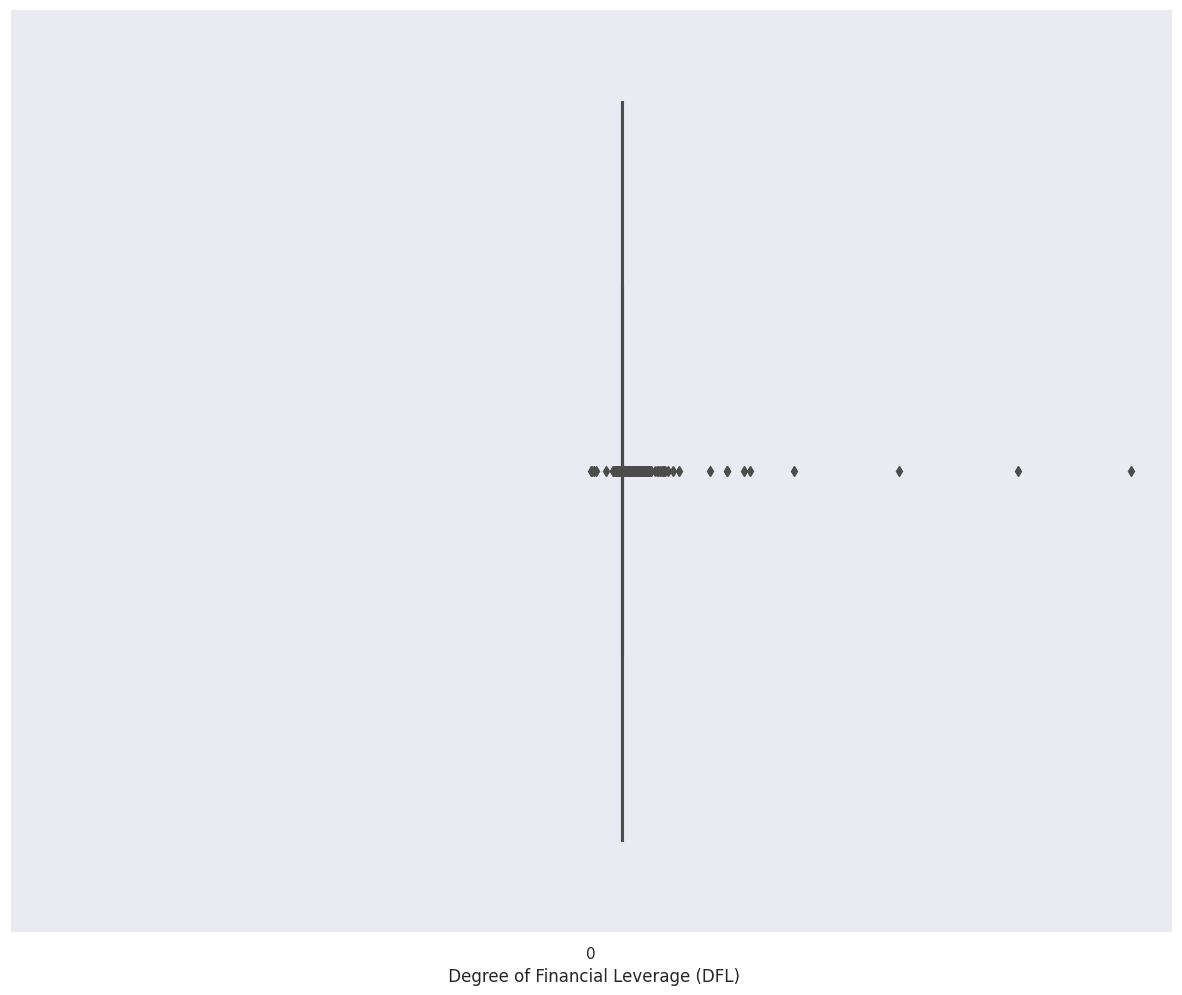

<Figure size 640x480 with 0 Axes>

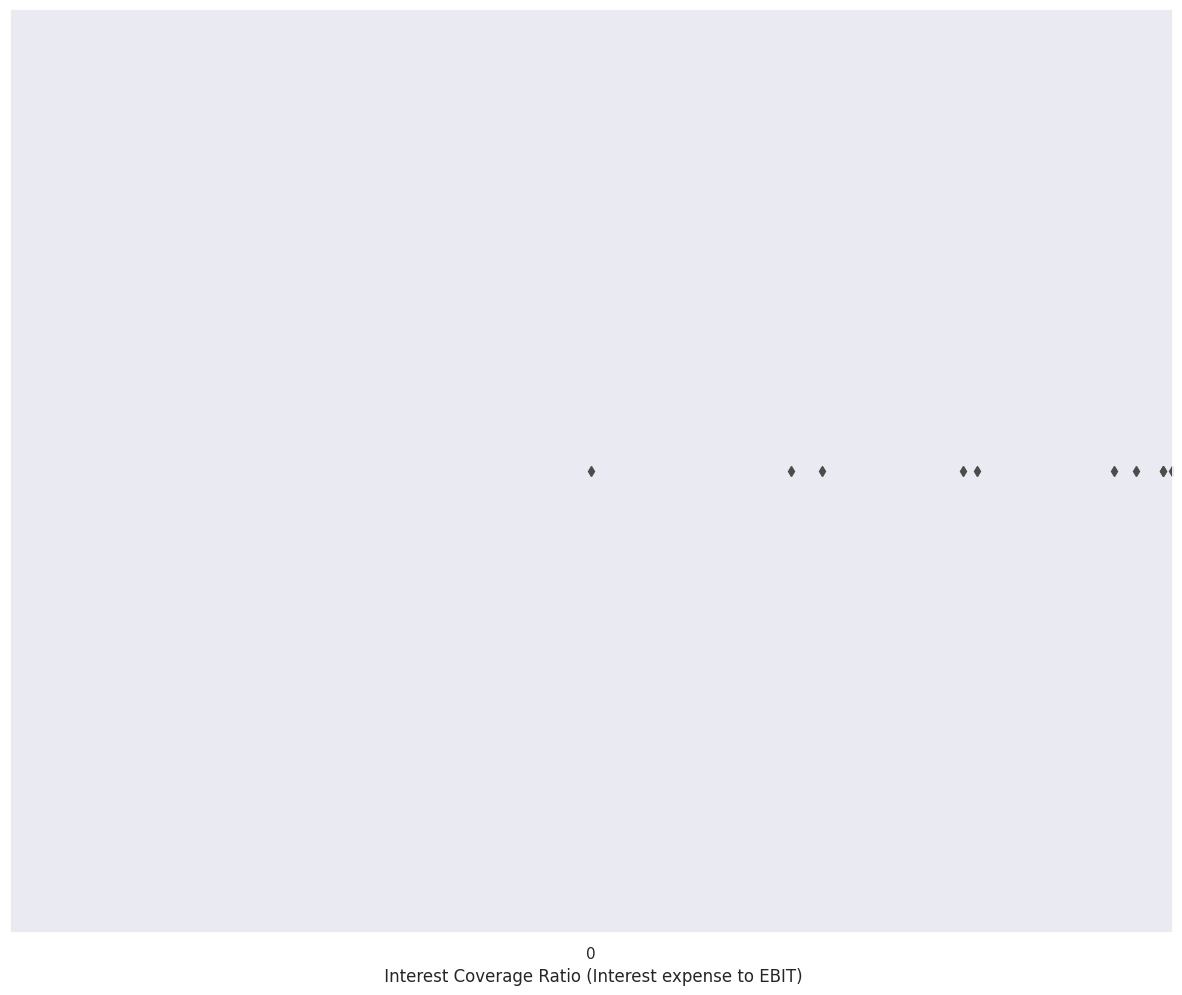

<Figure size 640x480 with 0 Axes>

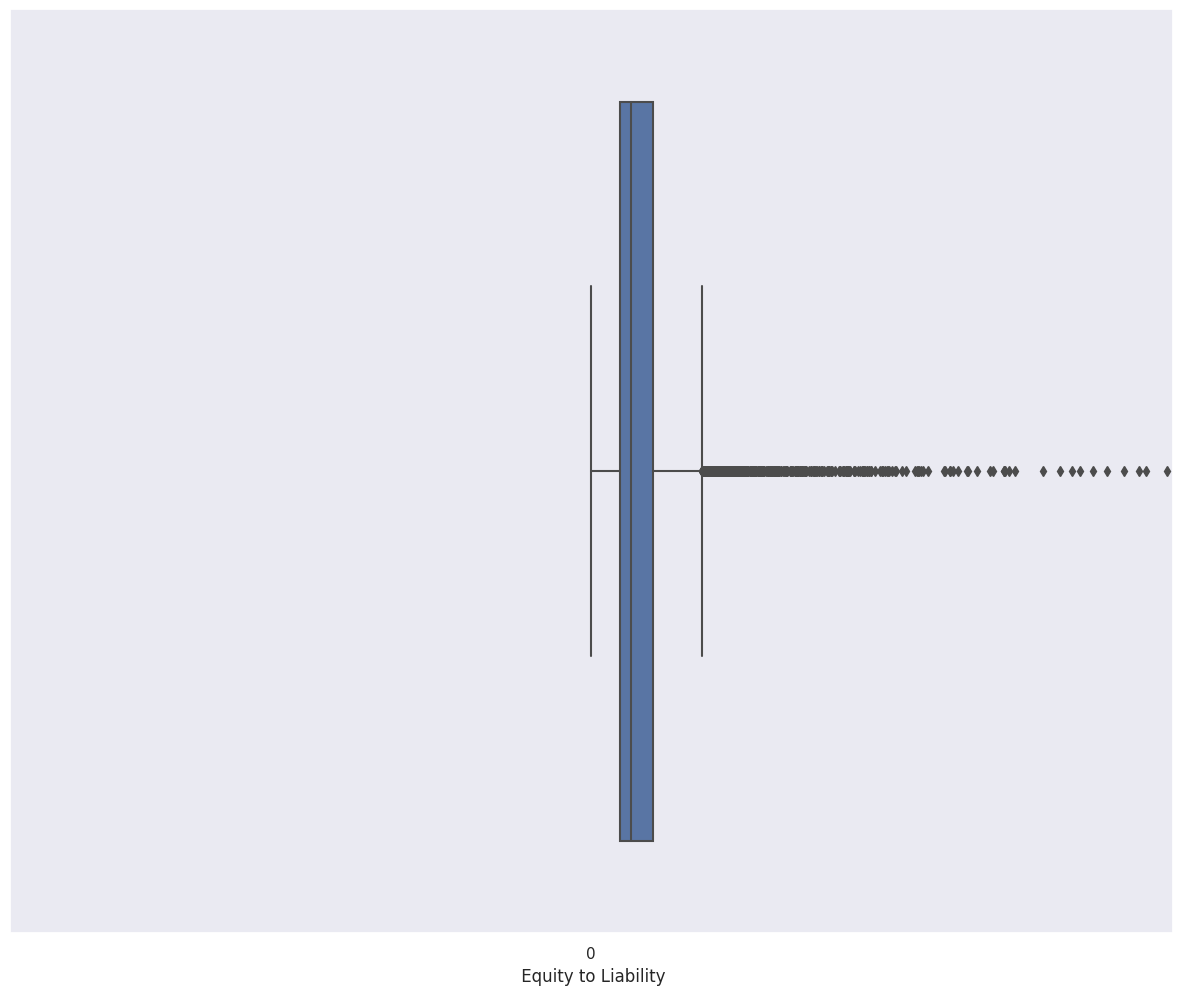

<Axes: >

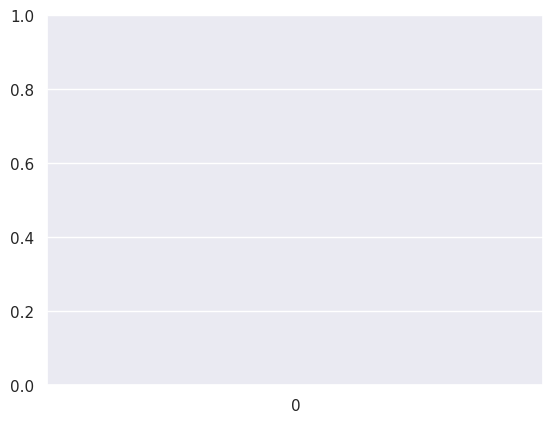

In [ ]:
def boxplots(col):
  plt.figure()
  plt.figure(figsize=(15,12))
  sns.boxplot(Bank_DF[col],x=Bank_DF[col],orient='horizontal')
  sns.boxplot()
  plt.show()

for i in list(Bank_DF.select_dtypes(exclude=['object']))[0:94]:
  boxplots(i)

sns.boxplot()



Observation:

From above distributions we can see that so much outliers are present in dataset, so according to machine learning knowledge we have to treat the outliers. But as we are predicting Bankcruptcy, so these outliers are important parameter for predicting whether any company is bankrupt or not, hence for this case, i am not doing any outlier treatment.

##3. Distribution of Target Variable

0    6599
1     220
Name: Bankrupt, dtype: int64



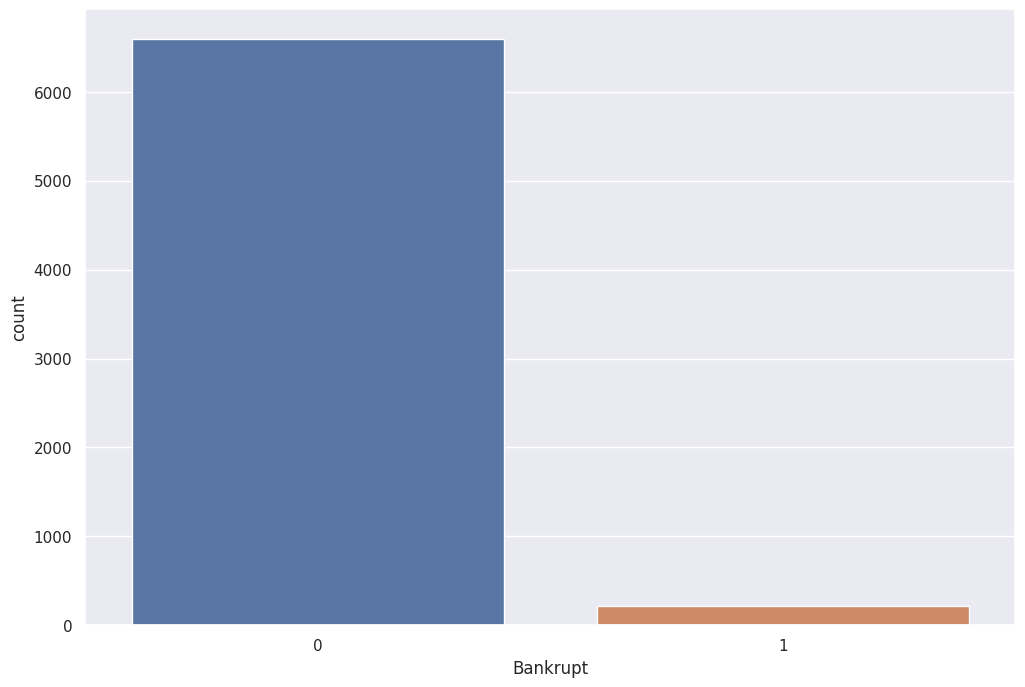

In [ ]:
print(Bank_DF['Bankrupt'].value_counts())
print()
plt.figure(figsize=(12,8))
sns.countplot(data=Bank_DF,x=Bank_DF['Bankrupt'])
plt.show()

In [ ]:
## % Distribution of Target Variabla
import plotly.graph_objects as go
print(Bank_DF['Bankrupt'].value_counts())
labels=Bank_DF['Bankrupt'].unique()
values=Bank_DF['Bankrupt'].value_counts().sort_values(ascending=True)

fig=go.Figure(data=[go.Pie(labels=labels,
                           values=values,
                           hole=0.5)])

fig.update_layout(title_text='Bankruptcy_Distribution')
fig.show()

0    6599
1     220
Name: Bankrupt, dtype: int64


Observation:

As we can see that almost 97% of target variable 0 value that means they are not bankrupted, only 3% companies are bankrupted. This is good sign of countries economy. So we can conclude here that data is highly imbalance & we have to balance data using oversampling techniques such as smote technique

In [ ]:
print(y.value_counts())

0    6599
1     220
Name: Bankrupt, dtype: int64


##4. Handle Imbalance Data using Smote Technique (Oversampling technique)

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x1,y)

print("Distribution of Target variable before Smote:")
print(y.value_counts())
print()
print('**'*10)
print("Distribution of Target variable after Smote:")
print(y_smote.value_counts())
print()


Distribution of Target variable before Smote:
0    6599
1     220
Name: Bankrupt, dtype: int64

********************
Distribution of Target variable after Smote:
1    6599
0    6599
Name: Bankrupt, dtype: int64



In [ ]:
## Shape of x and x_smote

print(x1.shape)
print(x_smote.shape)

(6819, 73)
(13198, 73)


In [ ]:
## Shape of y and y_smote

print(y.shape)
print(y_smote.shape)

(6819,)
(13198,)


##5. Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x_smote)

In [ ]:
x_scaler

array([[-1.19690143e+00, -1.15548147e-01,  2.35380558e-02, ...,
        -9.42622300e-02, -1.16169164e-01, -4.32770090e-01],
       [ 1.55779680e-02,  4.58611994e-01,  2.10568134e-02, ...,
         1.58678394e+01,  4.86139362e-01, -3.38147680e-01],
       [-4.79002590e-01, -1.16019556e-01,  1.15885636e-02, ...,
        -9.73416812e-02, -1.50001235e-01, -4.32652555e-01],
       ...,
       [-1.09469888e+00, -6.34826838e-01,  9.06059343e-03, ...,
        -8.52102666e-02, -3.46925202e-02, -4.59574836e-01],
       [-1.01463879e+00, -1.62568046e+00, -1.11423849e-01, ...,
        -9.09351583e-02, -8.53036650e-02, -4.96462154e-01],
       [-1.91662475e-01, -3.81281038e-01,  1.49332772e-02, ...,
        -1.28590532e-01,  3.33074346e+00, -4.39116166e-01]])

In [ ]:
x_scaler=pd.DataFrame(data=x_scaler,columns=x_smote.columns)
x_scaler.head()

,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,-1.196901,-0.115548,0.023538,-0.076344,-0.598449,-0.704577,-0.393449,-0.124153,-0.591289,-0.918928,...,-0.909509,-0.025142,2.022088,-0.024628,-0.072056,-0.094590,-0.114639,-0.094262,-0.116169,-0.432770
1,0.015578,0.458612,0.021057,0.034201,-0.598449,-0.704577,-0.136951,-0.124153,-0.591289,0.203056,...,-0.121179,0.037608,0.077694,-0.024628,-0.072056,-0.013239,0.157939,15.867839,0.486139,-0.338148
2,-0.479003,-0.116020,0.011589,-0.150599,-0.598449,-0.693960,-0.367453,-0.124153,-0.591289,0.061085,...,-0.603950,0.055178,-0.541112,-0.024628,-0.072056,0.006688,0.085841,-0.097342,-0.150001,-0.432653
3,-0.818396,-1.287438,-0.005249,0.009068,-0.598449,-0.704577,0.127403,-0.124153,-0.591289,-0.714931,...,0.503211,-0.549944,0.614986,-0.024628,-0.072056,-0.089353,0.038967,-0.087823,-0.055857,-0.268409
4,0.025041,-0.290436,0.023958,0.024306,1.871010,-0.704577,-0.076409,-0.124153,-0.591289,-0.279369,...,0.070634,-0.091862,0.076317,-0.024628,-0.072056,-0.027034,0.158017,-0.218268,1.021269,-0.016673


In [ ]:
x_scaler.describe()


,ROA(C) before interest and depreciation before interest,Operating Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),...,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
count,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,13198.000000,1.319800e+04,1.319800e+04,...,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04,1.319800e+04
mean,-8.269387e-16,-1.895068e-15,-3.280466e-15,3.376666e-15,2.799532e-17,2.584183e-17,2.325765e-15,0.000000,1.722789e-17,-1.378231e-16,...,2.928741e-16,7.494132e-16,-6.891155e-17,1.076743e-18,4.306972e-18,-1.466201e-14,-4.306972e-16,1.938137e-17,3.372898e-15,5.168367e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038,1.000038e+00,1.000038e+00,...,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-5.992567e+00,-3.945683e+01,-1.067013e+02,-3.684145e+01,-5.984487e-01,-7.045773e-01,-3.194801e+01,-0.124153,-5.912894e-01,-5.758347e+00,...,-9.690287e+00,-1.563076e+01,-1.240415e+00,-2.462763e-02,-7.205619e-02,-6.566522e+01,-1.879693e+01,-1.878483e+00,-5.558415e+01,-7.930264e-01
25%,-4.379429e-01,-3.957858e-01,1.144139e-02,-4.719728e-03,-5.984487e-01,-7.045773e-01,-2.811730e-01,-0.124153,-5.912894e-01,-6.108485e-01,...,-4.940743e-01,-9.537124e-02,-5.531314e-01,-2.462763e-02,-7.205619e-02,-5.891442e-02,5.285355e-02,-9.192462e-02,-7.353231e-02,-3.944849e-01
50%,8.623234e-02,-9.105375e-02,2.340227e-02,2.113366e-02,-5.984487e-01,-5.310918e-01,-1.037210e-01,-0.124153,-5.912894e-01,-1.001827e-01,...,3.568897e-03,3.383152e-02,-1.983224e-01,-2.462763e-02,-7.205619e-02,-6.627212e-03,1.500275e-01,-8.148282e-02,-6.540535e-03,-2.752632e-01
75%,5.448549e-01,3.784747e-01,3.068553e-02,3.176397e-02,5.095214e-01,4.071693e-01,1.599564e-01,-0.124153,4.441983e-01,3.575899e-01,...,5.015561e-01,1.418402e-01,2.657706e-01,-2.462763e-02,-7.205619e-02,2.989324e-02,1.910926e-01,-7.354007e-02,5.584392e-02,1.203897e-02
max,6.947907e+00,2.595311e+01,1.336632e-01,8.463728e+01,2.528281e+00,3.450940e+00,3.692688e+01,12.251074,7.408384e+00,2.695149e+01,...,7.183431e+00,3.424259e+01,2.634936e+01,4.060480e+01,2.256041e+01,3.960504e+01,3.769215e+00,6.519588e+01,4.275460e+01,2.108213e+01


##6. Feature Engineering : PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.98)
X_PCA = pca.fit_transform(x_scaler)
print(x_scaler.shape)
print(X_PCA.shape)

(13198, 73)
(13198, 58)


Observation:

By using principle component analysis, we have reduced the dimentionality of the data from 73 columns to 58 columns with the 98% information with us. This will help us to increase computation of the model & give better result

## Model Building

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_PCA,y_smote,test_size=0.25) ##Taking 75% data for training and 25% data for testing

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

              Method Used  Accuracy
0      LogisticRegression  0.904848
1            DecisionTree  0.940909
2            RandomForest  0.976364
3  Support Vector Machine  0.949394
4     K Nearest Neighbors  0.942727
5     Naive Bayes Theorem  0.530303
6                  Voting  0.962424
Axes(0.125,0.11;0.775x0.77)


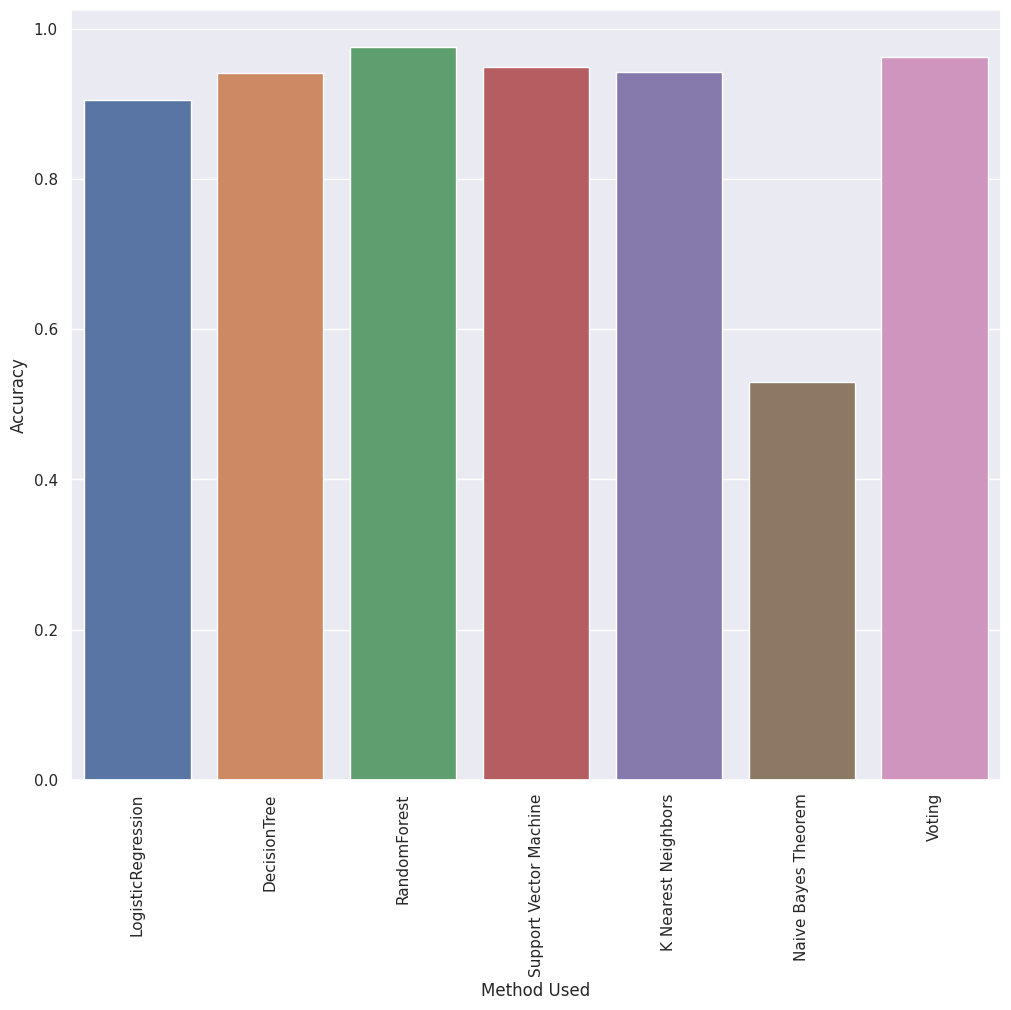

In [ ]:
# Logistic Regression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# SVC
svc = SVC()
svc = svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

# KNeighborsClassifier
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
nb = GaussianNB()
nb = nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Combining all the above model with voting classifier
model_evc = VotingClassifier(estimators=[('logit', logit),('dt',dt),('rf', rf),('svc', svc),('knn', knn),('nb', nb)], voting='hard')
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogisticRegression','DecisionTree','RandomForest','Support Vector Machine','K Nearest Neighbors','Naive Bayes Theorem','Voting']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_svc, accuracy_knn, accuracy_nb, accuracy_evc]

list3 = [logit, dt, rf, svc, knn, nb, model_evc]

df_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})

print(df_accuracy)

plt.figure(figsize=(12,10))
chart = sns.barplot(x = 'Method Used', y='Accuracy', data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
print(chart)




Observation:

As data was highly imbalanced so accuracy is not a good measurement, we can check for classification report


In [ ]:
classification_logit=classification_report(y_test,y_pred_lr)
print("**"*10,"Logistic Regression Classification Report","**"*10)
print(classification_logit)
print()

classification_dt=classification_report(y_test,y_pred_dt)
print("**"*10,"Decision Tree Classification Report","**"*10)
print(classification_dt)
print()

classification_rf=classification_report(y_test,y_pred_rf)
print("**"*10,"Random Forest Classification Report","**"*10)
print(classification_rf)
print()

classification_svc=classification_report(y_test,y_pred_svc)
print("**"*10,"Support Vector Machines Classification Report","**"*10)
print(classification_svc)
print()

classification_knn=classification_report(y_test,y_pred_knn)
print("**"*10,"K Nearest Neighbor Classification Report","**"*10)
print(classification_knn)
print()


classification_nb=classification_report(y_test,y_pred_nb)
print("**"*10,"Naive Bayes Classification Report","**"*10)
print(classification_nb)
print()

classification_evc=classification_report(y_test,pred_evc)
print("**"*10,"Voting Classifier Classification Report","**"*10)
print(classification_evc)
print()





******************** Logistic Regression Classification Report ********************
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1659
           1       0.89      0.93      0.91      1641

    accuracy                           0.90      3300
   macro avg       0.91      0.90      0.90      3300
weighted avg       0.91      0.90      0.90      3300


******************** Decision Tree Classification Report ********************
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1659
           1       0.93      0.96      0.94      1641

    accuracy                           0.94      3300
   macro avg       0.94      0.94      0.94      3300
weighted avg       0.94      0.94      0.94      3300


******************** Random Forest Classification Report ********************
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      

Observations from Accuracy Score & Classification Report:
1. Logistic Regression is giving comparative less accuracy because the assumption of logistic regression is independent variables contain little or no multicollinearity. But in this dataset, so many columns are highly corelated to each other. 
2. Decision Tree,Support Vector Machines and K-Nearest Neighbour are giving better accuracy, precision and recall values.
3. Random Forest is giving best accuracy, precision and recall values among all algorithms as this algorithm uses concept of Bootstrap Aggregation for final output & it combines weak learners with strong learners to give best results
4. Naive Bayes is giving really poor result because the dataset is highly imbalanced & The dataset contains all numerical features due to this it will become bias. This algorithm giving poor results for numerical data
5. Voting Classifier is taking average of all algorithms for prediction

Direction:

From above observations we are getting best results using Random Forest, so we can use this algorithm for predicting whether any company is going to become Bankrupt or not.

## Random Forest Model Evaluation

In [ ]:
y_pred_rf_prob=rf.predict_proba(x_test)[:,1]

In [ ]:
y_pred_rf_prob


array([0.95, 0.09, 0.97, ..., 0.15, 0.  , 1.  ])

In [ ]:
from sklearn.metrics import recall_score, roc_curve, auc 
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)
roc_auc_rf = auc(fpr_rf, tpr_rf)

### 1. Area Under Curve

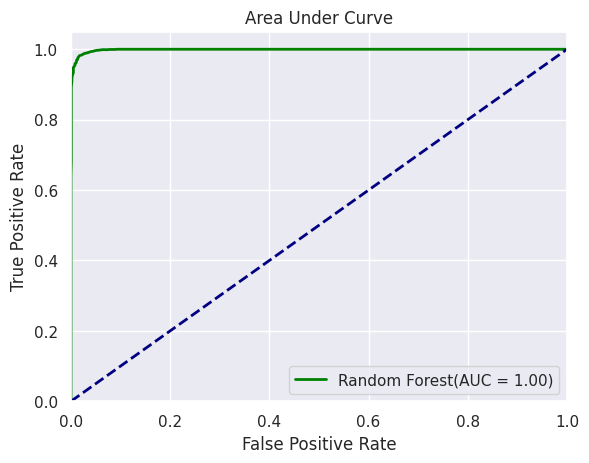

In [ ]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='green',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

As we can see that we are getting AUC of 1.0, that means our model is having 
high TPR which is sign of good model. This means our model is good at predicting Bankrupt companies as Bankrupt

### 2.Confusion Matrix

In [ ]:
CNF=confusion_matrix(y_test, y_pred_rf)
CNF

array([[1593,   66],
       [  11, 1630]])

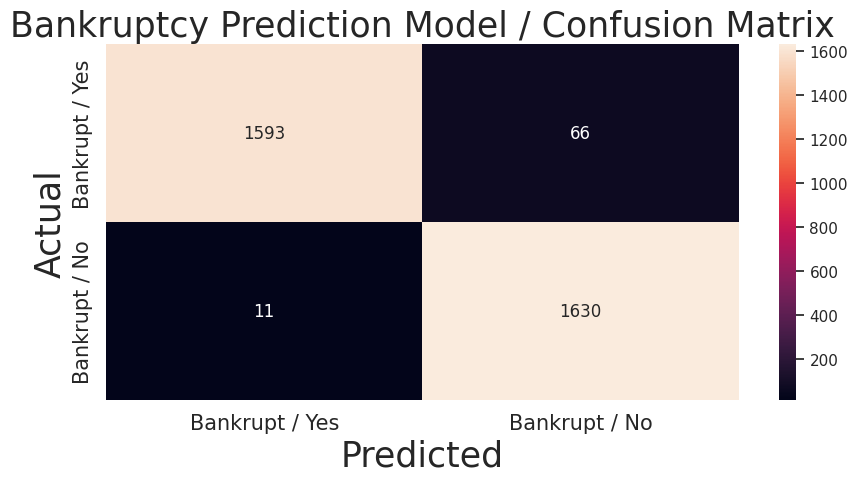

In [ ]:
plt.figure(figsize = (9,5))
colormap = sns.color_palette('Blues', 12)
sns.heatmap(CNF, annot = True, fmt = 'g')
posx, text_valx = plt.xticks()
posy, text_valy = plt.yticks()




plt.xticks(posx, ['Bankrupt / Yes', 'Bankrupt / No'], fontsize = 15)
plt.yticks(posy, ['Bankrupt / Yes', 'Bankrupt / No'], fontsize = 15, va ='center')
plt.xlabel('Predicted', fontsize = 25)
plt.ylabel('Actual', fontsize = 25)
plt.title('Bankruptcy Prediction Model / Confusion Matrix', fontsize = 25)

plt.tight_layout()
plt.show()

Observation:

In above Confusion Matrix, we are getting 77 misclassifications out of 3311 i.e less misclassifications. This model is performing well classifying two classes.
This is one of the perfect model for Bankruptcy prediction

Conclusion:
1. By Using Random Forest Algorithm, we are getting 98% Accurate prediction about Bankruptcy prediction
2. ROC-AUC curve gives the information as our model is best in predicting Bankruptcy
3. Confusion Matrix tells us that out of 3311 test results, our model is able to predict 3223 correct predictions and 77 wrong predictions
4. We have to give special attention to those 77 companies which are incoorectly classified 
